In [2]:
%load_ext autoreload
%autoreload 2
import datajoint as dj
from spyglass.lfp.lfp_merge import LFPOutput
dj.FreeTable(LFPOutput.connection,'`lfp_merge`.`l_f_p_output__imported_l_f_p_v1`').drop_quick()
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
os.chdir('/home/sambray/Documents/MS_analysis_samsplaying/')
from Analysis.lfp_analysis import lfp_power_dynamics_pulse_cwt, lfp_power_dynamics_pulse_cwt_spectrogram

[2024-06-11 07:51:11,028][INFO]: Connecting sambray@lmf-db.cin.ucsf.edu:3306
[2024-06-11 07:51:11,083][INFO]: Connected sambray@lmf-db.cin.ucsf.edu:3306
[2024-06-11 07:51:12,730][INFO]: Nothing to drop: table `lfp_merge`.`l_f_p_output__imported_l_f_p_v1` is not declared


## Open Loop

### Spectrogram

In [3]:
from ms_opto_stim_protocol import OptoStimProtocol

OptoStimProtocol & {'nwb_file_name': 'Frodo20230810_.nwb', 'interval_list_name': 'pos 9 valid times'}

*nwb_file_name *interval_list *dio_event_nam *opto_infer_pa optogenetic_pr pulse_length_m inter_pulse_in inter_train_in period_ms     pulses_per_tra number_trains  stim_on     test_inter control_in
+------------+ +------------+ +------------+ +------------+ +------------+ +------------+ +------------+ +------------+ +-----------+ +------------+ +------------+ +---------+ +--------+ +--------+
Frodo20230810_ pos 9 valid ti stim           default_pulse_ pulse_train    3              5              57             100           6              26.6593        1           =BLOB=     =BLOB=    
 (Total: 1)

datasets: 1
{'nwb_file_name': 'Frodo20230810_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[2024-04-19 15:33:29,000][WARNING]: Skipped checksum for file with hash: 1f5c50a7-0065-fa56-18eb-45182d0fa2f5, and path: /stelmo/nwb/raw/Frodo20230810_.nwb
100%|██████████| 49/49 [00:01<00:00, 33.63it/s]


datasets: 1
{'nwb_file_name': 'Frodo20230810_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[2024-04-19 15:33:33,087][WARNING]: Skipped checksum for file with hash: 1f5c50a7-0065-fa56-18eb-45182d0fa2f5, and path: /stelmo/nwb/raw/Frodo20230810_.nwb
100%|██████████| 52/52 [00:01<00:00, 33.89it/s]


datasets: 1
{'nwb_file_name': 'Frodo20230810_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[2024-04-19 15:33:36,577][WARNING]: Skipped checksum for file with hash: 1f5c50a7-0065-fa56-18eb-45182d0fa2f5, and path: /stelmo/nwb/raw/Frodo20230810_.nwb
100%|██████████| 49/49 [00:01<00:00, 34.37it/s]


datasets: 1
{'nwb_file_name': 'Frodo20230810_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[2024-04-19 15:33:40,236][WARNING]: Skipped checksum for file with hash: 1f5c50a7-0065-fa56-18eb-45182d0fa2f5, and path: /stelmo/nwb/raw/Frodo20230810_.nwb
100%|██████████| 46/46 [00:01<00:00, 33.66it/s]


datasets: 0
datasets: 0


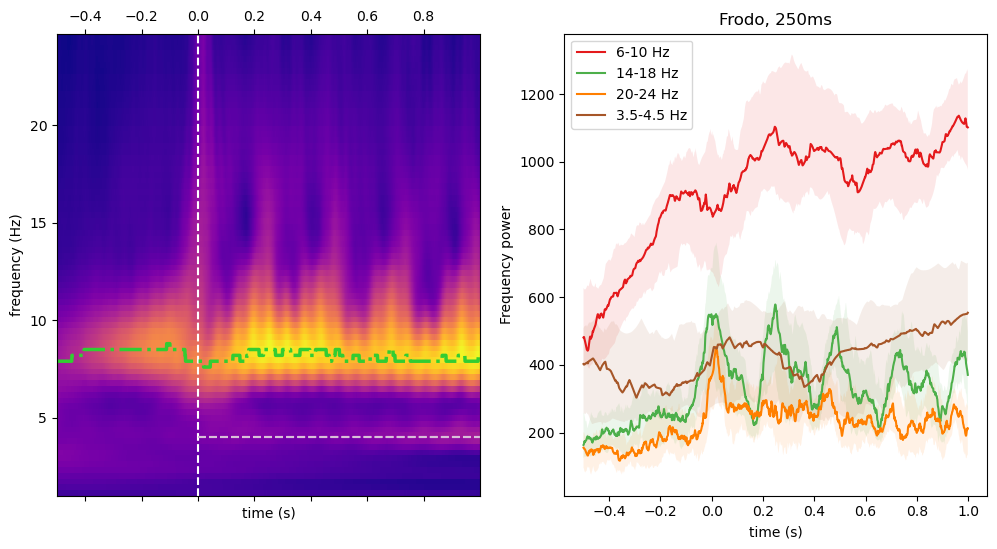

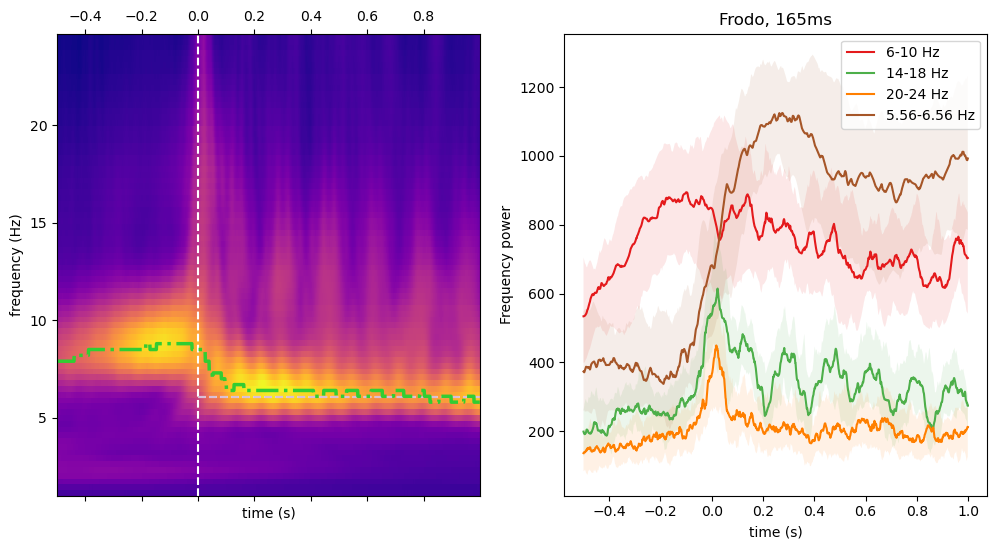

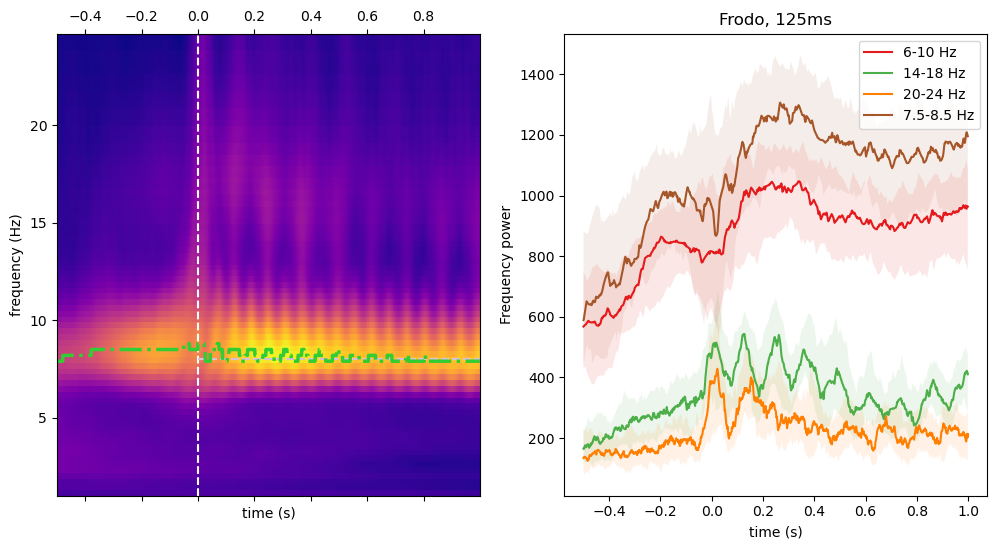

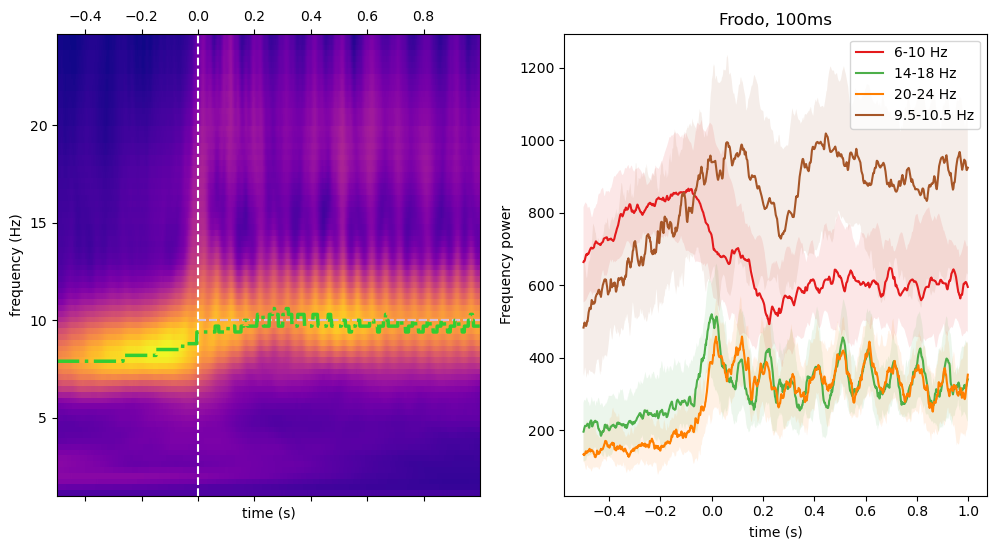

In [4]:
frequencies =  np.arange(1,25,.3)
periods = [250, 165, 125, 100, 80, 50]
handles = []
for animal in ["Frodo"]:#['Frodo',"Yoshi"]:
    
    handles=[]
    for i,period in enumerate(periods):#,]):#
        fig=None
        dataset_key = {"animal":animal,
                    "period_ms":period,
                    # "min_pulse_length":23,
                    "max_pulse_length":10,
                    "laser_power": 77,}
        fig = lfp_power_dynamics_pulse_cwt_spectrogram(dataset_key,
                            lfp_trace_window=(-int(0.5 * 1000), int(1* 1000)),
                            color=plt.cm.magma(i/6),
                            fig = fig,
                            frequencies=frequencies,
                            )
        
        handles.append(mpatches.Patch(color=plt.cm.magma(i/6), label=period))
        if fig is None:
            continue
        fig.gca().set_title(f"{animal}, {period}ms")
        # break
    break
    if fig is None:
        continue
    fig.gca().set_title(f"{animal}")
    # fig.get_axes()[0].legend(handles=handles,frameon=False)
    plt.rcParams['svg.fonttype'] = 'none'
    # fig.savefig(f'/home/sambray/Pictures/group_meet_112023/lfp_power/open_loop_cwt_{animal}.svg')
    

datasets: 2
{'nwb_file_name': 'Frodo20230808_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[2023-11-13 12:56:30,700][WARNING]: Skipped checksum for file with hash: f8c614b7-dcac-da36-5ab4-865c56ae0765, and path: /stelmo/nwb/raw/Frodo20230808_.nwb
100%|██████████| 79/79 [00:01<00:00, 40.70it/s]


{'nwb_file_name': 'Frodo20230809_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


[2023-11-13 12:56:32,861][WARNING]: Skipped checksum for file with hash: c7292c94-02fe-115c-6b40-39427ac1a36a, and path: /stelmo/nwb/raw/Frodo20230809_.nwb
100%|██████████| 43/43 [00:01<00:00, 41.59it/s]


datasets: 2
{'nwb_file_name': 'Frodo20230808_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[2023-11-13 12:56:34,371][WARNING]: Skipped checksum for file with hash: f8c614b7-dcac-da36-5ab4-865c56ae0765, and path: /stelmo/nwb/raw/Frodo20230808_.nwb
100%|██████████| 70/70 [00:01<00:00, 40.11it/s]


{'nwb_file_name': 'Frodo20230809_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[2023-11-13 12:56:36,391][WARNING]: Skipped checksum for file with hash: c7292c94-02fe-115c-6b40-39427ac1a36a, and path: /stelmo/nwb/raw/Frodo20230809_.nwb
100%|██████████| 48/48 [00:01<00:00, 41.23it/s]


datasets: 2
{'nwb_file_name': 'Frodo20230808_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[2023-11-13 12:56:38,067][WARNING]: Skipped checksum for file with hash: f8c614b7-dcac-da36-5ab4-865c56ae0765, and path: /stelmo/nwb/raw/Frodo20230808_.nwb
100%|██████████| 51/51 [00:01<00:00, 41.94it/s]


{'nwb_file_name': 'Frodo20230809_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[2023-11-13 12:56:39,540][WARNING]: Skipped checksum for file with hash: c7292c94-02fe-115c-6b40-39427ac1a36a, and path: /stelmo/nwb/raw/Frodo20230809_.nwb
100%|██████████| 64/64 [00:01<00:00, 41.37it/s]


datasets: 2
{'nwb_file_name': 'Frodo20230808_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[2023-11-13 12:56:41,617][WARNING]: Skipped checksum for file with hash: f8c614b7-dcac-da36-5ab4-865c56ae0765, and path: /stelmo/nwb/raw/Frodo20230808_.nwb
100%|██████████| 49/49 [00:01<00:00, 41.51it/s]


{'nwb_file_name': 'Frodo20230809_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[2023-11-13 12:56:43,080][WARNING]: Skipped checksum for file with hash: c7292c94-02fe-115c-6b40-39427ac1a36a, and path: /stelmo/nwb/raw/Frodo20230809_.nwb
100%|██████████| 61/61 [00:01<00:00, 41.62it/s]


datasets: 2
{'nwb_file_name': 'Frodo20230808_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


[2023-11-13 12:56:44,994][WARNING]: Skipped checksum for file with hash: f8c614b7-dcac-da36-5ab4-865c56ae0765, and path: /stelmo/nwb/raw/Frodo20230808_.nwb
100%|██████████| 23/23 [00:00<00:00, 43.18it/s]


{'nwb_file_name': 'Frodo20230809_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[2023-11-13 12:56:45,771][WARNING]: Skipped checksum for file with hash: c7292c94-02fe-115c-6b40-39427ac1a36a, and path: /stelmo/nwb/raw/Frodo20230809_.nwb
100%|██████████| 77/77 [00:01<00:00, 41.52it/s]


datasets: 0
datasets: 4
{'nwb_file_name': 'Totoro20220530_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[2023-11-13 12:56:50,397][WARNING]: Skipped checksum for file with hash: db2b02fd-88c0-2063-9faf-78634362fe53, and path: /stelmo/nwb/raw/Totoro20220530_.nwb
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.1 because version 1.6.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.2.0 because version 0.3.0 is already loaded.
  warn("Ignoring cached namespace

{'nwb_file_name': 'Totoro20220531_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[2023-11-13 12:56:55,850][WARNING]: Skipped checksum for file with hash: 26d842eb-b5f3-0360-4fb5-416bcf7f4e29, and path: /stelmo/nwb/raw/Totoro20220531_.nwb
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.1 because version 1.6.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.2.0 because version 0.3.0 is already loaded.
  warn("Ignoring cached namespace

{'nwb_file_name': 'Totoro20220602_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[2023-11-13 12:57:00,210][WARNING]: Skipped checksum for file with hash: f5118d6f-feeb-70ef-73da-912dd48edd6e, and path: /stelmo/nwb/raw/Totoro20220602_.nwb
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.1 because version 1.6.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.2.0 because version 0.3.0 is already loaded.
  warn("Ignoring cached namespace

{'nwb_file_name': 'Totoro20220603_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[2023-11-13 12:57:05,856][WARNING]: Skipped checksum for file with hash: 43b9576d-481d-6c4d-0cbd-9badac7128f2, and path: /stelmo/nwb/raw/Totoro20220603_.nwb
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.1 because version 1.6.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.2.0 because version 0.3.0 is already loaded.
  warn("Ignoring cached namespace

datasets: 4
{'nwb_file_name': 'Totoro20220530_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[2023-11-13 12:57:12,009][WARNING]: Skipped checksum for file with hash: db2b02fd-88c0-2063-9faf-78634362fe53, and path: /stelmo/nwb/raw/Totoro20220530_.nwb
100%|██████████| 6/6 [00:00<00:00, 31.74it/s]


{'nwb_file_name': 'Totoro20220531_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[2023-11-13 12:57:13,932][WARNING]: Skipped checksum for file with hash: 26d842eb-b5f3-0360-4fb5-416bcf7f4e29, and path: /stelmo/nwb/raw/Totoro20220531_.nwb
100%|██████████| 1/1 [00:00<00:00, 35.34it/s]


{'nwb_file_name': 'Totoro20220602_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[2023-11-13 12:57:16,215][WARNING]: Skipped checksum for file with hash: f5118d6f-feeb-70ef-73da-912dd48edd6e, and path: /stelmo/nwb/raw/Totoro20220602_.nwb
100%|██████████| 55/55 [00:01<00:00, 39.46it/s]


{'nwb_file_name': 'Totoro20220603_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[2023-11-13 12:57:20,058][WARNING]: Skipped checksum for file with hash: 43b9576d-481d-6c4d-0cbd-9badac7128f2, and path: /stelmo/nwb/raw/Totoro20220603_.nwb
100%|██████████| 55/55 [00:01<00:00, 38.47it/s]


datasets: 2
{'nwb_file_name': 'Totoro20220602_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[2023-11-13 12:57:24,101][WARNING]: Skipped checksum for file with hash: f5118d6f-feeb-70ef-73da-912dd48edd6e, and path: /stelmo/nwb/raw/Totoro20220602_.nwb
100%|██████████| 66/66 [00:01<00:00, 40.09it/s]


{'nwb_file_name': 'Totoro20220603_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[2023-11-13 12:57:27,795][WARNING]: Skipped checksum for file with hash: 43b9576d-481d-6c4d-0cbd-9badac7128f2, and path: /stelmo/nwb/raw/Totoro20220603_.nwb
100%|██████████| 67/67 [00:01<00:00, 38.61it/s]


datasets: 2
{'nwb_file_name': 'Totoro20220602_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[2023-11-13 12:57:31,990][WARNING]: Skipped checksum for file with hash: f5118d6f-feeb-70ef-73da-912dd48edd6e, and path: /stelmo/nwb/raw/Totoro20220602_.nwb
100%|██████████| 49/49 [00:01<00:00, 37.88it/s]


{'nwb_file_name': 'Totoro20220603_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[2023-11-13 12:57:35,740][WARNING]: Skipped checksum for file with hash: 43b9576d-481d-6c4d-0cbd-9badac7128f2, and path: /stelmo/nwb/raw/Totoro20220603_.nwb
100%|██████████| 81/81 [00:02<00:00, 39.69it/s]


datasets: 2
{'nwb_file_name': 'Totoro20220602_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


[2023-11-13 12:57:40,435][WARNING]: Skipped checksum for file with hash: f5118d6f-feeb-70ef-73da-912dd48edd6e, and path: /stelmo/nwb/raw/Totoro20220602_.nwb
100%|██████████| 52/52 [00:01<00:00, 39.54it/s]


{'nwb_file_name': 'Totoro20220603_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


[2023-11-13 12:57:43,697][WARNING]: Skipped checksum for file with hash: 43b9576d-481d-6c4d-0cbd-9badac7128f2, and path: /stelmo/nwb/raw/Totoro20220603_.nwb
100%|██████████| 84/84 [00:02<00:00, 39.45it/s]


datasets: 2
{'nwb_file_name': 'Totoro20220602_.nwb', 'target_interval_list_name': 'pos 13 valid times'}


[2023-11-13 12:57:48,005][WARNING]: Skipped checksum for file with hash: f5118d6f-feeb-70ef-73da-912dd48edd6e, and path: /stelmo/nwb/raw/Totoro20220602_.nwb
100%|██████████| 56/56 [00:01<00:00, 41.42it/s]


{'nwb_file_name': 'Totoro20220603_.nwb', 'target_interval_list_name': 'pos 13 valid times'}


[2023-11-13 12:57:51,470][WARNING]: Skipped checksum for file with hash: 43b9576d-481d-6c4d-0cbd-9badac7128f2, and path: /stelmo/nwb/raw/Totoro20220603_.nwb
100%|██████████| 85/85 [00:02<00:00, 39.99it/s]


datasets: 0
datasets: 0
datasets: 5
{'nwb_file_name': 'Banner20220124_.nwb', 'target_interval_list_name': 'pos 0 valid times'}


[2023-11-13 12:57:56,060][WARNING]: Skipped checksum for file with hash: d2badb1f-a1bd-3657-182e-9672271bc491, and path: /stelmo/nwb/raw/Banner20220124_.nwb
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.1 because version 1.6.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.5.0 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.2.0 because version 0.3.0 is already loaded.
  warn("Ignoring cached namespace

{'nwb_file_name': 'Banner20220124_.nwb', 'target_interval_list_name': 'pos 2 valid times'}


[2023-11-13 12:58:00,748][WARNING]: Skipped checksum for file with hash: d2badb1f-a1bd-3657-182e-9672271bc491, and path: /stelmo/nwb/raw/Banner20220124_.nwb
100%|██████████| 85/85 [00:02<00:00, 38.94it/s]


{'nwb_file_name': 'Banner20220126_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[2023-11-13 12:58:04,910][WARNING]: Skipped checksum for file with hash: 1eec97eb-ccce-ffa2-65bb-ca230324e26b, and path: /stelmo/nwb/raw/Banner20220126_.nwb
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.1 because version 1.6.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.5.0 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.2.0 because version 0.3.0 is already loaded.
  warn("Ignoring cached namespace

{'nwb_file_name': 'Banner20220126_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[2023-11-13 12:58:09,917][WARNING]: Skipped checksum for file with hash: 1eec97eb-ccce-ffa2-65bb-ca230324e26b, and path: /stelmo/nwb/raw/Banner20220126_.nwb
100%|██████████| 51/51 [00:01<00:00, 40.19it/s]


{'nwb_file_name': 'Banner20220126_.nwb', 'target_interval_list_name': 'pos 6 valid times'}


[2023-11-13 12:58:12,835][WARNING]: Skipped checksum for file with hash: 1eec97eb-ccce-ffa2-65bb-ca230324e26b, and path: /stelmo/nwb/raw/Banner20220126_.nwb
100%|██████████| 46/46 [00:01<00:00, 40.52it/s]


datasets: 1
{'nwb_file_name': 'Banner20220123_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[2023-11-13 12:58:16,950][WARNING]: Skipped checksum for file with hash: 104d806e-f841-6bb4-bce0-fc77f0a5e957, and path: /stelmo/nwb/raw/Banner20220123_.nwb
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.1 because version 1.6.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.5.0 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.2.0 because version 0.3.0 is already loaded.
  warn("Ignoring cached namespace

datasets: 2
{'nwb_file_name': 'Banner20220124_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[2023-11-13 12:58:21,033][WARNING]: Skipped checksum for file with hash: d2badb1f-a1bd-3657-182e-9672271bc491, and path: /stelmo/nwb/raw/Banner20220124_.nwb
100%|██████████| 91/91 [00:02<00:00, 39.96it/s]


{'nwb_file_name': 'Banner20220124_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[2023-11-13 12:58:25,003][WARNING]: Skipped checksum for file with hash: d2badb1f-a1bd-3657-182e-9672271bc491, and path: /stelmo/nwb/raw/Banner20220124_.nwb
100%|██████████| 95/95 [00:02<00:00, 39.55it/s]


datasets: 0
datasets: 1
{'nwb_file_name': 'Bilbo20230724_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[2023-11-13 12:58:29,405][WARNING]: Skipped checksum for file with hash: 0cd7664c-df82-b46b-cbfd-778cba7219f1, and path: /stelmo/nwb/raw/Bilbo20230724_.nwb
100%|██████████| 47/47 [00:01<00:00, 42.00it/s]


datasets: 1
{'nwb_file_name': 'Bilbo20230724_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[2023-11-13 12:58:35,542][WARNING]: Skipped checksum for file with hash: 0cd7664c-df82-b46b-cbfd-778cba7219f1, and path: /stelmo/nwb/raw/Bilbo20230724_.nwb
100%|██████████| 51/51 [00:01<00:00, 38.34it/s]


datasets: 2
{'nwb_file_name': 'Bilbo20230724_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[2023-11-13 12:58:38,692][WARNING]: Skipped checksum for file with hash: 0cd7664c-df82-b46b-cbfd-778cba7219f1, and path: /stelmo/nwb/raw/Bilbo20230724_.nwb
100%|██████████| 28/28 [00:00<00:00, 41.74it/s]


{'nwb_file_name': 'Bilbo20230726_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[2023-11-13 12:58:40,730][WARNING]: Skipped checksum for file with hash: 5f1e0e7f-659e-1a4b-1d21-764708de1fb5, and path: /stelmo/nwb/raw/Bilbo20230726_.nwb
100%|██████████| 30/30 [00:00<00:00, 42.64it/s]


datasets: 1
{'nwb_file_name': 'Bilbo20230724_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[2023-11-13 12:58:45,935][WARNING]: Skipped checksum for file with hash: 0cd7664c-df82-b46b-cbfd-778cba7219f1, and path: /stelmo/nwb/raw/Bilbo20230724_.nwb
100%|██████████| 20/20 [00:00<00:00, 42.13it/s]


datasets: 2
{'nwb_file_name': 'Bilbo20230724_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


[2023-11-13 12:58:47,588][WARNING]: Skipped checksum for file with hash: 0cd7664c-df82-b46b-cbfd-778cba7219f1, and path: /stelmo/nwb/raw/Bilbo20230724_.nwb
100%|██████████| 8/8 [00:00<00:00, 41.84it/s]


{'nwb_file_name': 'Bilbo20230725_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[2023-11-13 12:58:49,253][WARNING]: Skipped checksum for file with hash: 7084610d-1911-ec9c-98b6-21f865ff9efd, and path: /stelmo/nwb/raw/Bilbo20230725_.nwb
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/pynwb/base.py:193: UserWarning: SpatialSeries 'series_11': Length of data does not match length of timestamps. Your data may be transposed. Time should be on the 0th dimension
  warn("%s '%s': Length of data does not match length of timestamps. Your data may be transposed. "
100%|██████████| 38/38 [00:00<00:00, 42.50it/s]


datasets: 1
{'nwb_file_name': 'Bilbo20230725_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[2023-11-13 12:58:55,012][WARNING]: Skipped checksum for file with hash: 7084610d-1911-ec9c-98b6-21f865ff9efd, and path: /stelmo/nwb/raw/Bilbo20230725_.nwb
100%|██████████| 48/48 [00:01<00:00, 42.59it/s]


datasets: 3
{'nwb_file_name': 'Wallie20220911_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[2023-11-13 12:58:58,701][WARNING]: Skipped checksum for file with hash: b06b9e98-aa0a-44f3-07a4-d6b07a87ab80, and path: /stelmo/nwb/raw/Wallie20220911_.nwb
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.1 because version 1.6.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.5.0 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.2.0 because version 0.3.0 is already loaded.
  warn("Ignoring cached namespace

{'nwb_file_name': 'Wallie20220912_.nwb', 'target_interval_list_name': 'pos 17 valid times'}


[2023-11-13 12:59:04,730][WARNING]: Skipped checksum for file with hash: 4ca2dad6-ccc9-f1cd-eb82-281f721f3059, and path: /stelmo/nwb/raw/Wallie20220912_.nwb
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.1 because version 1.6.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.5.0 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.2.0 because version 0.3.0 is already loaded.
  warn("Ignoring cached namespace

{'nwb_file_name': 'Wallie20220912_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[2023-11-13 12:59:10,176][WARNING]: Skipped checksum for file with hash: 4ca2dad6-ccc9-f1cd-eb82-281f721f3059, and path: /stelmo/nwb/raw/Wallie20220912_.nwb
100%|██████████| 51/51 [00:01<00:00, 36.80it/s]
/home/sambray/Documents/MS_analysis_samsplaying/Analysis/lfp_analysis.py:1987: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  spectrograms = np.array(spectrograms)


datasets: 4
{'nwb_file_name': 'Wallie20220911_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[2023-11-13 12:59:14,423][WARNING]: Skipped checksum for file with hash: b06b9e98-aa0a-44f3-07a4-d6b07a87ab80, and path: /stelmo/nwb/raw/Wallie20220911_.nwb
100%|██████████| 22/22 [00:00<00:00, 34.77it/s]


{'nwb_file_name': 'Wallie20220912_.nwb', 'target_interval_list_name': 'pos 15 valid times'}


[2023-11-13 12:59:18,646][WARNING]: Skipped checksum for file with hash: 4ca2dad6-ccc9-f1cd-eb82-281f721f3059, and path: /stelmo/nwb/raw/Wallie20220912_.nwb
100%|██████████| 44/44 [00:01<00:00, 37.50it/s]


{'nwb_file_name': 'Wallie20220912_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[2023-11-13 12:59:22,393][WARNING]: Skipped checksum for file with hash: 4ca2dad6-ccc9-f1cd-eb82-281f721f3059, and path: /stelmo/nwb/raw/Wallie20220912_.nwb
100%|██████████| 48/48 [00:01<00:00, 41.17it/s]


{'nwb_file_name': 'Wallie20220916_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[2023-11-13 12:59:25,798][WARNING]: Skipped checksum for file with hash: 279e92fc-df33-d42a-82cf-79d3dd7c9862, and path: /stelmo/nwb/raw/Wallie20220916_.nwb
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.1 because version 1.6.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.5.0 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.2.0 because version 0.3.0 is already loaded.
  warn("Ignoring cached namespace

datasets: 2
{'nwb_file_name': 'Wallie20220911_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


[2023-11-13 12:59:31,395][WARNING]: Skipped checksum for file with hash: b06b9e98-aa0a-44f3-07a4-d6b07a87ab80, and path: /stelmo/nwb/raw/Wallie20220911_.nwb
100%|██████████| 39/39 [00:01<00:00, 36.66it/s]


{'nwb_file_name': 'Wallie20220912_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[2023-11-13 12:59:34,889][WARNING]: Skipped checksum for file with hash: 4ca2dad6-ccc9-f1cd-eb82-281f721f3059, and path: /stelmo/nwb/raw/Wallie20220912_.nwb
100%|██████████| 52/52 [00:01<00:00, 38.06it/s]


datasets: 2
{'nwb_file_name': 'Wallie20220911_.nwb', 'target_interval_list_name': 'pos 13 valid times'}


[2023-11-13 12:59:39,345][WARNING]: Skipped checksum for file with hash: b06b9e98-aa0a-44f3-07a4-d6b07a87ab80, and path: /stelmo/nwb/raw/Wallie20220911_.nwb
100%|██████████| 39/39 [00:01<00:00, 37.19it/s]


{'nwb_file_name': 'Wallie20220912_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[2023-11-13 12:59:43,107][WARNING]: Skipped checksum for file with hash: 4ca2dad6-ccc9-f1cd-eb82-281f721f3059, and path: /stelmo/nwb/raw/Wallie20220912_.nwb
100%|██████████| 46/46 [00:01<00:00, 38.41it/s]


datasets: 3
{'nwb_file_name': 'Wallie20220911_.nwb', 'target_interval_list_name': 'pos 15 valid times'}


[2023-11-13 12:59:47,434][WARNING]: Skipped checksum for file with hash: b06b9e98-aa0a-44f3-07a4-d6b07a87ab80, and path: /stelmo/nwb/raw/Wallie20220911_.nwb
100%|██████████| 49/49 [00:01<00:00, 37.77it/s]


{'nwb_file_name': 'Wallie20220912_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


[2023-11-13 12:59:51,951][WARNING]: Skipped checksum for file with hash: 4ca2dad6-ccc9-f1cd-eb82-281f721f3059, and path: /stelmo/nwb/raw/Wallie20220912_.nwb
100%|██████████| 52/52 [00:01<00:00, 37.94it/s]


{'nwb_file_name': 'Wallie20220916_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[2023-11-13 12:59:55,618][WARNING]: Skipped checksum for file with hash: 279e92fc-df33-d42a-82cf-79d3dd7c9862, and path: /stelmo/nwb/raw/Wallie20220916_.nwb
100%|██████████| 53/53 [00:01<00:00, 37.40it/s]


datasets: 2
{'nwb_file_name': 'Wallie20220911_.nwb', 'target_interval_list_name': 'pos 17 valid times'}


[2023-11-13 13:00:00,336][WARNING]: Skipped checksum for file with hash: b06b9e98-aa0a-44f3-07a4-d6b07a87ab80, and path: /stelmo/nwb/raw/Wallie20220911_.nwb
100%|██████████| 47/47 [00:01<00:00, 37.60it/s]


{'nwb_file_name': 'Wallie20220912_.nwb', 'target_interval_list_name': 'pos 13 valid times'}


[2023-11-13 13:00:04,354][WARNING]: Skipped checksum for file with hash: 4ca2dad6-ccc9-f1cd-eb82-281f721f3059, and path: /stelmo/nwb/raw/Wallie20220912_.nwb
100%|██████████| 58/58 [00:01<00:00, 37.87it/s]


datasets: 2
{'nwb_file_name': 'Olive20220627_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[2023-11-13 13:00:08,629][WARNING]: Skipped checksum for file with hash: 864526b5-c667-02b9-550a-e6294e3b50d7, and path: /stelmo/nwb/raw/Olive20220627_.nwb
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.1 because version 1.6.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.5.0 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.2.0 because version 0.3.0 is already loaded.
  warn("Ignoring cached namespace 

{'nwb_file_name': 'Olive20220628_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[2023-11-13 13:00:13,323][WARNING]: Skipped checksum for file with hash: 97755541-4da8-c7c7-e6d5-0a13acc35ac2, and path: /stelmo/nwb/raw/Olive20220628_.nwb
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.1 because version 1.6.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.5.0 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.2.0 because version 0.3.0 is already loaded.
  warn("Ignoring cached namespace 

datasets: 2
{'nwb_file_name': 'Olive20220627_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[2023-11-13 13:00:19,370][WARNING]: Skipped checksum for file with hash: 864526b5-c667-02b9-550a-e6294e3b50d7, and path: /stelmo/nwb/raw/Olive20220627_.nwb
100%|██████████| 15/15 [00:00<00:00, 34.32it/s]


{'nwb_file_name': 'Olive20220628_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[2023-11-13 13:00:21,692][WARNING]: Skipped checksum for file with hash: 97755541-4da8-c7c7-e6d5-0a13acc35ac2, and path: /stelmo/nwb/raw/Olive20220628_.nwb
100%|██████████| 46/46 [00:01<00:00, 37.73it/s]


datasets: 2
{'nwb_file_name': 'Olive20220627_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[2023-11-13 13:00:25,253][WARNING]: Skipped checksum for file with hash: 864526b5-c667-02b9-550a-e6294e3b50d7, and path: /stelmo/nwb/raw/Olive20220627_.nwb
100%|██████████| 14/14 [00:00<00:00, 32.14it/s]


{'nwb_file_name': 'Olive20220628_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[2023-11-13 13:00:27,646][WARNING]: Skipped checksum for file with hash: 97755541-4da8-c7c7-e6d5-0a13acc35ac2, and path: /stelmo/nwb/raw/Olive20220628_.nwb
100%|██████████| 22/22 [00:00<00:00, 34.94it/s]


datasets: 2
{'nwb_file_name': 'Olive20220627_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[2023-11-13 13:00:30,510][WARNING]: Skipped checksum for file with hash: 864526b5-c667-02b9-550a-e6294e3b50d7, and path: /stelmo/nwb/raw/Olive20220627_.nwb
100%|██████████| 11/11 [00:00<00:00, 32.05it/s]


{'nwb_file_name': 'Olive20220628_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[2023-11-13 13:00:33,419][WARNING]: Skipped checksum for file with hash: 97755541-4da8-c7c7-e6d5-0a13acc35ac2, and path: /stelmo/nwb/raw/Olive20220628_.nwb
100%|██████████| 35/35 [00:00<00:00, 37.96it/s]


datasets: 2
{'nwb_file_name': 'Olive20220629_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[2023-11-13 13:00:36,881][WARNING]: Skipped checksum for file with hash: 5a378ae9-b492-6b78-9825-1ca0f7c01e82, and path: /stelmo/nwb/raw/Olive20220629_.nwb
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.1 because version 1.6.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.5.0 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.2.0 because version 0.3.0 is already loaded.
  warn("Ignoring cached namespace 

{'nwb_file_name': 'Olive20220629_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[2023-11-13 13:00:41,709][WARNING]: Skipped checksum for file with hash: 5a378ae9-b492-6b78-9825-1ca0f7c01e82, and path: /stelmo/nwb/raw/Olive20220629_.nwb
100%|██████████| 47/47 [00:01<00:00, 38.17it/s]


datasets: 2
{'nwb_file_name': 'Olive20220629_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[2023-11-13 13:00:45,711][WARNING]: Skipped checksum for file with hash: 5a378ae9-b492-6b78-9825-1ca0f7c01e82, and path: /stelmo/nwb/raw/Olive20220629_.nwb
100%|██████████| 59/59 [00:01<00:00, 39.84it/s]


{'nwb_file_name': 'Olive20220629_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[2023-11-13 13:00:49,587][WARNING]: Skipped checksum for file with hash: 5a378ae9-b492-6b78-9825-1ca0f7c01e82, and path: /stelmo/nwb/raw/Olive20220629_.nwb
100%|██████████| 42/42 [00:01<00:00, 37.14it/s]


datasets: 3
{'nwb_file_name': 'Yoshi20220509_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[2023-11-13 13:00:53,333][WARNING]: Skipped checksum for file with hash: 85abe5eb-4afb-1a3b-f2fc-14d260f061ca, and path: /stelmo/nwb/raw/Yoshi20220509_.nwb
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.1 because version 1.6.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.2.0 because version 0.3.0 is already loaded.
  warn("Ignoring cached namespace 

{'nwb_file_name': 'Yoshi20220510_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[2023-11-13 13:00:58,904][WARNING]: Skipped checksum for file with hash: 223c2738-e395-b3f9-6a24-4b5d39958978, and path: /stelmo/nwb/raw/Yoshi20220510_.nwb
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.1 because version 1.6.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.2.0 because version 0.3.0 is already loaded.
  warn("Ignoring cached namespace 

{'nwb_file_name': 'Yoshi20220510_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[2023-11-13 13:01:03,271][WARNING]: Skipped checksum for file with hash: 223c2738-e395-b3f9-6a24-4b5d39958978, and path: /stelmo/nwb/raw/Yoshi20220510_.nwb
100%|██████████| 29/29 [00:00<00:00, 35.78it/s]


datasets: 2
{'nwb_file_name': 'Yoshi20220509_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[2023-11-13 13:01:06,985][WARNING]: Skipped checksum for file with hash: 85abe5eb-4afb-1a3b-f2fc-14d260f061ca, and path: /stelmo/nwb/raw/Yoshi20220509_.nwb
100%|██████████| 52/52 [00:01<00:00, 39.27it/s]


{'nwb_file_name': 'Yoshi20220510_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[2023-11-13 13:01:10,730][WARNING]: Skipped checksum for file with hash: 223c2738-e395-b3f9-6a24-4b5d39958978, and path: /stelmo/nwb/raw/Yoshi20220510_.nwb
100%|██████████| 46/46 [00:01<00:00, 37.57it/s]


datasets: 2
{'nwb_file_name': 'Yoshi20220509_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[2023-11-13 13:01:14,444][WARNING]: Skipped checksum for file with hash: 85abe5eb-4afb-1a3b-f2fc-14d260f061ca, and path: /stelmo/nwb/raw/Yoshi20220509_.nwb
100%|██████████| 40/40 [00:01<00:00, 35.63it/s]


{'nwb_file_name': 'Yoshi20220510_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[2023-11-13 13:01:17,585][WARNING]: Skipped checksum for file with hash: 223c2738-e395-b3f9-6a24-4b5d39958978, and path: /stelmo/nwb/raw/Yoshi20220510_.nwb
100%|██████████| 44/44 [00:01<00:00, 37.27it/s]


datasets: 2
{'nwb_file_name': 'Yoshi20220509_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[2023-11-13 13:01:20,973][WARNING]: Skipped checksum for file with hash: 85abe5eb-4afb-1a3b-f2fc-14d260f061ca, and path: /stelmo/nwb/raw/Yoshi20220509_.nwb
100%|██████████| 42/42 [00:01<00:00, 38.11it/s]


{'nwb_file_name': 'Yoshi20220510_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[2023-11-13 13:01:24,339][WARNING]: Skipped checksum for file with hash: 223c2738-e395-b3f9-6a24-4b5d39958978, and path: /stelmo/nwb/raw/Yoshi20220510_.nwb
100%|██████████| 33/33 [00:00<00:00, 35.62it/s]


datasets: 2
{'nwb_file_name': 'Yoshi20220509_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


[2023-11-13 13:01:27,836][WARNING]: Skipped checksum for file with hash: 85abe5eb-4afb-1a3b-f2fc-14d260f061ca, and path: /stelmo/nwb/raw/Yoshi20220509_.nwb
100%|██████████| 32/32 [00:00<00:00, 38.14it/s]


{'nwb_file_name': 'Yoshi20220510_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


[2023-11-13 13:01:31,420][WARNING]: Skipped checksum for file with hash: 223c2738-e395-b3f9-6a24-4b5d39958978, and path: /stelmo/nwb/raw/Yoshi20220510_.nwb
100%|██████████| 24/24 [00:00<00:00, 34.88it/s]


datasets: 2
{'nwb_file_name': 'Yoshi20220509_.nwb', 'target_interval_list_name': 'pos 13 valid times'}


[2023-11-13 13:01:34,908][WARNING]: Skipped checksum for file with hash: 85abe5eb-4afb-1a3b-f2fc-14d260f061ca, and path: /stelmo/nwb/raw/Yoshi20220509_.nwb
100%|██████████| 20/20 [00:00<00:00, 35.69it/s]


{'nwb_file_name': 'Yoshi20220510_.nwb', 'target_interval_list_name': 'pos 13 valid times'}


[2023-11-13 13:01:38,376][WARNING]: Skipped checksum for file with hash: 223c2738-e395-b3f9-6a24-4b5d39958978, and path: /stelmo/nwb/raw/Yoshi20220510_.nwb
100%|██████████| 37/37 [00:00<00:00, 38.00it/s]


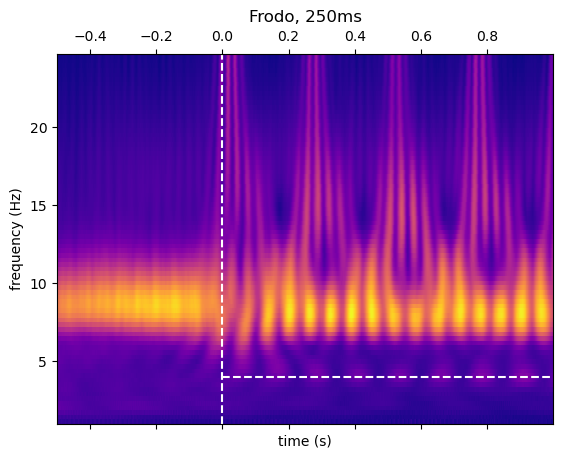

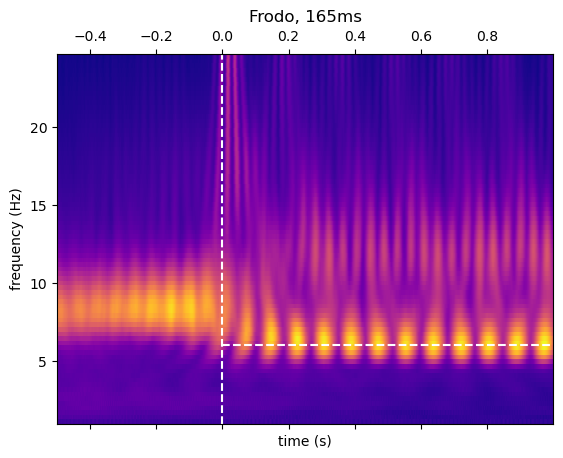

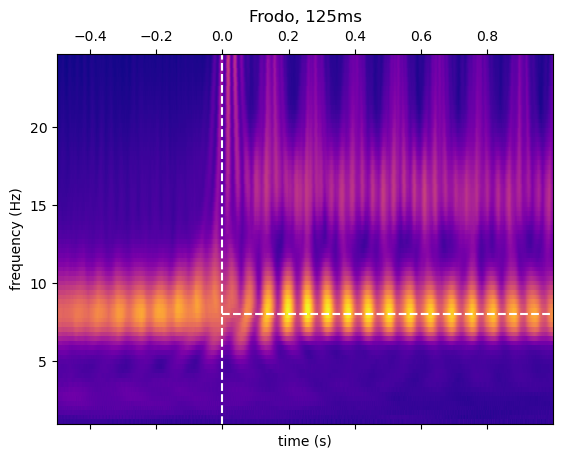

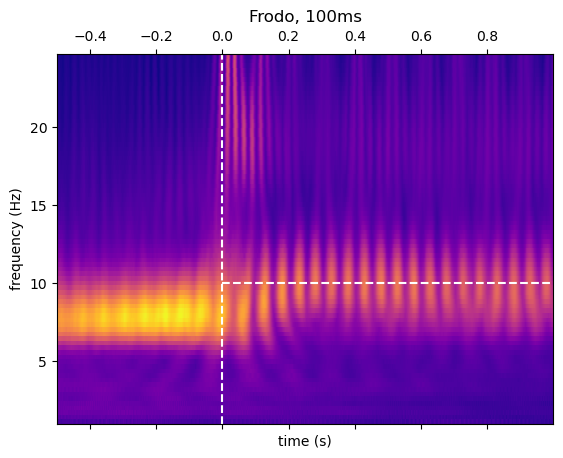

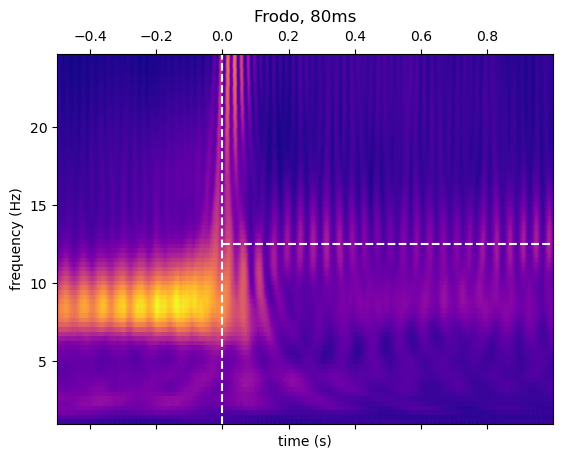

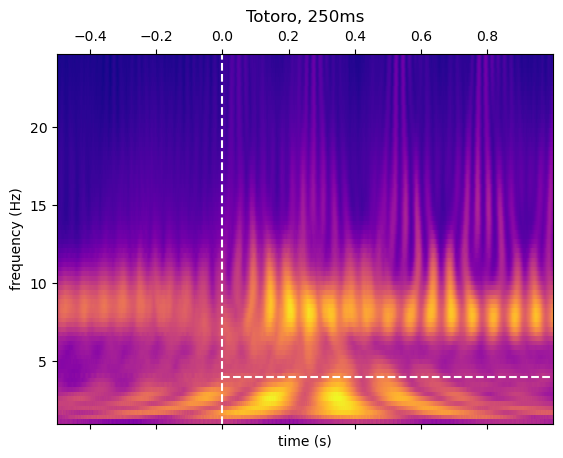

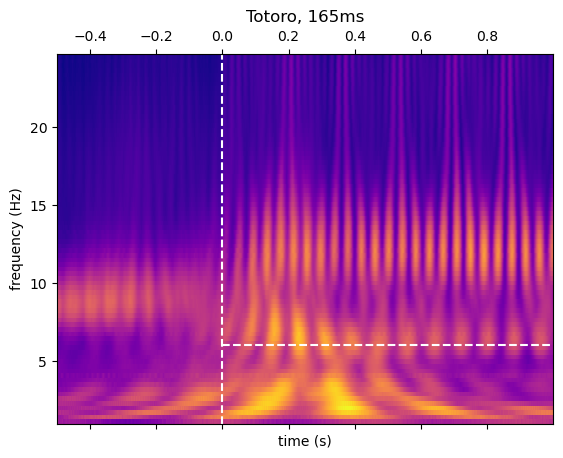

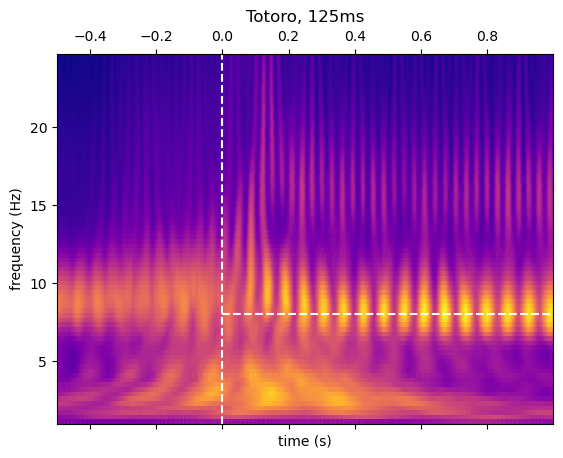

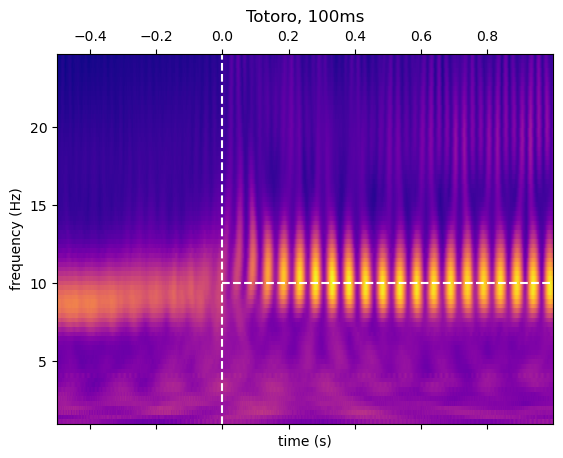

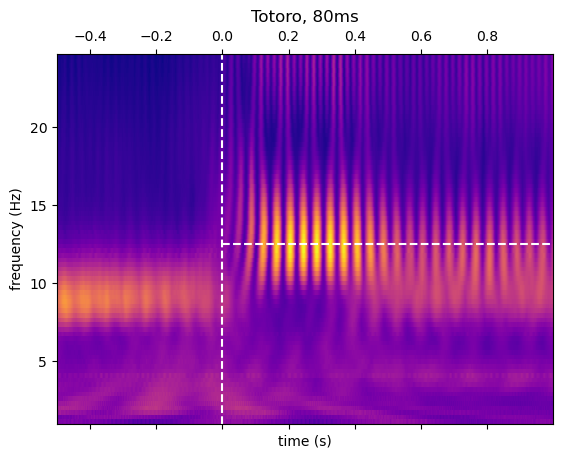

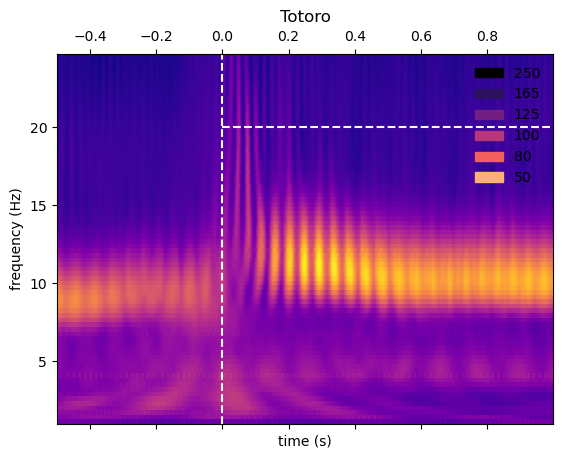

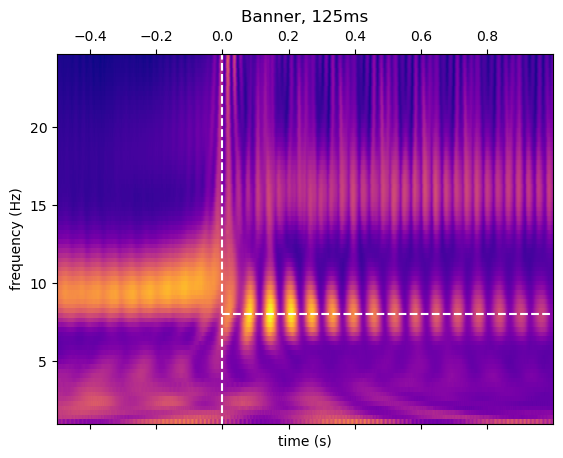

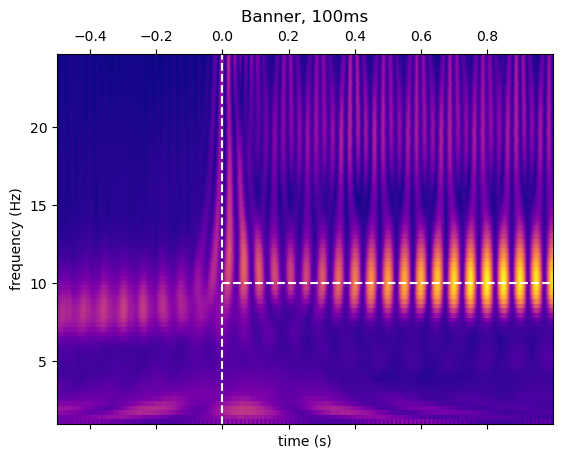

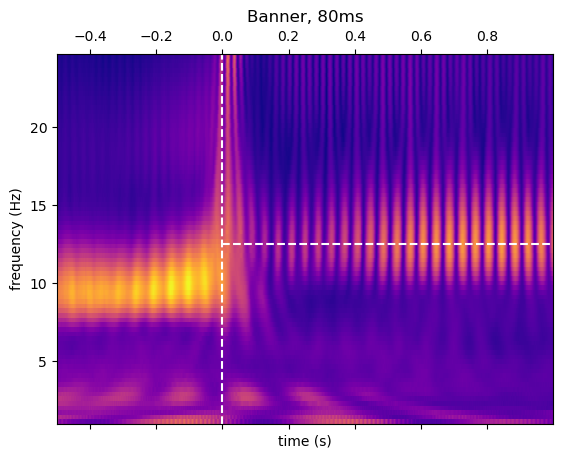

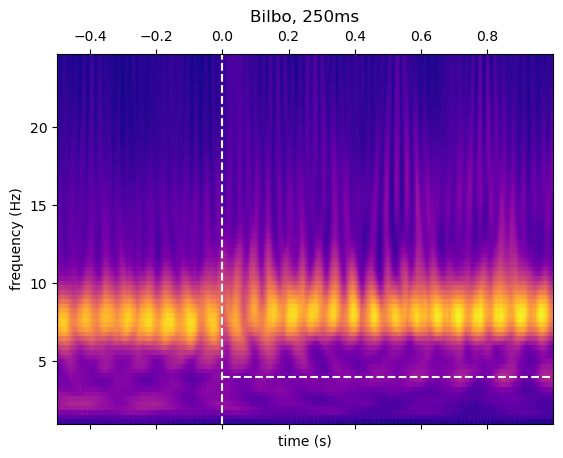

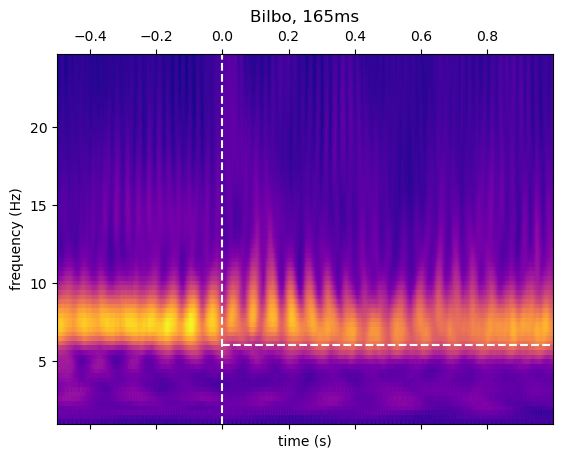

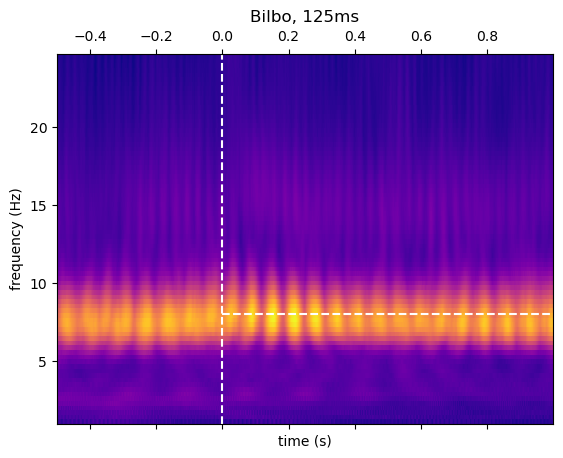

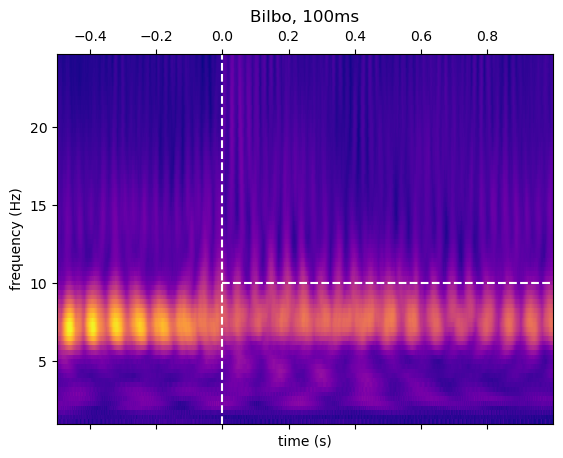

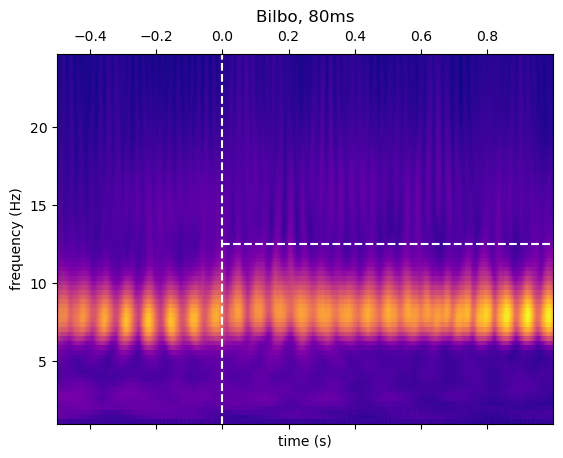

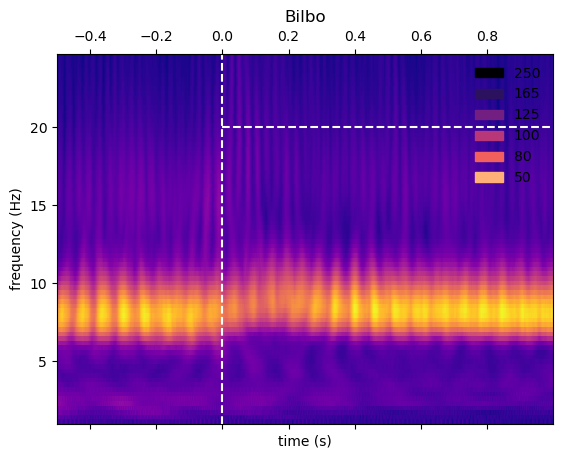

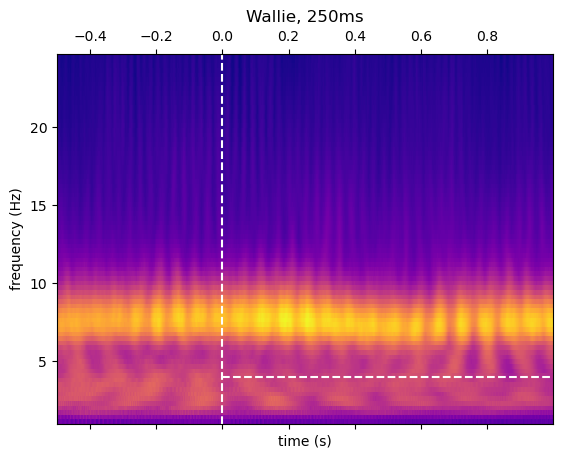

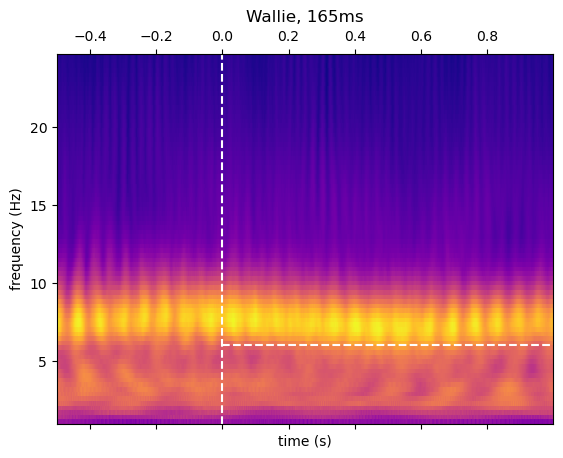

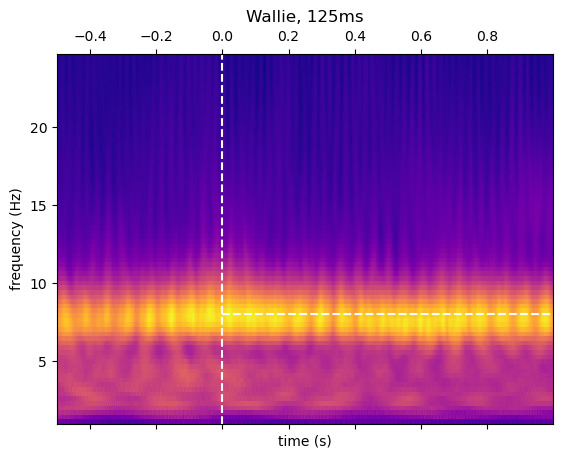

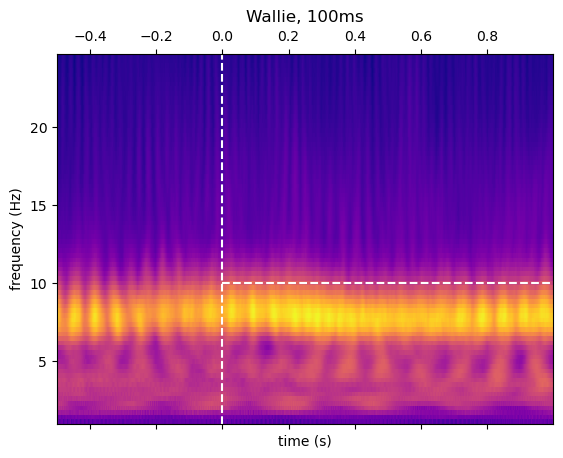

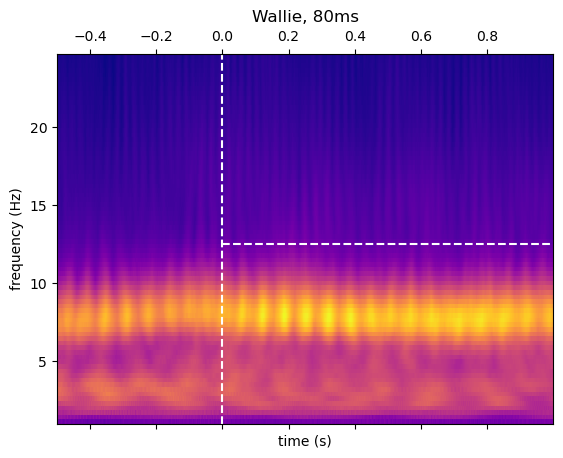

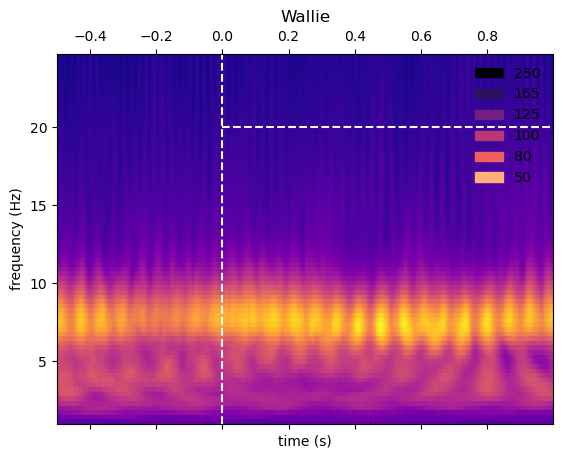

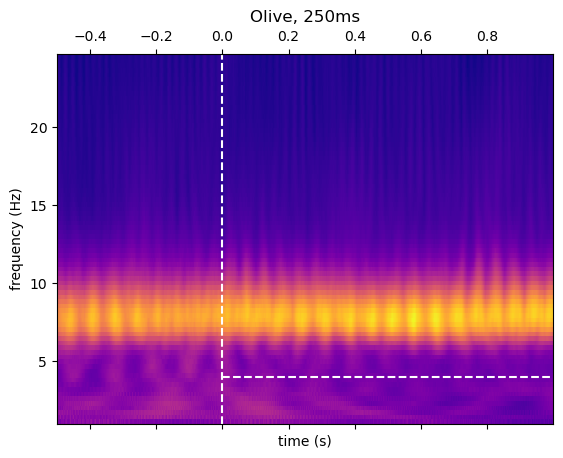

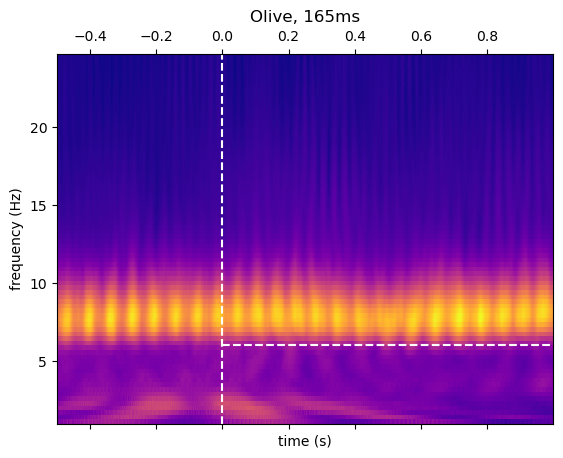

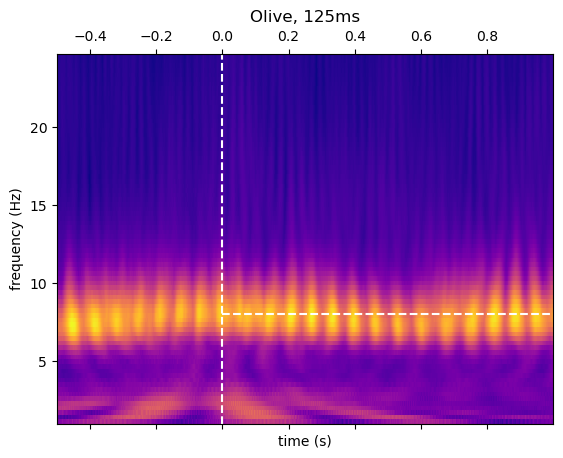

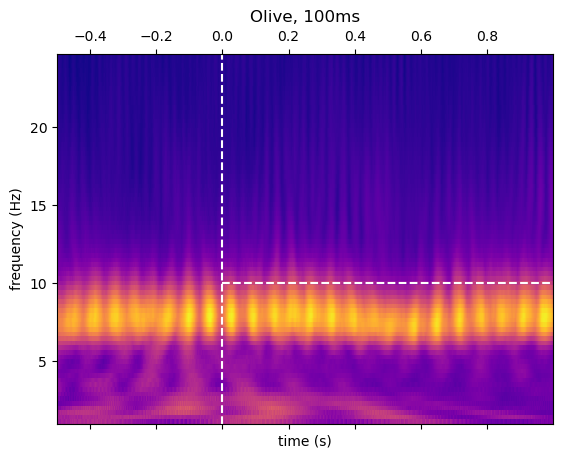

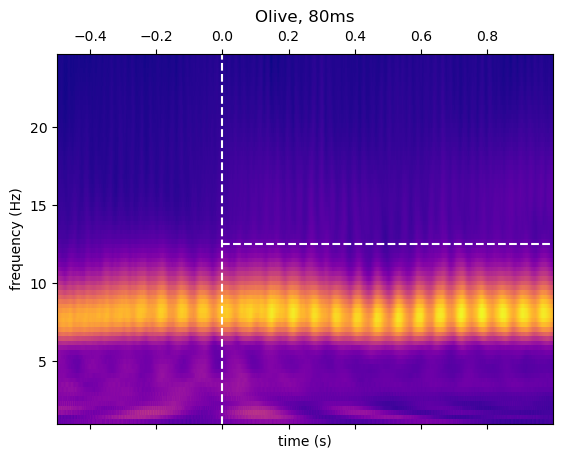

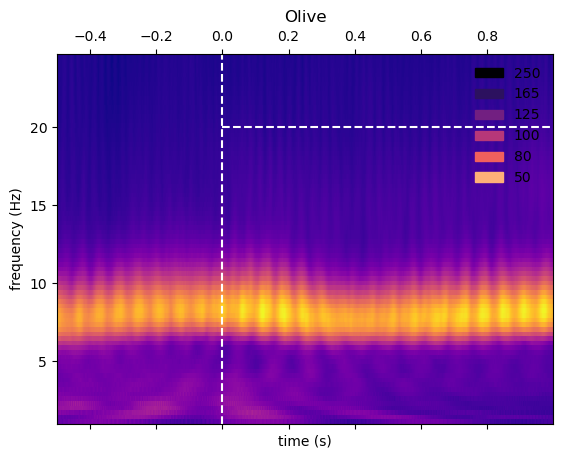

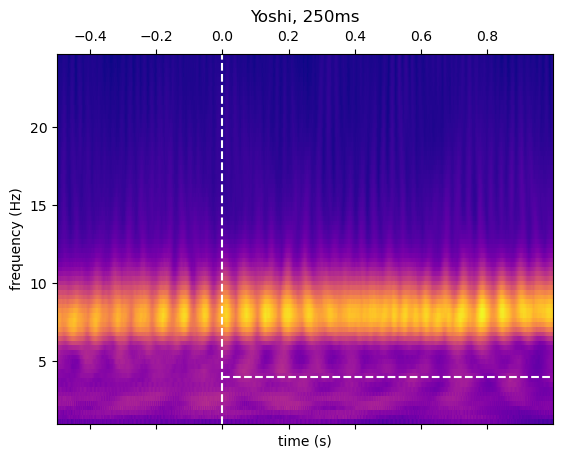

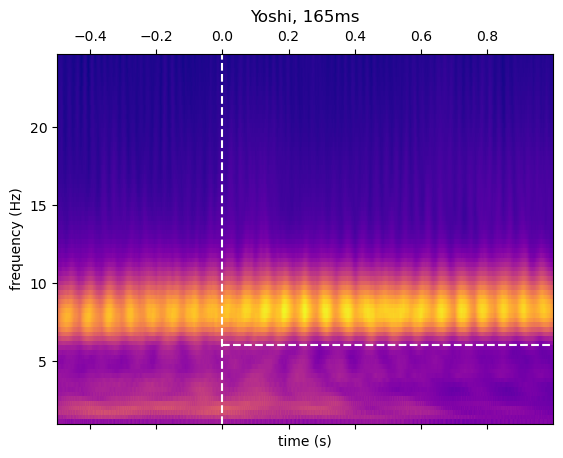

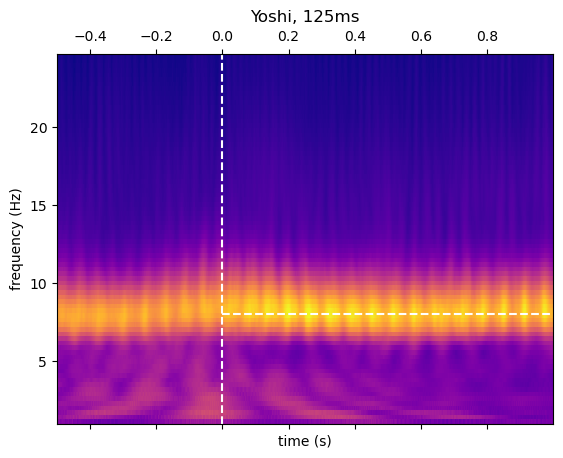

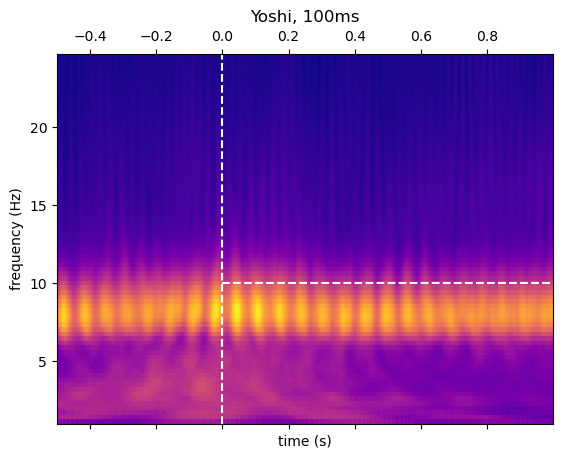

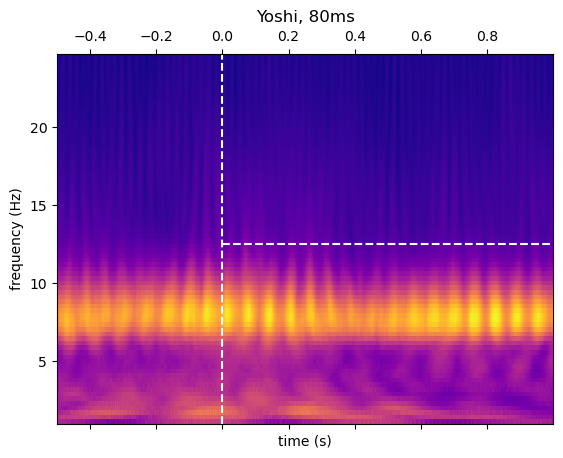

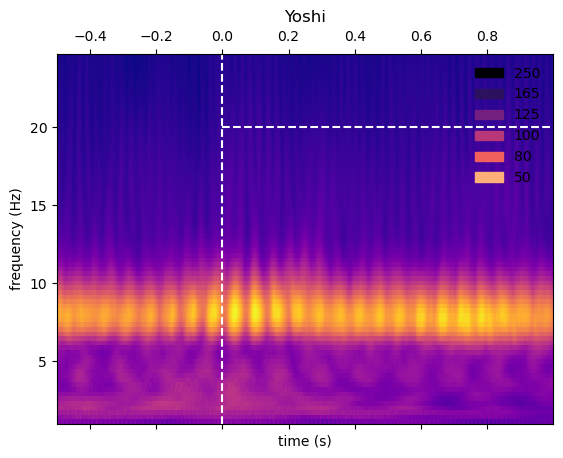

In [52]:
frequencies =  np.arange(1,25,.3)
periods = [250, 165, 125, 100, 80, 50]
handles = []
for animal in ['Frodo',"Totoro",'Banner','Bilbo',"Wallie",'Olive','Yoshi']:
    
    handles=[]
    for i,period in enumerate(periods):#,]):#
        fig=None
        dataset_key = {"animal":animal,
                    "period_ms":period,
                    "min_pulse_length":23,
                    "laser_power": 77,}
        fig = lfp_power_dynamics_pulse_cwt_spectrogram(dataset_key,
                            lfp_trace_window=(-int(0.5 * 1000), int(1* 1000)),
                            color=plt.cm.magma(i/6),
                            fig = fig,
                            frequencies=frequencies,
                            )
        
        handles.append(mpatches.Patch(color=plt.cm.magma(i/6), label=period))
        if fig is None:
            continue
        fig.gca().set_title(f"{animal}, {period}ms")
        # break
    # break
    if fig is None:
        continue
    fig.gca().set_title(f"{animal}")
    fig.get_axes()[0].legend(handles=handles,frameon=False)
    plt.rcParams['svg.fonttype'] = 'none'
    # fig.savefig(f'/home/sambray/Pictures/group_meet_112023/lfp_power/open_loop_cwt_{animal}.svg')

### Drive frequency power

In [3]:
frequencies

array([ 3.        ,  8.33344444, 13.66688889, 19.00033333, 24.33377778,
       29.66722222, 35.00066667, 40.33411111, 45.66755556, 51.001     ])

datasets: 3
{'nwb_file_name': 'Winnie20220713_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[2023-11-13 19:47:16,218][WARNING]: Skipped checksum for file with hash: a0905c5e-d79b-5979-9267-dfb27f9b74a3, and path: /stelmo/nwb/raw/Winnie20220713_.nwb
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_0' has data shape (27079, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_1' has data shape (36041, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-pac

{'nwb_file_name': 'Winnie20220714_.nwb', 'target_interval_list_name': 'pos 13 valid times'}


[2023-11-13 19:47:21,136][WARNING]: Skipped checksum for file with hash: 72a61dc6-65af-acbb-56a4-80758ca9dbc0, and path: /stelmo/nwb/raw/Winnie20220714_.nwb
100%|██████████| 24/24 [00:00<00:00, 258.75it/s]


{'nwb_file_name': 'Winnie20220715_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[2023-11-13 19:47:25,522][WARNING]: Skipped checksum for file with hash: be6282d4-463e-3f82-3998-2b11ac7f50b9, and path: /stelmo/nwb/raw/Winnie20220715_.nwb
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_0' has data shape (27055, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_1' has data shape (25008, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-pac

datasets: 3
{'nwb_file_name': 'Winnie20220713_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[2023-11-13 19:47:29,388][WARNING]: Skipped checksum for file with hash: a0905c5e-d79b-5979-9267-dfb27f9b74a3, and path: /stelmo/nwb/raw/Winnie20220713_.nwb
100%|██████████| 50/50 [00:00<00:00, 260.38it/s]


{'nwb_file_name': 'Winnie20220714_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


[2023-11-13 19:47:32,047][WARNING]: Skipped checksum for file with hash: 72a61dc6-65af-acbb-56a4-80758ca9dbc0, and path: /stelmo/nwb/raw/Winnie20220714_.nwb
100%|██████████| 38/38 [00:00<00:00, 226.88it/s]


{'nwb_file_name': 'Winnie20220715_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[2023-11-13 19:47:34,354][WARNING]: Skipped checksum for file with hash: be6282d4-463e-3f82-3998-2b11ac7f50b9, and path: /stelmo/nwb/raw/Winnie20220715_.nwb
100%|██████████| 51/51 [00:00<00:00, 273.07it/s]


datasets: 3
{'nwb_file_name': 'Winnie20220713_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[2023-11-13 19:47:36,512][WARNING]: Skipped checksum for file with hash: a0905c5e-d79b-5979-9267-dfb27f9b74a3, and path: /stelmo/nwb/raw/Winnie20220713_.nwb
100%|██████████| 42/42 [00:00<00:00, 295.42it/s]


{'nwb_file_name': 'Winnie20220714_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[2023-11-13 19:47:38,758][WARNING]: Skipped checksum for file with hash: 72a61dc6-65af-acbb-56a4-80758ca9dbc0, and path: /stelmo/nwb/raw/Winnie20220714_.nwb
100%|██████████| 18/18 [00:00<00:00, 288.45it/s]


{'nwb_file_name': 'Winnie20220715_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[2023-11-13 19:47:41,531][WARNING]: Skipped checksum for file with hash: be6282d4-463e-3f82-3998-2b11ac7f50b9, and path: /stelmo/nwb/raw/Winnie20220715_.nwb
100%|██████████| 64/64 [00:00<00:00, 273.40it/s]


datasets: 3
{'nwb_file_name': 'Winnie20220713_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[2023-11-13 19:47:43,987][WARNING]: Skipped checksum for file with hash: a0905c5e-d79b-5979-9267-dfb27f9b74a3, and path: /stelmo/nwb/raw/Winnie20220713_.nwb
100%|██████████| 23/23 [00:00<00:00, 299.86it/s]


{'nwb_file_name': 'Winnie20220714_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[2023-11-13 19:47:46,589][WARNING]: Skipped checksum for file with hash: 72a61dc6-65af-acbb-56a4-80758ca9dbc0, and path: /stelmo/nwb/raw/Winnie20220714_.nwb
100%|██████████| 35/35 [00:00<00:00, 281.11it/s]


{'nwb_file_name': 'Winnie20220715_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[2023-11-13 19:47:48,436][WARNING]: Skipped checksum for file with hash: be6282d4-463e-3f82-3998-2b11ac7f50b9, and path: /stelmo/nwb/raw/Winnie20220715_.nwb
100%|██████████| 46/46 [00:00<00:00, 315.96it/s]


datasets: 3
{'nwb_file_name': 'Winnie20220713_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


[2023-11-13 19:47:50,957][WARNING]: Skipped checksum for file with hash: a0905c5e-d79b-5979-9267-dfb27f9b74a3, and path: /stelmo/nwb/raw/Winnie20220713_.nwb
100%|██████████| 21/21 [00:00<00:00, 306.05it/s]


{'nwb_file_name': 'Winnie20220714_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[2023-11-13 19:47:52,947][WARNING]: Skipped checksum for file with hash: 72a61dc6-65af-acbb-56a4-80758ca9dbc0, and path: /stelmo/nwb/raw/Winnie20220714_.nwb
100%|██████████| 42/42 [00:00<00:00, 335.22it/s]


{'nwb_file_name': 'Winnie20220715_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


[2023-11-13 19:47:55,165][WARNING]: Skipped checksum for file with hash: be6282d4-463e-3f82-3998-2b11ac7f50b9, and path: /stelmo/nwb/raw/Winnie20220715_.nwb
100%|██████████| 42/42 [00:00<00:00, 332.50it/s]


datasets: 3
{'nwb_file_name': 'Winnie20220713_.nwb', 'target_interval_list_name': 'pos 13 valid times'}


[2023-11-13 19:47:57,350][WARNING]: Skipped checksum for file with hash: a0905c5e-d79b-5979-9267-dfb27f9b74a3, and path: /stelmo/nwb/raw/Winnie20220713_.nwb
100%|██████████| 4/4 [00:00<00:00, 337.47it/s]


{'nwb_file_name': 'Winnie20220714_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[2023-11-13 19:47:59,629][WARNING]: Skipped checksum for file with hash: 72a61dc6-65af-acbb-56a4-80758ca9dbc0, and path: /stelmo/nwb/raw/Winnie20220714_.nwb
100%|██████████| 59/59 [00:00<00:00, 387.42it/s]


{'nwb_file_name': 'Winnie20220715_.nwb', 'target_interval_list_name': 'pos 13 valid times'}


[2023-11-13 19:48:02,475][WARNING]: Skipped checksum for file with hash: be6282d4-463e-3f82-3998-2b11ac7f50b9, and path: /stelmo/nwb/raw/Winnie20220715_.nwb
100%|██████████| 51/51 [00:00<00:00, 348.24it/s]


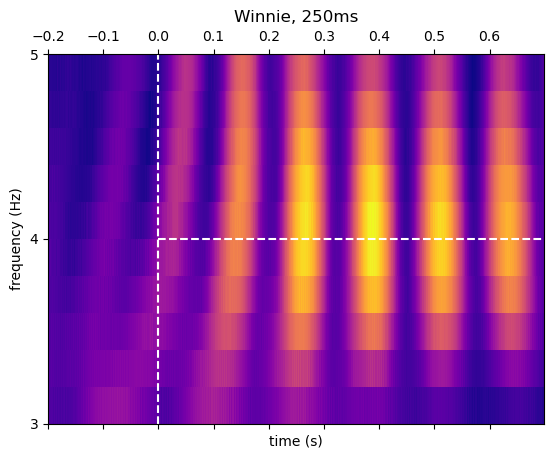

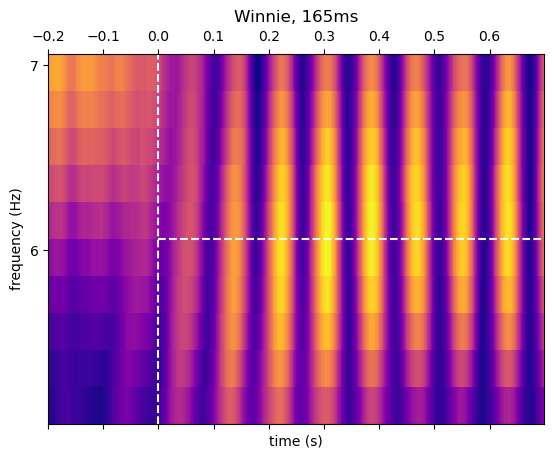

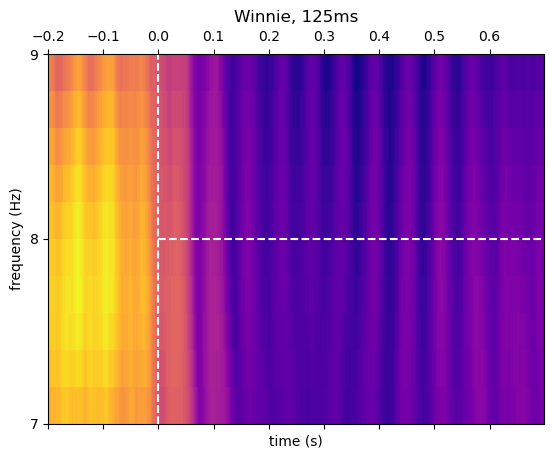

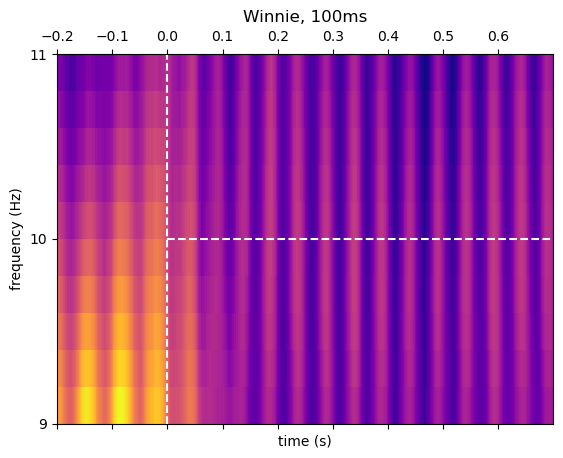

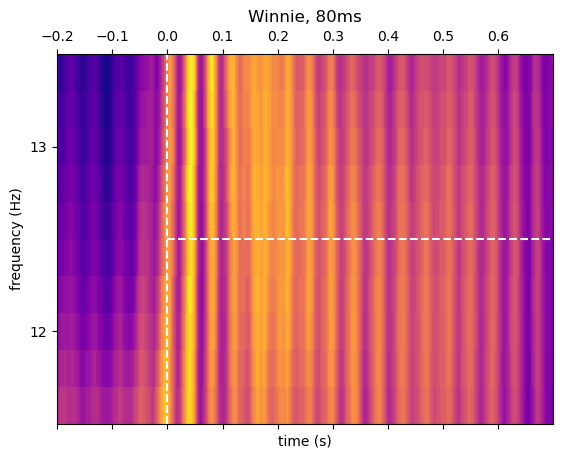

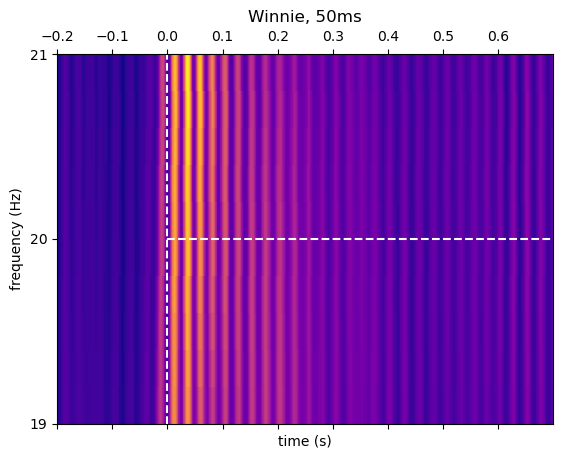

In [37]:

periods = [250, 165, 125, 100, 80, 50]
handles = []
for animal in ['Winnie']:
    powers = []
    handles=[]
    for i,period in enumerate(periods):#,]):#
        f0 = float(1000)/period
        frequencies =  np.linspace(f0-1,f0+1.001,10)
        fig=None
        dataset_key = {"animal":animal,
                    "period_ms":period,
                    "min_pulse_length":23,
                    "laser_power": 77,}
        fig,data = lfp_power_dynamics_pulse_cwt_spectrogram(dataset_key,
                            lfp_trace_window=(-int(0.2 * 1000), int(.7* 1000)),
                            color=plt.cm.magma(i/6),
                            fig = fig,
                            frequencies=frequencies,
                            return_data=True,
                            )
        powers.append(np.abs(data).sum(axis=1).sum(axis=1))
        
        handles.append(mpatches.Patch(color=plt.cm.magma(i/6), label=period))
        if fig is None:
            continue
        fig.gca().set_title(f"{animal}, {period}ms")
        # break
    break
    if fig is None:
        continue
    fig.gca().set_title(f"{animal}")
    # fig.get_axes()[0].legend(handles=handles,frameon=False)
    plt.rcParams['svg.fonttype'] = 'none'
    # fig.savefig(f'/home/sambray/Pictures/group_meet_112023/lfp_power/open_loop_cwt_{animal}.svg')

(0.0, 10000000.0)

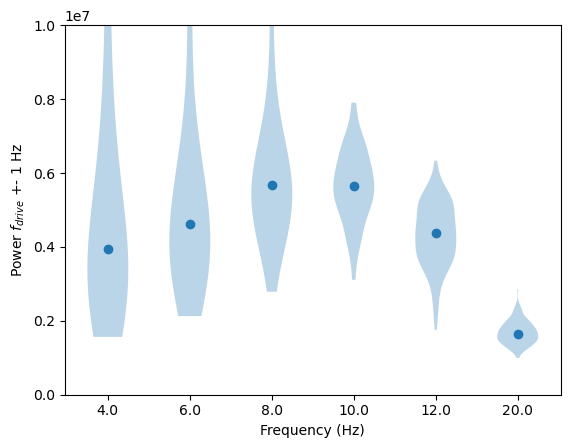

In [36]:
fig = plt.figure()
ax = fig.gca()
plt.violinplot(powers,showmedians=False,showextrema=False)
plt.scatter(np.arange(len(powers))+1,[np.median(x) for x in powers])
ax.set_xticks(np.arange(len(powers))+1)

ax.set_xticklabels(np.round(1000/np.array(periods),0))

ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Power $f_{drive}$ +- 1 Hz')
ax.set_ylim(0,1e7)


### Power curve

In [40]:
frequencies =  np.arange(5,11,.3)
periods = [250, 165, 125, 100, 80, 50]
handles = []
for animal in ['Winnie','Frodo',"Totoro",'Banner','Bilbo',"Wallie",'Olive','Yoshi']:
    fig=None
    handles=[]
    for i,period in enumerate(periods):#,]):#
        dataset_key = {"animal":animal,
                    "period_ms":period,
                    "min_pulse_length":23,
                    "laser_power": 77,}
        fig = lfp_power_dynamics_pulse_cwt(dataset_key,
                            lfp_trace_window=(-int(0.5 * 1000), int(1.01* 1000)),
                            color=plt.cm.magma(i/6),
                            fig = fig,
                            frequencies=frequencies,
                            )
        
        handles.append(mpatches.Patch(color=plt.cm.magma(i/6), label=period))

    if fig is None:
        continue
    fig.gca().set_title(f"{animal}")
    fig.get_axes()[0].legend(handles=handles,frameon=False)
    plt.rcParams['svg.fonttype'] = 'none'
    # fig.savefig(f'/home/sambray/Pictures/group_meet_112023/lfp_power/open_loop_cwt_{animal}.svg')
    #     break
    # break
        # handles.append(mpatches.Patch(color=plt.cm.magma(i/6), label=period))

datasets: 3
{'nwb_file_name': 'Winnie20220713_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[2023-11-13 12:40:43,623][WARNING]: Skipped checksum for file with hash: a0905c5e-d79b-5979-9267-dfb27f9b74a3, and path: /stelmo/nwb/raw/Winnie20220713_.nwb
  0%|          | 0/57 [00:00<?, ?it/s]

(1277931, 1)


  2%|▏         | 1/57 [04:14<3:57:43, 254.70s/it]

(1277931, 1)


  4%|▎         | 2/57 [04:15<1:36:27, 105.22s/it]

(1277931, 1)


  5%|▌         | 3/57 [04:15<51:40, 57.42s/it]   

(1277931, 1)


  7%|▋         | 4/57 [04:16<30:53, 34.96s/it]

(1277931, 1)


  9%|▉         | 5/57 [04:16<19:32, 22.55s/it]

(1277931, 1)


 11%|█         | 6/57 [04:17<12:48, 15.06s/it]

(1277931, 1)


 12%|█▏        | 7/57 [04:18<30:43, 36.87s/it]


(1277931, 1)


KeyboardInterrupt: 

In [33]:
dat

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [50]:
f_drive

array([11.5, 12.5, 13.5])

[2023-11-01 11:43:12,781][WARNING]: Skipped checksum for file with hash: f8c614b7-dcac-da36-5ab4-865c56ae0765, and path: /stelmo/nwb/raw/Frodo20230808_.nwb


datasets: 2
{'nwb_file_name': 'Frodo20230808_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


  0%|          | 0/23 [00:00<?, ?it/s]

285


/home/sambray/Documents/MS_analysis_samsplaying/Analysis/lfp_analysis.py:1702: RuntimeWarning: invalid value encountered in divide
  if len(power_curves) > 10:
  4%|▍         | 1/23 [00:00<00:04,  5.37it/s]

285


  9%|▊         | 2/23 [00:00<00:03,  5.59it/s]

285


 13%|█▎        | 3/23 [00:00<00:03,  5.74it/s]

285


 17%|█▋        | 4/23 [00:00<00:03,  5.83it/s]

285


 22%|██▏       | 5/23 [00:00<00:03,  5.89it/s]

285


 26%|██▌       | 6/23 [00:01<00:02,  5.92it/s]

285


 30%|███       | 7/23 [00:01<00:02,  5.95it/s]

285


 35%|███▍      | 8/23 [00:01<00:02,  5.96it/s]

285


 39%|███▉      | 9/23 [00:01<00:02,  5.97it/s]

285


 43%|████▎     | 10/23 [00:01<00:02,  5.98it/s]

285


 48%|████▊     | 11/23 [00:01<00:02,  5.98it/s]

285


 52%|█████▏    | 12/23 [00:02<00:01,  5.99it/s]

285


 57%|█████▋    | 13/23 [00:02<00:01,  5.96it/s]

285


 61%|██████    | 14/23 [00:02<00:01,  5.97it/s]

285


 65%|██████▌   | 15/23 [00:02<00:01,  5.99it/s]

285


 70%|██████▉   | 16/23 [00:02<00:01,  5.99it/s]

285


 74%|███████▍  | 17/23 [00:02<00:01,  5.98it/s]

285


 78%|███████▊  | 18/23 [00:03<00:00,  5.98it/s]

285


 83%|████████▎ | 19/23 [00:03<00:00,  5.96it/s]

285


 87%|████████▋ | 20/23 [00:03<00:00,  5.96it/s]

285


 91%|█████████▏| 21/23 [00:03<00:00,  5.97it/s]

285


 96%|█████████▌| 22/23 [00:03<00:00,  5.96it/s]

285


100%|██████████| 23/23 [00:03<00:00,  5.93it/s]


{'nwb_file_name': 'Frodo20230809_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[2023-11-01 11:43:16,874][WARNING]: Skipped checksum for file with hash: c7292c94-02fe-115c-6b40-39427ac1a36a, and path: /stelmo/nwb/raw/Frodo20230809_.nwb
  0%|          | 0/77 [00:00<?, ?it/s]/home/sambray/Documents/MS_analysis_samsplaying/Analysis/lfp_analysis.py:1702: RuntimeWarning: invalid value encountered in divide
  if len(power_curves) > 10:
  1%|▏         | 1/77 [00:00<00:12,  5.86it/s]

285
285


  4%|▍         | 3/77 [00:00<00:12,  5.96it/s]

285
285


  6%|▋         | 5/77 [00:00<00:12,  5.98it/s]

285
285


  9%|▉         | 7/77 [00:01<00:11,  5.98it/s]

285
285


 12%|█▏        | 9/77 [00:01<00:11,  6.00it/s]

285
285


 14%|█▍        | 11/77 [00:01<00:10,  6.02it/s]

285
285


 17%|█▋        | 13/77 [00:02<00:10,  6.00it/s]

285
285


 19%|█▉        | 15/77 [00:02<00:10,  6.00it/s]

285
285


 22%|██▏       | 17/77 [00:02<00:09,  6.02it/s]

285
285


 25%|██▍       | 19/77 [00:03<00:09,  6.00it/s]

285
285


 27%|██▋       | 21/77 [00:03<00:09,  6.01it/s]

285
285


 30%|██▉       | 23/77 [00:03<00:08,  6.02it/s]

285
285


 32%|███▏      | 25/77 [00:04<00:08,  6.02it/s]

285
285


 35%|███▌      | 27/77 [00:04<00:08,  6.02it/s]

285
285


 38%|███▊      | 29/77 [00:04<00:08,  5.97it/s]

285
285


 40%|████      | 31/77 [00:05<00:07,  5.98it/s]

285
285


 43%|████▎     | 33/77 [00:05<00:07,  5.98it/s]

285
285


 45%|████▌     | 35/77 [00:05<00:07,  6.00it/s]

285
285


 48%|████▊     | 37/77 [00:06<00:06,  5.99it/s]

285
285


 51%|█████     | 39/77 [00:06<00:06,  5.98it/s]

285
285


 53%|█████▎    | 41/77 [00:06<00:06,  5.97it/s]

285
285


 56%|█████▌    | 43/77 [00:07<00:05,  5.92it/s]

285
285


 58%|█████▊    | 45/77 [00:07<00:05,  5.96it/s]

285
285


 61%|██████    | 47/77 [00:07<00:05,  5.99it/s]

285
285


 64%|██████▎   | 49/77 [00:08<00:04,  5.99it/s]

285
285


 66%|██████▌   | 51/77 [00:08<00:04,  6.01it/s]

285
285


 69%|██████▉   | 53/77 [00:08<00:04,  5.98it/s]

285
285


 71%|███████▏  | 55/77 [00:09<00:03,  5.99it/s]

285
285


 74%|███████▍  | 57/77 [00:09<00:03,  6.00it/s]

285
285


 77%|███████▋  | 59/77 [00:09<00:02,  6.01it/s]

285
285


 79%|███████▉  | 61/77 [00:10<00:02,  5.99it/s]

285
285


 82%|████████▏ | 63/77 [00:10<00:02,  5.98it/s]

285
285


 84%|████████▍ | 65/77 [00:10<00:02,  5.97it/s]

285
285


 87%|████████▋ | 67/77 [00:11<00:01,  5.97it/s]

285
285


 90%|████████▉ | 69/77 [00:11<00:01,  5.99it/s]

285
285


 92%|█████████▏| 71/77 [00:11<00:01,  5.99it/s]

285
285


 95%|█████████▍| 73/77 [00:12<00:00,  5.99it/s]

285
285


 97%|█████████▋| 75/77 [00:12<00:00,  6.02it/s]

285
285


100%|██████████| 77/77 [00:12<00:00,  5.99it/s]


285
(100, 1500)


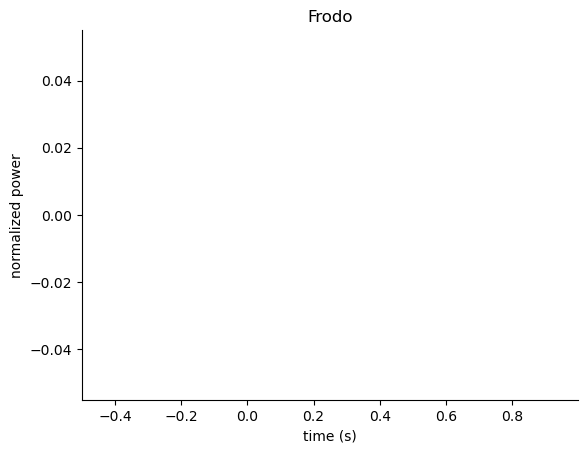

In [49]:
frequencies =  np.arange(7,9.01,1)

for animal in ['Frodo']:##['Bilbo','Frodo',"Totoro","Wallie",'Winnie','Olive','Banner',]:
    fig=None
    handles=[]
    for i,period in enumerate([80,250, 165, 125, 100, 80, 50]):#,]):#
        dataset_key = {"animal":animal,
                    "period_ms":period,
                    "min_pulse_length":39,
                    "laser_power": 77,}
        f_drive = np.arange(1/period*1000-1,1/period*1000+1.01,1)
        fig = lfp_power_dynamics_pulse_cwt(dataset_key,
                            lfp_trace_window=(-int(0.5 * 1000), int(1* 1000)),
                            color='firebrick',
                            fig = fig,
                            frequencies=frequencies/2,
                            )
        # fig = lfp_power_dynamics_pulse_cwt(dataset_key,
        #                     lfp_trace_window=(-int(0.5 * 1000), int(2* 1000)),
        #                     color='cornflowerblue',
        #                     fig = fig,
        #                     frequencies=frequencies,
        #                     )
        
        fig.gca().set_title(f"{animal}")
        break
    break

In [19]:
f_drive

array([3., 4., 5.])

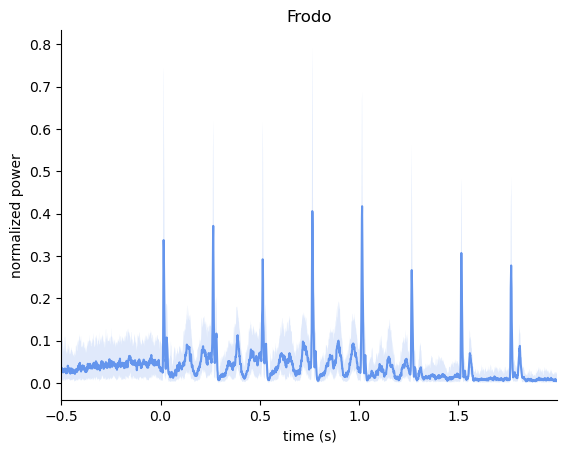

In [17]:
fig

## Closed Loop

### Spectrogram

#### Group by animal

In [9]:
import os
os.chdir('/home/sambray/Documents/MS_analysis_samsplaying/')
from Style.style_guide import animal_style
import numpy as np
import matplotlib.pyplot as plt
requencies =  np.arange(1,25,.3)
phases = [90, 180,]# 270, 360]
handles = []
window = (-int(0.5 * 1000), int(1* 1000))
norm_window = (-300,0)
for animal in ["Winnie"]:#['Winnie','Banner','Totoro']:
    
    handles=[]
    theta_power = []
    fig_traces = plt.figure()
    for i,phase in enumerate(phases):#,]):#
        fig=None
        dataset_key = {"animal":animal,
                    "targeted_phase":phase,
                    "min_pulse_length":22,
                    "laser_power": 77,
                    'track_type':'lineartrack'}
        fig, spectrogram, traces = lfp_power_dynamics_pulse_cwt_spectrogram(dataset_key,
                            lfp_trace_window=window,
                            color=plt.cm.magma(i/4),
                            fig = fig,
                            frequencies=frequencies,
                            return_data = True
                            )
        power = traces[0]
        tp = np.linspace(*window,power.shape[1])
        # normalize by pre-pulse theta power
        ind_norm = np.logical_and(tp>norm_window[0],tp<norm_window[1])
        power_norm = power[:,ind_norm].mean(axis=1)
        power = power/power_norm[:,None]
        
        
        fig_traces.gca().plot(tp, np.median(power,axis=0),color=plt.cm.magma(i/4), label=phase)
        fig_traces.gca().fill_between(tp, np.percentile(power,25,axis=0),
                                      np.percentile(power,75,axis=0),
                                      facecolor=plt.cm.magma(i/4),alpha=0.2)
        # handles.append(mpatches.Patch(color=plt.cm.magma(i/6), label=period))
        if fig is None:
            continue
        fig_traces.gca().set_title(f"{animal}")
        fig_traces.gca().set_xlabel('Time (ms)')
        fig_traces.gca().set_ylabel('Normalized Theta Power')
        fig_traces.gca().legend()
        fig.gca().set_title(f"{animal}, $\\theta$={phase}")
    
    break

NameError: name 'frequencies' is not defined

<Figure size 640x480 with 0 Axes>

#### Group by stim condition

In [4]:
tp[-10:]

array([2990.99742784, 2991.99771363, 2992.99799943, 2993.99828522,
       2994.99857102, 2995.99885682, 2996.99914261, 2997.99942841,
       2998.9997142 , 3000.        ])

datasets: 19
{'nwb_file_name': 'Winnie20220719_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[08:02:24][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:02:25,385][WARNING]: Skipped checksum for file with hash: 0a338b66-5ad3-87c4-0bb1-163250636511, and path: /stelmo/nwb/raw/Winnie20220719_.nwb
100%|██████████| 82/82 [00:03<00:00, 23.32it/s]


{'nwb_file_name': 'Winnie20220719_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


[08:02:29][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:02:30,981][WARNING]: Skipped checksum for file with hash: 0a338b66-5ad3-87c4-0bb1-163250636511, and path: /stelmo/nwb/raw/Winnie20220719_.nwb
100%|██████████| 18/18 [00:00<00:00, 24.53it/s]


{'nwb_file_name': 'Winnie20220719_.nwb', 'target_interval_list_name': 'pos 13 valid times'}


[08:02:32][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:02:33,453][WARNING]: Skipped checksum for file with hash: 0a338b66-5ad3-87c4-0bb1-163250636511, and path: /stelmo/nwb/raw/Winnie20220719_.nwb
100%|██████████| 43/43 [00:01<00:00, 23.06it/s]


{'nwb_file_name': 'Winnie20220719_.nwb', 'target_interval_list_name': 'pos 15 valid times'}


[08:02:35][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:02:37,038][WARNING]: Skipped checksum for file with hash: 0a338b66-5ad3-87c4-0bb1-163250636511, and path: /stelmo/nwb/raw/Winnie20220719_.nwb
100%|██████████| 50/50 [00:02<00:00, 24.02it/s]


{'nwb_file_name': 'Winnie20220719_.nwb', 'target_interval_list_name': 'pos 17 valid times'}


[08:02:39][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:02:40,855][WARNING]: Skipped checksum for file with hash: 0a338b66-5ad3-87c4-0bb1-163250636511, and path: /stelmo/nwb/raw/Winnie20220719_.nwb
100%|██████████| 86/86 [00:03<00:00, 23.60it/s]


{'nwb_file_name': 'Winnie20220719_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[08:02:45][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:02:46,225][WARNING]: Skipped checksum for file with hash: 0a338b66-5ad3-87c4-0bb1-163250636511, and path: /stelmo/nwb/raw/Winnie20220719_.nwb
100%|██████████| 15/15 [00:00<00:00, 23.35it/s]


{'nwb_file_name': 'Winnie20220719_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[08:02:47][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:02:48,618][WARNING]: Skipped checksum for file with hash: 0a338b66-5ad3-87c4-0bb1-163250636511, and path: /stelmo/nwb/raw/Winnie20220719_.nwb
100%|██████████| 14/14 [00:00<00:00, 23.46it/s]


{'nwb_file_name': 'Winnie20220719_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[08:02:49][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:02:51,103][WARNING]: Skipped checksum for file with hash: 0a338b66-5ad3-87c4-0bb1-163250636511, and path: /stelmo/nwb/raw/Winnie20220719_.nwb
100%|██████████| 47/47 [00:02<00:00, 23.43it/s]


{'nwb_file_name': 'Winnie20220719_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[08:02:53][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:02:54,994][WARNING]: Skipped checksum for file with hash: 0a338b66-5ad3-87c4-0bb1-163250636511, and path: /stelmo/nwb/raw/Winnie20220719_.nwb
100%|██████████| 10/10 [00:00<00:00, 23.05it/s]


{'nwb_file_name': 'Winnie20220720_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[08:02:56][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:02:57,174][WARNING]: Skipped checksum for file with hash: 90d57cfc-7d39-4387-1c8d-5a79e62964ae, and path: /stelmo/nwb/raw/Winnie20220720_.nwb
100%|██████████| 61/61 [00:02<00:00, 23.33it/s]


{'nwb_file_name': 'Winnie20220720_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


[08:03:00][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:03:01,521][WARNING]: Skipped checksum for file with hash: 90d57cfc-7d39-4387-1c8d-5a79e62964ae, and path: /stelmo/nwb/raw/Winnie20220720_.nwb
100%|██████████| 45/45 [00:01<00:00, 23.19it/s]


{'nwb_file_name': 'Winnie20220720_.nwb', 'target_interval_list_name': 'pos 13 valid times'}


[08:03:04][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:03:05,158][WARNING]: Skipped checksum for file with hash: 90d57cfc-7d39-4387-1c8d-5a79e62964ae, and path: /stelmo/nwb/raw/Winnie20220720_.nwb
100%|██████████| 48/48 [00:02<00:00, 22.97it/s]


{'nwb_file_name': 'Winnie20220720_.nwb', 'target_interval_list_name': 'pos 15 valid times'}


[08:03:07][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:03:08,969][WARNING]: Skipped checksum for file with hash: 90d57cfc-7d39-4387-1c8d-5a79e62964ae, and path: /stelmo/nwb/raw/Winnie20220720_.nwb
100%|██████████| 45/45 [00:01<00:00, 22.98it/s]


{'nwb_file_name': 'Winnie20220720_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[08:03:11][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:03:12,639][WARNING]: Skipped checksum for file with hash: 90d57cfc-7d39-4387-1c8d-5a79e62964ae, and path: /stelmo/nwb/raw/Winnie20220720_.nwb
100%|██████████| 49/49 [00:02<00:00, 23.18it/s]


{'nwb_file_name': 'Winnie20220720_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[08:03:15][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:03:16,448][WARNING]: Skipped checksum for file with hash: 90d57cfc-7d39-4387-1c8d-5a79e62964ae, and path: /stelmo/nwb/raw/Winnie20220720_.nwb
100%|██████████| 53/53 [00:02<00:00, 23.22it/s]


{'nwb_file_name': 'Winnie20220720_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[08:03:19][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:03:20,431][WARNING]: Skipped checksum for file with hash: 90d57cfc-7d39-4387-1c8d-5a79e62964ae, and path: /stelmo/nwb/raw/Winnie20220720_.nwb
100%|██████████| 87/87 [00:03<00:00, 22.81it/s]


{'nwb_file_name': 'Winnie20220720_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[08:03:24][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:03:25,983][WARNING]: Skipped checksum for file with hash: 90d57cfc-7d39-4387-1c8d-5a79e62964ae, and path: /stelmo/nwb/raw/Winnie20220720_.nwb
100%|██████████| 46/46 [00:02<00:00, 22.81it/s]


{'nwb_file_name': 'Winnie20220722_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[08:03:28][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:03:29,741][WARNING]: Skipped checksum for file with hash: 192f5f0a-a398-245f-9b68-4dd504f520c8, and path: /stelmo/nwb/raw/Winnie20220722_.nwb
100%|██████████| 45/45 [00:01<00:00, 23.03it/s]


{'nwb_file_name': 'Winnie20220722_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[08:03:32][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:03:33,430][WARNING]: Skipped checksum for file with hash: 192f5f0a-a398-245f-9b68-4dd504f520c8, and path: /stelmo/nwb/raw/Winnie20220722_.nwb
100%|██████████| 57/57 [00:02<00:00, 23.03it/s]


datasets: 16
{'nwb_file_name': 'Yoshi20220517_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[08:04:12][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:04:13,712][WARNING]: Skipped checksum for file with hash: a1668a28-f06d-3c01-37c5-0bcd9019b6eb, and path: /stelmo/nwb/raw/Yoshi20220517_.nwb
100%|██████████| 26/26 [00:01<00:00, 23.64it/s]


{'nwb_file_name': 'Yoshi20220517_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


[08:04:15][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:04:16,549][WARNING]: Skipped checksum for file with hash: a1668a28-f06d-3c01-37c5-0bcd9019b6eb, and path: /stelmo/nwb/raw/Yoshi20220517_.nwb
100%|██████████| 103/103 [00:04<00:00, 23.59it/s]


{'nwb_file_name': 'Yoshi20220517_.nwb', 'target_interval_list_name': 'pos 13 valid times'}


[08:04:21][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:04:22,660][WARNING]: Skipped checksum for file with hash: a1668a28-f06d-3c01-37c5-0bcd9019b6eb, and path: /stelmo/nwb/raw/Yoshi20220517_.nwb
100%|██████████| 52/52 [00:02<00:00, 23.94it/s]


{'nwb_file_name': 'Yoshi20220517_.nwb', 'target_interval_list_name': 'pos 15 valid times'}


[08:04:25][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:04:26,619][WARNING]: Skipped checksum for file with hash: a1668a28-f06d-3c01-37c5-0bcd9019b6eb, and path: /stelmo/nwb/raw/Yoshi20220517_.nwb
100%|██████████| 42/42 [00:01<00:00, 23.25it/s]


{'nwb_file_name': 'Yoshi20220517_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[08:04:29][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:04:30,164][WARNING]: Skipped checksum for file with hash: a1668a28-f06d-3c01-37c5-0bcd9019b6eb, and path: /stelmo/nwb/raw/Yoshi20220517_.nwb
100%|██████████| 49/49 [00:02<00:00, 24.10it/s]


{'nwb_file_name': 'Yoshi20220517_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[08:04:32][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:04:33,923][WARNING]: Skipped checksum for file with hash: a1668a28-f06d-3c01-37c5-0bcd9019b6eb, and path: /stelmo/nwb/raw/Yoshi20220517_.nwb
100%|██████████| 23/23 [00:00<00:00, 24.22it/s]


{'nwb_file_name': 'Yoshi20220517_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[08:04:35][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:04:36,597][WARNING]: Skipped checksum for file with hash: a1668a28-f06d-3c01-37c5-0bcd9019b6eb, and path: /stelmo/nwb/raw/Yoshi20220517_.nwb
100%|██████████| 33/33 [00:01<00:00, 23.75it/s]


{'nwb_file_name': 'Yoshi20220517_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[08:04:38][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:04:39,724][WARNING]: Skipped checksum for file with hash: a1668a28-f06d-3c01-37c5-0bcd9019b6eb, and path: /stelmo/nwb/raw/Yoshi20220517_.nwb
100%|██████████| 92/92 [00:04<00:00, 23.00it/s]


{'nwb_file_name': 'Yoshi20220518_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[08:04:44][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:04:45,496][WARNING]: Skipped checksum for file with hash: 9a9799a5-b2e3-7173-a2fe-5d150ca8128c, and path: /stelmo/nwb/raw/Yoshi20220518_.nwb
100%|██████████| 27/27 [00:01<00:00, 24.61it/s]


{'nwb_file_name': 'Yoshi20220518_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


[08:04:47][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:04:48,375][WARNING]: Skipped checksum for file with hash: 9a9799a5-b2e3-7173-a2fe-5d150ca8128c, and path: /stelmo/nwb/raw/Yoshi20220518_.nwb
100%|██████████| 48/48 [00:02<00:00, 23.10it/s]


{'nwb_file_name': 'Yoshi20220518_.nwb', 'target_interval_list_name': 'pos 13 valid times'}


[08:04:51][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:04:52,223][WARNING]: Skipped checksum for file with hash: 9a9799a5-b2e3-7173-a2fe-5d150ca8128c, and path: /stelmo/nwb/raw/Yoshi20220518_.nwb
100%|██████████| 78/78 [00:03<00:00, 23.19it/s]


{'nwb_file_name': 'Yoshi20220518_.nwb', 'target_interval_list_name': 'pos 15 valid times'}


[08:04:56][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:04:57,347][WARNING]: Skipped checksum for file with hash: 9a9799a5-b2e3-7173-a2fe-5d150ca8128c, and path: /stelmo/nwb/raw/Yoshi20220518_.nwb
100%|██████████| 14/14 [00:00<00:00, 25.44it/s]


{'nwb_file_name': 'Yoshi20220518_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[08:04:58][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:04:59,623][WARNING]: Skipped checksum for file with hash: 9a9799a5-b2e3-7173-a2fe-5d150ca8128c, and path: /stelmo/nwb/raw/Yoshi20220518_.nwb
100%|██████████| 34/34 [00:01<00:00, 24.09it/s]


{'nwb_file_name': 'Yoshi20220518_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[08:05:01][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:05:02,773][WARNING]: Skipped checksum for file with hash: 9a9799a5-b2e3-7173-a2fe-5d150ca8128c, and path: /stelmo/nwb/raw/Yoshi20220518_.nwb
100%|██████████| 39/39 [00:01<00:00, 22.93it/s]


{'nwb_file_name': 'Yoshi20220518_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[08:05:05][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:05:06,222][WARNING]: Skipped checksum for file with hash: 9a9799a5-b2e3-7173-a2fe-5d150ca8128c, and path: /stelmo/nwb/raw/Yoshi20220518_.nwb
100%|██████████| 34/34 [00:01<00:00, 23.24it/s]


{'nwb_file_name': 'Yoshi20220518_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[08:05:08][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:05:09,455][WARNING]: Skipped checksum for file with hash: 9a9799a5-b2e3-7173-a2fe-5d150ca8128c, and path: /stelmo/nwb/raw/Yoshi20220518_.nwb
100%|██████████| 34/34 [00:01<00:00, 24.20it/s]


datasets: 11
{'nwb_file_name': 'Frodo20230814_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[08:05:40][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:05:41,156][WARNING]: Skipped checksum for file with hash: 2895e416-9dd1-3611-4d0b-6f28ff4a93c0, and path: /stelmo/nwb/raw/Frodo20230814_.nwb
100%|██████████| 78/78 [00:02<00:00, 31.10it/s]


{'nwb_file_name': 'Frodo20230814_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


[08:05:44][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:05:45,334][WARNING]: Skipped checksum for file with hash: 2895e416-9dd1-3611-4d0b-6f28ff4a93c0, and path: /stelmo/nwb/raw/Frodo20230814_.nwb
100%|██████████| 80/80 [00:03<00:00, 23.13it/s]


{'nwb_file_name': 'Frodo20230814_.nwb', 'target_interval_list_name': 'pos 13 valid times'}


[08:05:49][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:05:50,080][WARNING]: Skipped checksum for file with hash: 2895e416-9dd1-3611-4d0b-6f28ff4a93c0, and path: /stelmo/nwb/raw/Frodo20230814_.nwb
100%|██████████| 82/82 [00:03<00:00, 23.13it/s]


{'nwb_file_name': 'Frodo20230814_.nwb', 'target_interval_list_name': 'pos 15 valid times'}


[08:05:54][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:05:54,913][WARNING]: Skipped checksum for file with hash: 2895e416-9dd1-3611-4d0b-6f28ff4a93c0, and path: /stelmo/nwb/raw/Frodo20230814_.nwb
100%|██████████| 71/71 [00:03<00:00, 23.14it/s]


{'nwb_file_name': 'Frodo20230814_.nwb', 'target_interval_list_name': 'pos 17 valid times'}


[08:05:58][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:05:59,392][WARNING]: Skipped checksum for file with hash: 2895e416-9dd1-3611-4d0b-6f28ff4a93c0, and path: /stelmo/nwb/raw/Frodo20230814_.nwb
100%|██████████| 62/62 [00:02<00:00, 22.80it/s]


{'nwb_file_name': 'Frodo20230814_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[08:06:02][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:06:03,398][WARNING]: Skipped checksum for file with hash: 2895e416-9dd1-3611-4d0b-6f28ff4a93c0, and path: /stelmo/nwb/raw/Frodo20230814_.nwb
100%|██████████| 73/73 [00:02<00:00, 24.55it/s]


{'nwb_file_name': 'Frodo20230814_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[08:06:07][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:06:07,645][WARNING]: Skipped checksum for file with hash: 2895e416-9dd1-3611-4d0b-6f28ff4a93c0, and path: /stelmo/nwb/raw/Frodo20230814_.nwb
100%|██████████| 96/96 [00:04<00:00, 22.68it/s]


{'nwb_file_name': 'Frodo20230814_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[08:06:12][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:06:13,148][WARNING]: Skipped checksum for file with hash: 2895e416-9dd1-3611-4d0b-6f28ff4a93c0, and path: /stelmo/nwb/raw/Frodo20230814_.nwb
100%|██████████| 102/102 [00:04<00:00, 22.95it/s]


{'nwb_file_name': 'Frodo20230814_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[08:06:18][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:06:18,879][WARNING]: Skipped checksum for file with hash: 2895e416-9dd1-3611-4d0b-6f28ff4a93c0, and path: /stelmo/nwb/raw/Frodo20230814_.nwb
100%|██████████| 56/56 [00:02<00:00, 22.77it/s]


{'nwb_file_name': 'Frodo20230815_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[08:06:21][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:06:22,626][WARNING]: Skipped checksum for file with hash: 41640f73-b318-fe97-3d39-b311780a65a5, and path: /stelmo/nwb/raw/Frodo20230815_.nwb
100%|██████████| 57/57 [00:02<00:00, 23.41it/s]


{'nwb_file_name': 'Frodo20230815_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[08:06:25][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:06:26,348][WARNING]: Skipped checksum for file with hash: 41640f73-b318-fe97-3d39-b311780a65a5, and path: /stelmo/nwb/raw/Frodo20230815_.nwb
100%|██████████| 61/61 [00:02<00:00, 24.74it/s]


datasets: 10
{'nwb_file_name': 'Totoro20220613_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[08:07:02][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:07:04,122][WARNING]: Skipped checksum for file with hash: eaaa1aa8-6aa4-241c-d498-647b68942e3d, and path: /stelmo/nwb/raw/Totoro20220613_.nwb
100%|██████████| 16/16 [00:00<00:00, 31.34it/s]


{'nwb_file_name': 'Totoro20220613_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[08:07:05][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:07:06,475][WARNING]: Skipped checksum for file with hash: eaaa1aa8-6aa4-241c-d498-647b68942e3d, and path: /stelmo/nwb/raw/Totoro20220613_.nwb
100%|██████████| 43/43 [00:01<00:00, 24.24it/s]


{'nwb_file_name': 'Totoro20220614_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[08:07:08][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:07:10,102][WARNING]: Skipped checksum for file with hash: e1c94979-9411-ec20-0102-ba4c8b7c452d, and path: /stelmo/nwb/raw/Totoro20220614_.nwb
100%|██████████| 40/40 [00:01<00:00, 22.31it/s]


{'nwb_file_name': 'Totoro20220614_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


[08:07:12][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:07:13,706][WARNING]: Skipped checksum for file with hash: e1c94979-9411-ec20-0102-ba4c8b7c452d, and path: /stelmo/nwb/raw/Totoro20220614_.nwb
100%|██████████| 57/57 [00:02<00:00, 22.18it/s]


{'nwb_file_name': 'Totoro20220614_.nwb', 'target_interval_list_name': 'pos 13 valid times'}


[08:07:16][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:07:18,090][WARNING]: Skipped checksum for file with hash: e1c94979-9411-ec20-0102-ba4c8b7c452d, and path: /stelmo/nwb/raw/Totoro20220614_.nwb
100%|██████████| 50/50 [00:02<00:00, 22.41it/s]


{'nwb_file_name': 'Totoro20220614_.nwb', 'target_interval_list_name': 'pos 15 valid times'}


[08:07:20][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:07:22,389][WARNING]: Skipped checksum for file with hash: e1c94979-9411-ec20-0102-ba4c8b7c452d, and path: /stelmo/nwb/raw/Totoro20220614_.nwb
100%|██████████| 51/51 [00:02<00:00, 22.21it/s]


{'nwb_file_name': 'Totoro20220614_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[08:07:25][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:07:26,505][WARNING]: Skipped checksum for file with hash: e1c94979-9411-ec20-0102-ba4c8b7c452d, and path: /stelmo/nwb/raw/Totoro20220614_.nwb
100%|██████████| 54/54 [00:02<00:00, 22.16it/s]


{'nwb_file_name': 'Totoro20220614_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[08:07:29][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:07:30,770][WARNING]: Skipped checksum for file with hash: e1c94979-9411-ec20-0102-ba4c8b7c452d, and path: /stelmo/nwb/raw/Totoro20220614_.nwb
100%|██████████| 57/57 [00:02<00:00, 22.25it/s]


{'nwb_file_name': 'Totoro20220614_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[08:07:34][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:07:35,146][WARNING]: Skipped checksum for file with hash: e1c94979-9411-ec20-0102-ba4c8b7c452d, and path: /stelmo/nwb/raw/Totoro20220614_.nwb
100%|██████████| 57/57 [00:02<00:00, 22.11it/s]


{'nwb_file_name': 'Totoro20220614_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[08:07:38][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:07:39,549][WARNING]: Skipped checksum for file with hash: e1c94979-9411-ec20-0102-ba4c8b7c452d, and path: /stelmo/nwb/raw/Totoro20220614_.nwb
100%|██████████| 57/57 [00:02<00:00, 22.91it/s]


datasets: 16
{'nwb_file_name': 'Banner20220224_.nwb', 'target_interval_list_name': 'pos 0 valid times'}


[08:08:01][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:08:03,189][WARNING]: Skipped checksum for file with hash: 0bf1bd37-b51e-dd9a-4a81-6b18f913086e, and path: /stelmo/nwb/raw/Banner20220224_.nwb
100%|██████████| 41/41 [00:01<00:00, 23.37it/s]


{'nwb_file_name': 'Banner20220224_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[08:08:05][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:08:06,782][WARNING]: Skipped checksum for file with hash: 0bf1bd37-b51e-dd9a-4a81-6b18f913086e, and path: /stelmo/nwb/raw/Banner20220224_.nwb
100%|██████████| 24/24 [00:01<00:00, 22.46it/s]


{'nwb_file_name': 'Banner20220224_.nwb', 'target_interval_list_name': 'pos 2 valid times'}


[08:08:08][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:08:09,646][WARNING]: Skipped checksum for file with hash: 0bf1bd37-b51e-dd9a-4a81-6b18f913086e, and path: /stelmo/nwb/raw/Banner20220224_.nwb
100%|██████████| 39/39 [00:01<00:00, 22.85it/s]


{'nwb_file_name': 'Banner20220224_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[08:08:12][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:08:13,194][WARNING]: Skipped checksum for file with hash: 0bf1bd37-b51e-dd9a-4a81-6b18f913086e, and path: /stelmo/nwb/raw/Banner20220224_.nwb
100%|██████████| 51/51 [00:02<00:00, 22.76it/s]


{'nwb_file_name': 'Banner20220224_.nwb', 'target_interval_list_name': 'pos 4 valid times'}


[08:08:16][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:08:17,255][WARNING]: Skipped checksum for file with hash: 0bf1bd37-b51e-dd9a-4a81-6b18f913086e, and path: /stelmo/nwb/raw/Banner20220224_.nwb
100%|██████████| 58/58 [00:02<00:00, 22.68it/s]


{'nwb_file_name': 'Banner20220224_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[08:08:20][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:08:21,597][WARNING]: Skipped checksum for file with hash: 0bf1bd37-b51e-dd9a-4a81-6b18f913086e, and path: /stelmo/nwb/raw/Banner20220224_.nwb
100%|██████████| 63/63 [00:02<00:00, 22.20it/s]


{'nwb_file_name': 'Banner20220224_.nwb', 'target_interval_list_name': 'pos 6 valid times'}


[08:08:25][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:08:26,249][WARNING]: Skipped checksum for file with hash: 0bf1bd37-b51e-dd9a-4a81-6b18f913086e, and path: /stelmo/nwb/raw/Banner20220224_.nwb
100%|██████████| 60/60 [00:02<00:00, 22.18it/s]


{'nwb_file_name': 'Banner20220224_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[08:08:29][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:08:30,767][WARNING]: Skipped checksum for file with hash: 0bf1bd37-b51e-dd9a-4a81-6b18f913086e, and path: /stelmo/nwb/raw/Banner20220224_.nwb
100%|██████████| 54/54 [00:02<00:00, 22.51it/s]


{'nwb_file_name': 'Banner20220225_.nwb', 'target_interval_list_name': 'pos 0 valid times'}


[08:08:33][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:08:34,987][WARNING]: Skipped checksum for file with hash: 7483eae8-42d0-7934-dbba-0f06788c851e, and path: /stelmo/nwb/raw/Banner20220225_.nwb
100%|██████████| 57/57 [00:02<00:00, 22.66it/s]


{'nwb_file_name': 'Banner20220225_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[08:08:38][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:08:39,319][WARNING]: Skipped checksum for file with hash: 7483eae8-42d0-7934-dbba-0f06788c851e, and path: /stelmo/nwb/raw/Banner20220225_.nwb
100%|██████████| 60/60 [00:02<00:00, 22.65it/s]


{'nwb_file_name': 'Banner20220225_.nwb', 'target_interval_list_name': 'pos 2 valid times'}


[08:08:42][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:08:43,767][WARNING]: Skipped checksum for file with hash: 7483eae8-42d0-7934-dbba-0f06788c851e, and path: /stelmo/nwb/raw/Banner20220225_.nwb
100%|██████████| 51/51 [00:02<00:00, 22.37it/s]


{'nwb_file_name': 'Banner20220225_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[08:08:46][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:08:47,858][WARNING]: Skipped checksum for file with hash: 7483eae8-42d0-7934-dbba-0f06788c851e, and path: /stelmo/nwb/raw/Banner20220225_.nwb
100%|██████████| 48/48 [00:02<00:00, 22.70it/s]


{'nwb_file_name': 'Banner20220225_.nwb', 'target_interval_list_name': 'pos 4 valid times'}


[08:08:50][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:08:51,790][WARNING]: Skipped checksum for file with hash: 7483eae8-42d0-7934-dbba-0f06788c851e, and path: /stelmo/nwb/raw/Banner20220225_.nwb
100%|██████████| 53/53 [00:02<00:00, 22.61it/s]


{'nwb_file_name': 'Banner20220225_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[08:08:54][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:08:55,956][WARNING]: Skipped checksum for file with hash: 7483eae8-42d0-7934-dbba-0f06788c851e, and path: /stelmo/nwb/raw/Banner20220225_.nwb
100%|██████████| 52/52 [00:02<00:00, 22.87it/s]


{'nwb_file_name': 'Banner20220225_.nwb', 'target_interval_list_name': 'pos 6 valid times'}


[08:08:58][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:09:00,048][WARNING]: Skipped checksum for file with hash: 7483eae8-42d0-7934-dbba-0f06788c851e, and path: /stelmo/nwb/raw/Banner20220225_.nwb
100%|██████████| 41/41 [00:01<00:00, 22.84it/s]


{'nwb_file_name': 'Banner20220225_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[08:09:02][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:09:03,628][WARNING]: Skipped checksum for file with hash: 7483eae8-42d0-7934-dbba-0f06788c851e, and path: /stelmo/nwb/raw/Banner20220225_.nwb
100%|██████████| 32/32 [00:01<00:00, 23.24it/s]


datasets: 8
{'nwb_file_name': 'Bilbo20230802_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[08:09:37][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:09:38,421][WARNING]: Skipped checksum for file with hash: b2c9164a-2a16-a579-0981-4151e3444234, and path: /stelmo/nwb/raw/Bilbo20230802_.nwb
100%|██████████| 70/70 [00:03<00:00, 22.38it/s]


{'nwb_file_name': 'Bilbo20230802_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


[08:09:42][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:09:42,942][WARNING]: Skipped checksum for file with hash: b2c9164a-2a16-a579-0981-4151e3444234, and path: /stelmo/nwb/raw/Bilbo20230802_.nwb
100%|██████████| 62/62 [00:02<00:00, 23.15it/s]


{'nwb_file_name': 'Bilbo20230802_.nwb', 'target_interval_list_name': 'pos 13 valid times'}


[08:09:46][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:09:47,039][WARNING]: Skipped checksum for file with hash: b2c9164a-2a16-a579-0981-4151e3444234, and path: /stelmo/nwb/raw/Bilbo20230802_.nwb
100%|██████████| 65/65 [00:02<00:00, 22.81it/s]


{'nwb_file_name': 'Bilbo20230802_.nwb', 'target_interval_list_name': 'pos 15 valid times'}


[08:09:50][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:09:51,275][WARNING]: Skipped checksum for file with hash: b2c9164a-2a16-a579-0981-4151e3444234, and path: /stelmo/nwb/raw/Bilbo20230802_.nwb
100%|██████████| 70/70 [00:03<00:00, 23.06it/s]


{'nwb_file_name': 'Bilbo20230802_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[08:09:54][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:09:55,610][WARNING]: Skipped checksum for file with hash: b2c9164a-2a16-a579-0981-4151e3444234, and path: /stelmo/nwb/raw/Bilbo20230802_.nwb
100%|██████████| 56/56 [00:02<00:00, 22.62it/s]


{'nwb_file_name': 'Bilbo20230802_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[08:09:58][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:09:59,400][WARNING]: Skipped checksum for file with hash: b2c9164a-2a16-a579-0981-4151e3444234, and path: /stelmo/nwb/raw/Bilbo20230802_.nwb
100%|██████████| 78/78 [00:03<00:00, 23.03it/s]


{'nwb_file_name': 'Bilbo20230802_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[08:10:03][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:10:04,168][WARNING]: Skipped checksum for file with hash: b2c9164a-2a16-a579-0981-4151e3444234, and path: /stelmo/nwb/raw/Bilbo20230802_.nwb
100%|██████████| 72/72 [00:03<00:00, 23.27it/s]


{'nwb_file_name': 'Bilbo20230802_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[08:10:07][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:10:08,642][WARNING]: Skipped checksum for file with hash: b2c9164a-2a16-a579-0981-4151e3444234, and path: /stelmo/nwb/raw/Bilbo20230802_.nwb
100%|██████████| 60/60 [00:02<00:00, 22.55it/s]


datasets: 10
{'nwb_file_name': 'Wallie20220922_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[08:10:33][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:10:34,394][WARNING]: Skipped checksum for file with hash: 8e4c27ce-6d3e-81a9-2bc5-d068cd98d78c, and path: /stelmo/nwb/raw/Wallie20220922_.nwb
100%|██████████| 35/35 [00:01<00:00, 23.10it/s]


{'nwb_file_name': 'Wallie20220922_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


[08:10:36][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:10:37,835][WARNING]: Skipped checksum for file with hash: 8e4c27ce-6d3e-81a9-2bc5-d068cd98d78c, and path: /stelmo/nwb/raw/Wallie20220922_.nwb
100%|██████████| 49/49 [00:02<00:00, 22.80it/s]


{'nwb_file_name': 'Wallie20220922_.nwb', 'target_interval_list_name': 'pos 13 valid times'}


[08:10:40][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:10:41,874][WARNING]: Skipped checksum for file with hash: 8e4c27ce-6d3e-81a9-2bc5-d068cd98d78c, and path: /stelmo/nwb/raw/Wallie20220922_.nwb
100%|██████████| 50/50 [00:02<00:00, 22.86it/s]


{'nwb_file_name': 'Wallie20220922_.nwb', 'target_interval_list_name': 'pos 15 valid times'}


[08:10:44][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:10:45,894][WARNING]: Skipped checksum for file with hash: 8e4c27ce-6d3e-81a9-2bc5-d068cd98d78c, and path: /stelmo/nwb/raw/Wallie20220922_.nwb
100%|██████████| 43/43 [00:01<00:00, 22.56it/s]


{'nwb_file_name': 'Wallie20220922_.nwb', 'target_interval_list_name': 'pos 17 valid times'}


[08:10:48][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:10:49,648][WARNING]: Skipped checksum for file with hash: 8e4c27ce-6d3e-81a9-2bc5-d068cd98d78c, and path: /stelmo/nwb/raw/Wallie20220922_.nwb
100%|██████████| 45/45 [00:01<00:00, 22.93it/s]


{'nwb_file_name': 'Wallie20220922_.nwb', 'target_interval_list_name': 'pos 19 valid times'}


[08:10:52][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:10:53,488][WARNING]: Skipped checksum for file with hash: 8e4c27ce-6d3e-81a9-2bc5-d068cd98d78c, and path: /stelmo/nwb/raw/Wallie20220922_.nwb
100%|██████████| 42/42 [00:01<00:00, 22.73it/s]


{'nwb_file_name': 'Wallie20220922_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[08:10:55][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:10:57,121][WARNING]: Skipped checksum for file with hash: 8e4c27ce-6d3e-81a9-2bc5-d068cd98d78c, and path: /stelmo/nwb/raw/Wallie20220922_.nwb
100%|██████████| 51/51 [00:02<00:00, 22.86it/s]


{'nwb_file_name': 'Wallie20220922_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[08:11:00][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:11:01,173][WARNING]: Skipped checksum for file with hash: 8e4c27ce-6d3e-81a9-2bc5-d068cd98d78c, and path: /stelmo/nwb/raw/Wallie20220922_.nwb
100%|██████████| 59/59 [00:02<00:00, 22.64it/s]


{'nwb_file_name': 'Wallie20220922_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[08:11:04][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:11:05,550][WARNING]: Skipped checksum for file with hash: 8e4c27ce-6d3e-81a9-2bc5-d068cd98d78c, and path: /stelmo/nwb/raw/Wallie20220922_.nwb
100%|██████████| 65/65 [00:02<00:00, 22.63it/s]


{'nwb_file_name': 'Wallie20220922_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[08:11:09][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:11:10,334][WARNING]: Skipped checksum for file with hash: 8e4c27ce-6d3e-81a9-2bc5-d068cd98d78c, and path: /stelmo/nwb/raw/Wallie20220922_.nwb
100%|██████████| 57/57 [00:02<00:00, 22.60it/s]


datasets: 8
{'nwb_file_name': 'Olive20220711_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[08:11:38][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:11:39,109][WARNING]: Skipped checksum for file with hash: 8e9cc1ba-3e87-2a2a-8edd-40f2ea111b9d, and path: /stelmo/nwb/raw/Olive20220711_.nwb
100%|██████████| 28/28 [00:01<00:00, 22.15it/s]


{'nwb_file_name': 'Olive20220711_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


[08:11:41][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:11:42,259][WARNING]: Skipped checksum for file with hash: 8e9cc1ba-3e87-2a2a-8edd-40f2ea111b9d, and path: /stelmo/nwb/raw/Olive20220711_.nwb
100%|██████████| 59/59 [00:02<00:00, 22.86it/s]


{'nwb_file_name': 'Olive20220711_.nwb', 'target_interval_list_name': 'pos 13 valid times'}


[08:11:45][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:11:46,488][WARNING]: Skipped checksum for file with hash: 8e9cc1ba-3e87-2a2a-8edd-40f2ea111b9d, and path: /stelmo/nwb/raw/Olive20220711_.nwb
100%|██████████| 36/36 [00:01<00:00, 22.28it/s]


{'nwb_file_name': 'Olive20220711_.nwb', 'target_interval_list_name': 'pos 15 valid times'}


[08:11:48][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:11:49,722][WARNING]: Skipped checksum for file with hash: 8e9cc1ba-3e87-2a2a-8edd-40f2ea111b9d, and path: /stelmo/nwb/raw/Olive20220711_.nwb
100%|██████████| 53/53 [00:02<00:00, 22.54it/s]


{'nwb_file_name': 'Olive20220711_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[08:11:52][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:11:53,708][WARNING]: Skipped checksum for file with hash: 8e9cc1ba-3e87-2a2a-8edd-40f2ea111b9d, and path: /stelmo/nwb/raw/Olive20220711_.nwb
100%|██████████| 28/28 [00:01<00:00, 22.62it/s]


{'nwb_file_name': 'Olive20220711_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[08:11:55][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:11:56,504][WARNING]: Skipped checksum for file with hash: 8e9cc1ba-3e87-2a2a-8edd-40f2ea111b9d, and path: /stelmo/nwb/raw/Olive20220711_.nwb
100%|██████████| 43/43 [00:01<00:00, 22.30it/s]


{'nwb_file_name': 'Olive20220711_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[08:11:59][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:12:00,414][WARNING]: Skipped checksum for file with hash: 8e9cc1ba-3e87-2a2a-8edd-40f2ea111b9d, and path: /stelmo/nwb/raw/Olive20220711_.nwb
100%|██████████| 30/30 [00:01<00:00, 22.63it/s]


{'nwb_file_name': 'Olive20220711_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[08:12:02][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_v1`.`__l_f_p_v1`', '`lfp_merge`.`l_f_p_output`'}. Please submit a bug report with the snippet used.
[2024-06-11 08:12:03,352][WARNING]: Skipped checksum for file with hash: 8e9cc1ba-3e87-2a2a-8edd-40f2ea111b9d, and path: /stelmo/nwb/raw/Olive20220711_.nwb
100%|██████████| 69/69 [00:03<00:00, 22.70it/s]


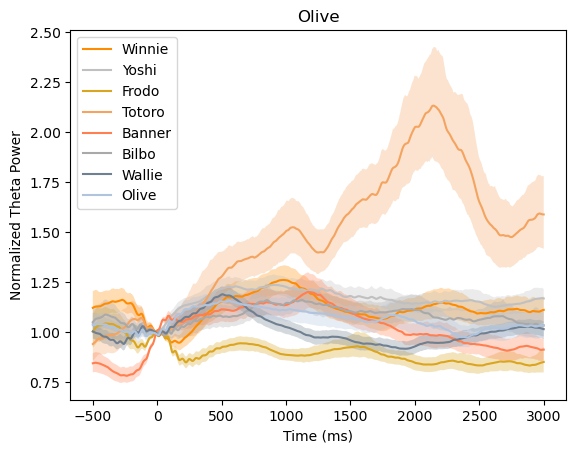

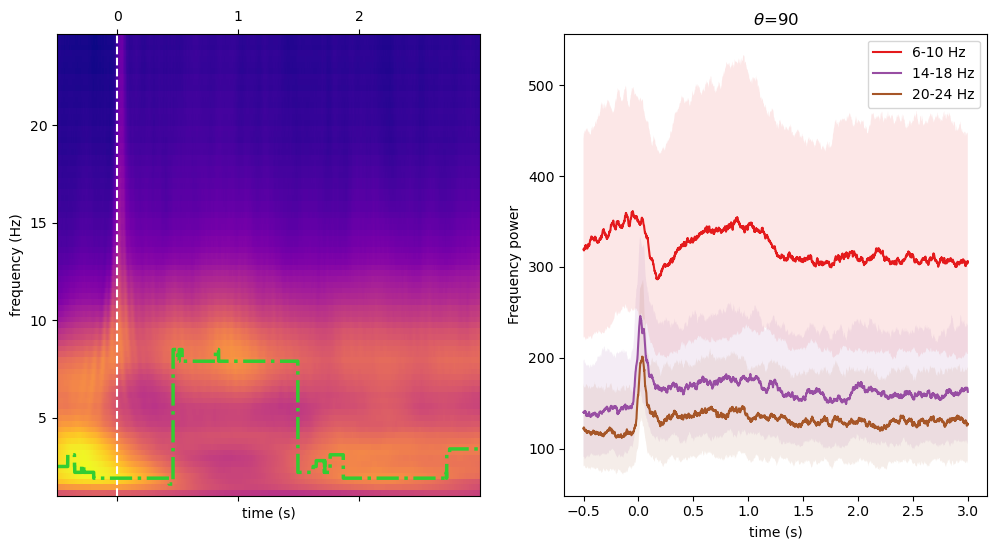

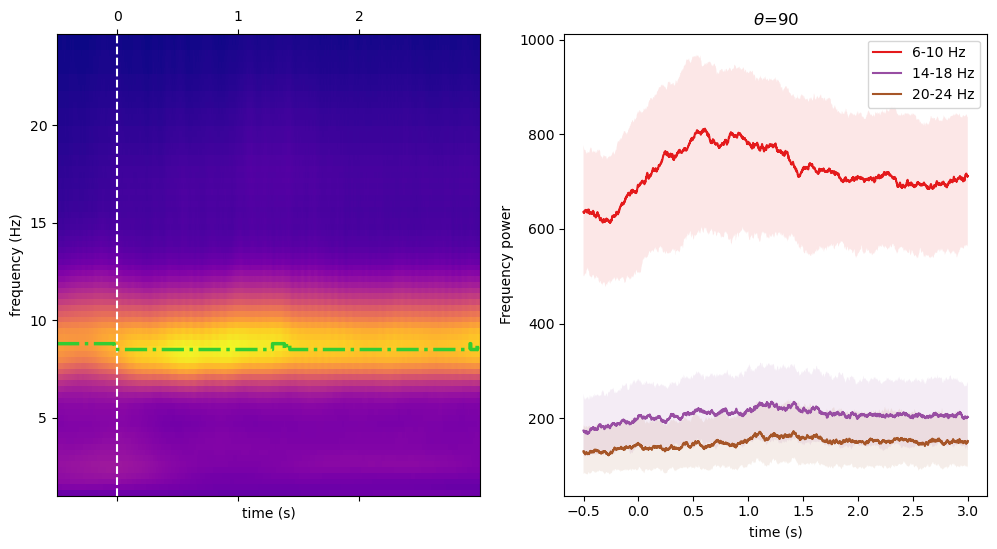

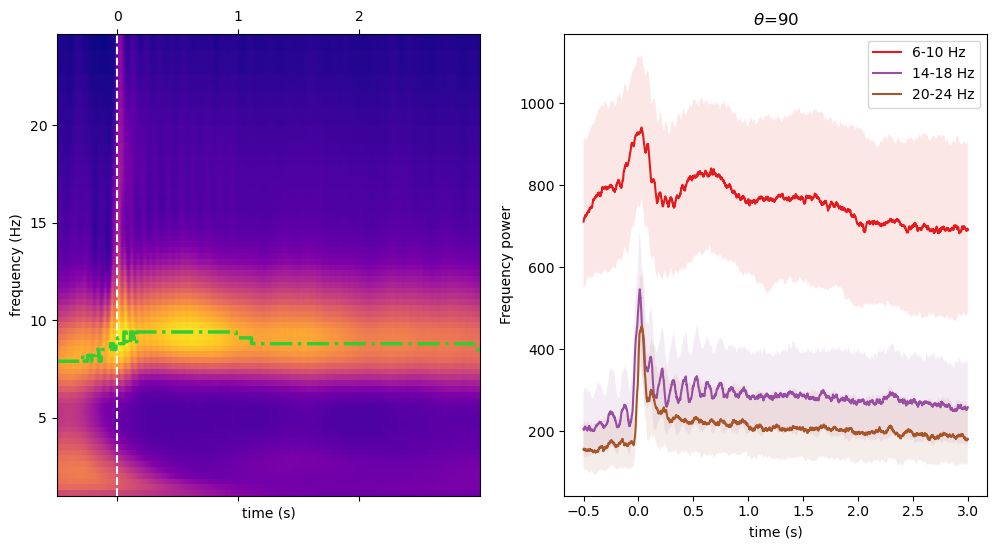

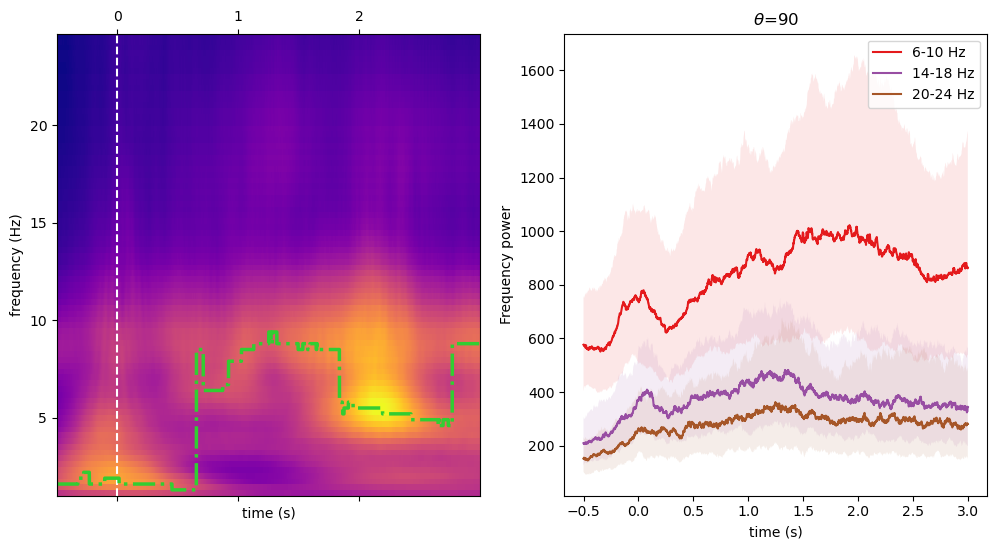

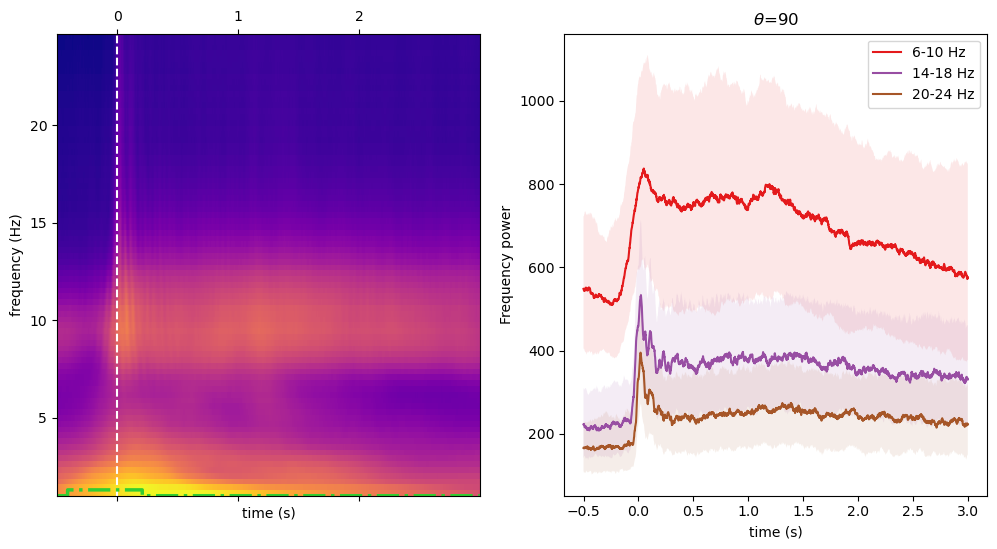

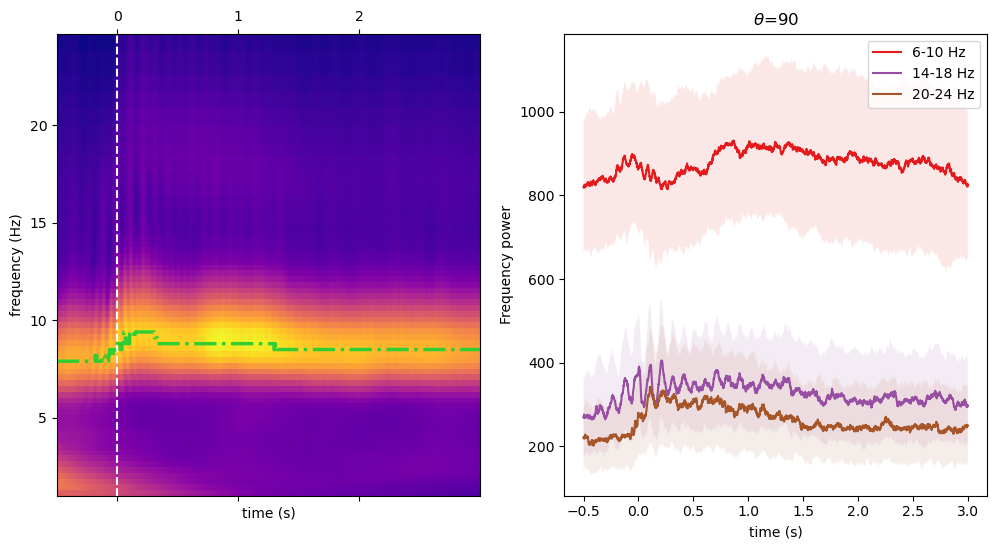

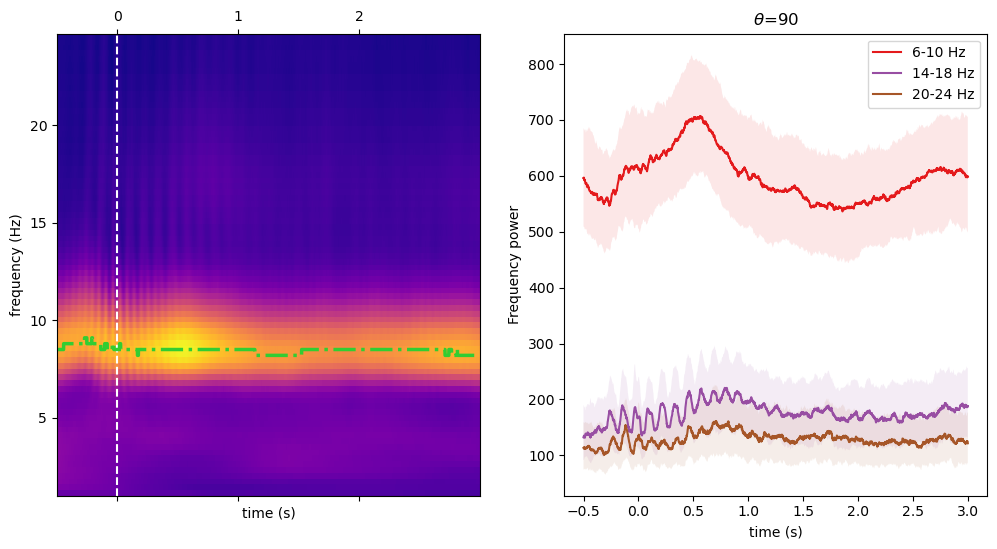

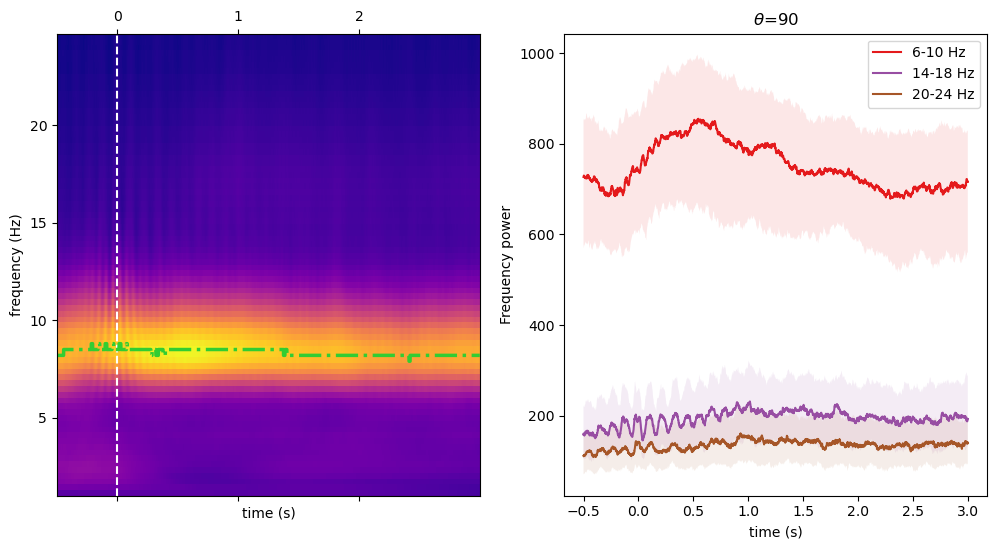

In [4]:
from Style.style_guide import animal_style
from Analysis.utils import bootstrap
frequencies =  np.arange(1,25,.3)
track_type = "wtrack"
phases = [90,]
animals = ['Winnie',"Yoshi", 'Frodo',"Totoro",'Banner','Bilbo',"Wallie",'Olive',]

handles = []
window = (-int(0.5 * 1000), int(500))
window = (-int(0.5 * 1000), int(3000))
norm_window = (-300,0)
# norm_window = (-50,50)
# window = (-1000,2000)
# norm_window = (-200,0)
n_bootstrap = 1000
all_traces = {}

for phase in phases:
    
    handles=[]
    theta_power = []
    fig_traces = plt.figure()
    for i,animal in enumerate(animals):#,]):#
        fig=None
        dataset_key = {"animal":animal,
                    "targeted_phase":phase,
                    "min_pulse_length":22,
                    "laser_power": 77,
                    'track_type':track_type}
        # dataset_key = {'nwb_file_name': 'Winnie20220719_.nwb', 'interval_list_name': 'pos 1 valid times'}
        
        fig, spectrogram, traces = lfp_power_dynamics_pulse_cwt_spectrogram(dataset_key,
                            lfp_trace_window=window,
                            color=plt.cm.magma(i/4),
                            fig = fig,
                            frequencies=frequencies,
                            return_data = True,
                            marks="first_pulse",#"position_control"
                            )
        if not traces:
            continue
        all_traces[animal] = traces
        power = traces[0]
        tp = np.linspace(*window,power.shape[1])
        # normalize by pre-pulse theta power
        ind_norm = np.logical_and(tp>norm_window[0],tp<norm_window[1])
        power_norm = np.nanmean(power[:,ind_norm],axis=1)
        power = power/power_norm[:,None]
        
        color = animal_style.loc[animal]['color']
        if n_bootstrap:
            power = bootstrap(power,n_bootstrap,np.nanmean)
            fig_traces.gca().plot(tp, np.mean(power,axis=0),color=color, label=animal)
            fig_traces.gca().fill_between(tp, np.percentile(power,1,axis=0),
                                        np.percentile(power,99,axis=0),
                                        facecolor=color,alpha=0.3)
   
        else:
            fig_traces.gca().plot(tp, np.nanmedian(power,axis=0),color=color, label=animal)
            fig_traces.gca().fill_between(tp, np.nanpercentile(power,25,axis=0),
                                        np.nanpercentile(power,75,axis=0),
                                        facecolor=color,alpha=0.3)
        # handles.append(mpatches.Patch(color=plt.cm.magma(i/6), label=period))
        if fig is None:
            continue
        fig_traces.gca().set_title(f"{animal}")
        fig_traces.gca().set_xlabel('Time (ms)')
        fig_traces.gca().set_ylabel('Normalized Theta Power')
        fig_traces.gca().legend()
        fig.gca().set_title(f"$\\theta$={phase}")
        # break
    break

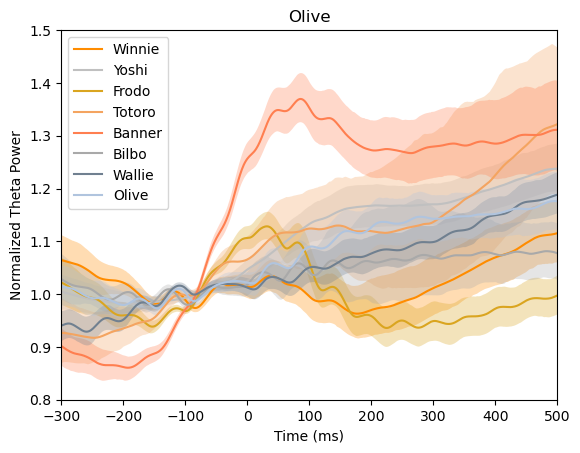

In [12]:
fig_traces.gca().set_xlim(-300,500)
fig_traces.gca().set_ylim(.5,2)
fig_traces.gca().set_ylim(.8,1.5)
fig_traces#.show()

In [6]:
plt.rcParams['svg.fonttype'] = 'none'
fig_traces.savefig(f'./Plots/theta_power_{track_type}_{phase}.svg')

In [4]:
%debug


> /home/sambray/Documents/MS_analysis_samsplaying/Analysis/lfp_analysis.py(98)get_yaml_defined_reference_electrode()
     96     )  # [0]
     97     key["lfp_electrode_group_name"] = targeted_e_group
---> 98     ref_electrode_id = (
     99         LFPElectrodeGroup().LFPElectrode()
    100         & key

{'nwb_file_name': 'Winnie20220717_.nwb', 'target_interval_list_name': 'pos 11 valid times', 'lfp_electrode_group_name': ['tetrode_sample_Winnie']}
--KeyboardInterrupt--

KeyboardInterrupt: Interrupted by user


### Compare within-animal test vs.  control intervals
Defines start time as time when animal 20cm from track port end

datasets: 8
{'nwb_file_name': 'Olive20220711_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[15:23:52][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[15:23:53][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[15:23:53][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 11/11 [00:00<00:00, 20.84it/s]


{'nwb_file_name': 'Olive20220711_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


[15:23:55][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[15:23:56][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[15:23:56][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 23/23 [00:01<00:00, 21.01it/s]


{'nwb_file_name': 'Olive20220711_.nwb', 'target_interval_list_name': 'pos 13 valid times'}


[15:23:59][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[15:23:59][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[15:24:00][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 23/23 [00:01<00:00, 21.03it/s]


{'nwb_file_name': 'Olive20220711_.nwb', 'target_interval_list_name': 'pos 15 valid times'}


[15:24:02][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[15:24:03][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[15:24:03][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 17/17 [00:00<00:00, 21.10it/s]


{'nwb_file_name': 'Olive20220711_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[15:24:05][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[15:24:06][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[15:24:07][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 13/13 [00:00<00:00, 20.75it/s]


{'nwb_file_name': 'Olive20220711_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[15:24:09][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[15:24:10][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[15:24:10][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 20/20 [00:01<00:00, 18.84it/s]


{'nwb_file_name': 'Olive20220711_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[15:24:12][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[15:24:13][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[15:24:14][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 13/13 [00:00<00:00, 19.53it/s]


{'nwb_file_name': 'Olive20220711_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[15:24:16][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[15:24:17][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[15:24:17][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 57/57 [00:02<00:00, 20.25it/s]


datasets: 8
{'nwb_file_name': 'Olive20220711_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[15:24:34][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[15:24:35][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[15:24:35][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 28/28 [00:01<00:00, 21.12it/s]


{'nwb_file_name': 'Olive20220711_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


[15:24:37][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[15:24:37][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[15:24:38][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 37/37 [00:01<00:00, 21.83it/s]


{'nwb_file_name': 'Olive20220711_.nwb', 'target_interval_list_name': 'pos 13 valid times'}


[15:24:40][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[15:24:41][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[15:24:41][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 39/39 [00:01<00:00, 21.35it/s]


{'nwb_file_name': 'Olive20220711_.nwb', 'target_interval_list_name': 'pos 15 valid times'}


[15:24:44][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[15:24:44][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[15:24:45][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 55/55 [00:02<00:00, 20.92it/s]


{'nwb_file_name': 'Olive20220711_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[15:24:48][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[15:24:48][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[15:24:49][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 31/31 [00:01<00:00, 20.78it/s]


{'nwb_file_name': 'Olive20220711_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[15:24:51][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[15:24:51][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[15:24:52][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 64/64 [00:03<00:00, 18.99it/s]


{'nwb_file_name': 'Olive20220711_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[15:24:56][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[15:24:56][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[15:24:57][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 28/28 [00:01<00:00, 19.87it/s]


{'nwb_file_name': 'Olive20220711_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[15:24:59][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[15:24:59][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[15:25:00][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 178/178 [00:09<00:00, 19.76it/s]


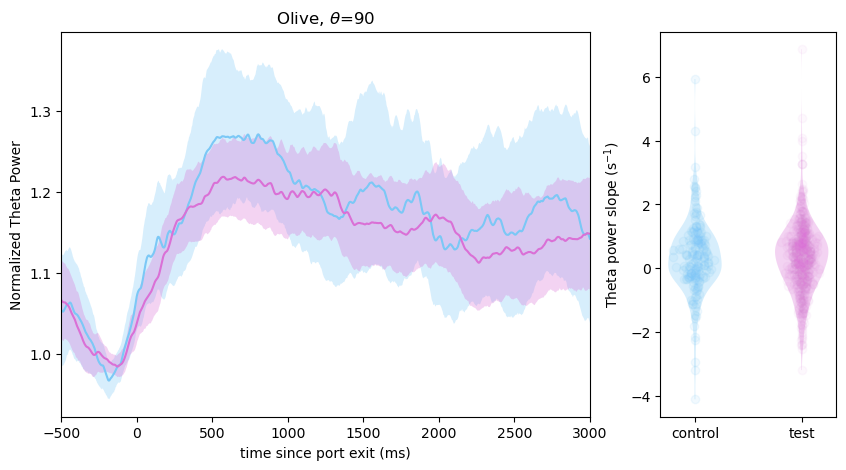

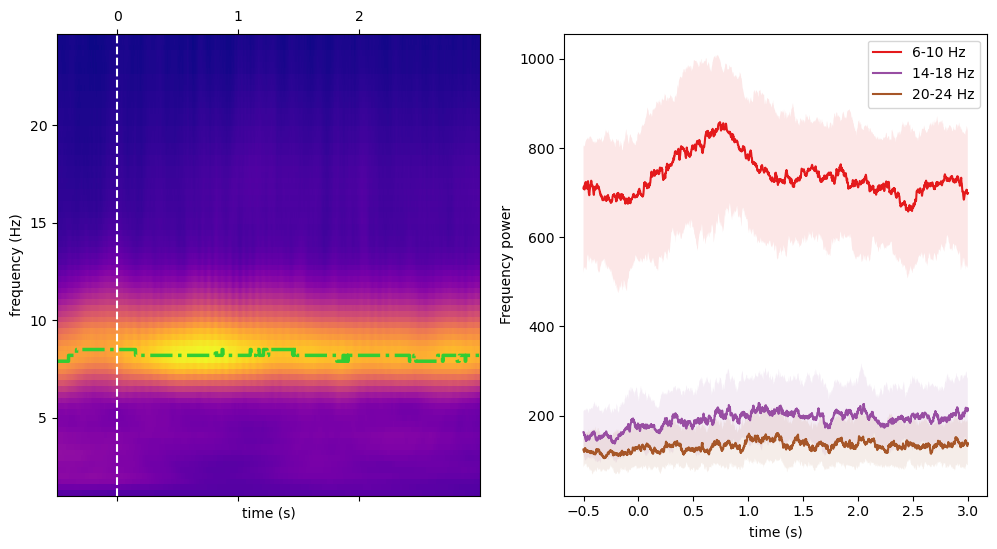

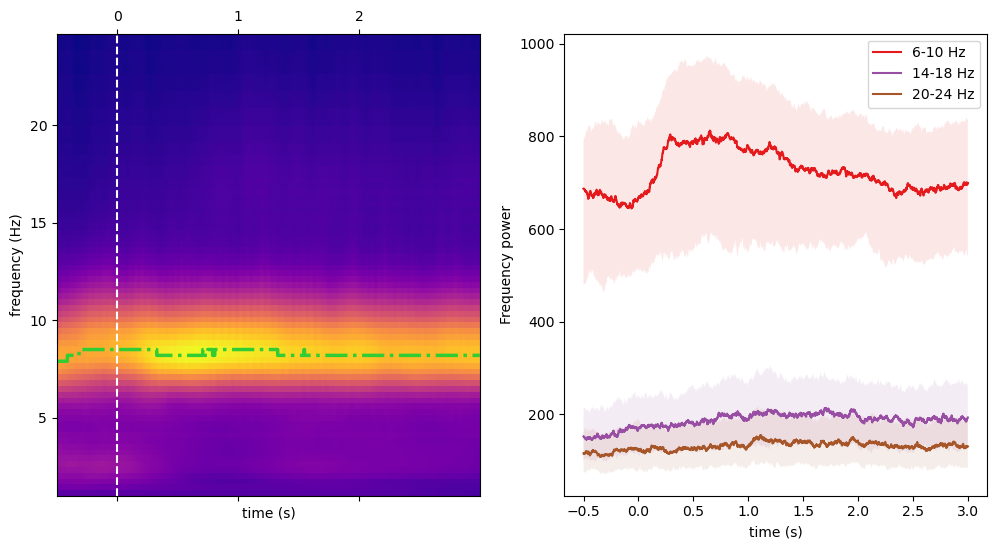

In [18]:
from Style.style_guide import animal_style, interval_style
from Style.style_guide import animal_style
from Analysis.utils import bootstrap, get_slope, violin_scatter
animal = "Olive"#"Wallie"#"Bilbo"#"Yoshi"#"Winnie"#"Totoro"#"Banner"#"Frodo"
phase = 90
window=(-500,3000)
# window = (-300,700)
norm_window = (-300,0)
track_type = "wtrack"


fig_traces, ax_traces = plt.subplots(ncols=2,width_ratios=[3,1],figsize=(10,5))
n_bootstrap = 1000
frequencies =  np.arange(1,25,.3)
slopes = []
for i_tag, tag in enumerate(["control","test",]):
    dataset_key = {"animal":animal,
                "targeted_phase":phase,
                "min_pulse_length":22,
                "laser_power": 77,
                'track_type':track_type}
    # dataset_key = {'nwb_file_name': 'Winnie20220717_.nwb', 
    #                'interval_list_name': 'pos 3 valid times'}#'interval_list_name': 'pos 11 valid times'}
    
    fig, spectrogram, traces = lfp_power_dynamics_pulse_cwt_spectrogram(dataset_key,
                        lfp_trace_window=window,
                        color='none',
                        fig = None,
                        frequencies=frequencies,
                        return_data = True,
                        marks = "position_"+tag,
                        )
    del fig
    if not traces:
        continue
    power = traces[0]
    tp = np.linspace(*window,power.shape[1])
    # normalize by pre-pulse theta power
    ind_norm = np.logical_and(tp>norm_window[0],tp<norm_window[1])
    power_norm = np.nanmean(power[:,ind_norm],axis=1)
    power = power/power_norm[:,None]
    power_trials = power.copy()
    ind_t = np.logical_and(tp>0,tp<500)
    slopes.append(get_slope(power_trials[:,ind_t],tp[ind_t]/1000))
    
    color = interval_style[tag]
    if n_bootstrap:
        power = bootstrap(power,n_bootstrap,np.nanmean)
        ax_traces[0].plot(tp, np.nanmean(power,axis=0),color=color, label=animal)
        ax_traces[0].fill_between(tp, np.nanpercentile(power,1,axis=0),
                                    np.nanpercentile(power,99,axis=0),
                                    facecolor=color,alpha=0.3)

    else:
        ax_traces[0].plot(tp, np.nanmedian(power,axis=0),color=color, label=animal)
        ax_traces[0].fill_between(tp, np.nanpercentile(power,25,axis=0),
                                    np.nanpercentile(power,75,axis=0),
                                    facecolor=color,alpha=0.3)
    
    violin_scatter(slopes[-1],i_tag,ax = ax_traces[1],bw_method=0.3,color=color)
ax_traces[0].set_title(f"{animal}")
ax_traces[0].set_xlabel('time since port exit (ms)')
ax_traces[0].set_ylabel('Normalized Theta Power')
ax_traces[0].set_xlim(*window)
# fig_traces.gca().legend()
ax_traces[0].set_title(f"{animal}, $\\theta$={phase}")
ax_traces[1].set_xticks([0,1],["control","test"])
ax_traces[1].set_ylabel('Theta power slope (s$^{-1}$)')



plt.rcParams['svg.fonttype'] = 'none'
fig_traces.savefig(f'/home/sambray/Pictures/Fig_1/theta_power_{animal}_control_test_{track_type}.svg')

In [11]:
plt.rcParams['svg.fonttype'] = 'none'
fig_traces.savefig(f'/home/sambray/Pictures/Fig_1/theta_power_{animal}_control_test_{track_type}.svg')

In [8]:
%debug


> /home/sambray/Documents/MS_analysis_samsplaying/Analysis/lfp_analysis.py(98)get_yaml_defined_reference_electrode()
     96     )  # [0]
     97     key["lfp_electrode_group_name"] = targeted_e_group
---> 98     ref_electrode_id = (
     99         LFPElectrodeGroup().LFPElectrode()
    100         & key

{'nwb_file_name': 'Frodo20230814_.nwb', 'target_interval_list_name': 'pos 1 valid times', 'lfp_electrode_group_name': ['tetrode_sample_Frodo']}


In [6]:
from spyglass.lfp.v1 import LFPElectrodeGroup
LFPElectrodeGroup().LFPElectrode() & {'nwb_file_name': 'Frodo20230814_.nwb', }

*nwb_file_name *lfp_electrode *electrode_gro *electrode_id 
+------------+ +------------+ +------------+ +------------+
Frodo20230814_ tetrode_sample 11             44            
Frodo20230814_ tetrode_sample 12             48            
Frodo20230814_ tetrode_sample 13             52            
Frodo20230814_ tetrode_sample 15             60            
Frodo20230814_ tetrode_sample 18             72            
Frodo20230814_ tetrode_sample 19             76            
Frodo20230814_ tetrode_sample 20             80            
Frodo20230814_ tetrode_sample 23             92            
Frodo20230814_ tetrode_sample 24             96            
Frodo20230814_ tetrode_sample 25             100           
Frodo20230814_ tetrode_sample 26             104           
Frodo20230814_ tetrode_sample 28             112           
   ...
 (Total: 17)

### Figure of theta decay slopes across animals


datasets: 19
{'nwb_file_name': 'Winnie20220719_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[10:06:09][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:06:10][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:06:10][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 26/26 [00:00<00:00, 28.99it/s]


{'nwb_file_name': 'Winnie20220719_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


[10:06:12][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:06:13][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:06:13][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 7/7 [00:00<00:00, 30.20it/s]


{'nwb_file_name': 'Winnie20220719_.nwb', 'target_interval_list_name': 'pos 13 valid times'}


[10:06:15][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:06:15][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:06:16][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 12/12 [00:00<00:00, 25.66it/s]


{'nwb_file_name': 'Winnie20220719_.nwb', 'target_interval_list_name': 'pos 15 valid times'}


[10:06:17][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:06:18][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:06:19][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 9/9 [00:00<00:00, 29.00it/s]


{'nwb_file_name': 'Winnie20220719_.nwb', 'target_interval_list_name': 'pos 17 valid times'}


[10:06:20][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:06:21][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:06:21][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 16/16 [00:00<00:00, 26.80it/s]


{'nwb_file_name': 'Winnie20220719_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[10:06:23][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:06:23][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:06:24][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 8/8 [00:00<00:00, 30.22it/s]


{'nwb_file_name': 'Winnie20220719_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[10:06:25][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:06:26][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:06:27][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 6/6 [00:00<00:00, 28.88it/s]


{'nwb_file_name': 'Winnie20220719_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[10:06:28][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:06:29][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:06:29][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 21/21 [00:00<00:00, 28.14it/s]


{'nwb_file_name': 'Winnie20220719_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[10:06:31][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:06:32][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:06:32][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 1/1 [00:00<00:00, 26.54it/s]


{'nwb_file_name': 'Winnie20220720_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[10:06:33][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:06:34][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:06:35][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 10/10 [00:00<00:00, 25.46it/s]


{'nwb_file_name': 'Winnie20220720_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


[10:06:36][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:06:37][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:06:37][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 16/16 [00:00<00:00, 26.84it/s]


{'nwb_file_name': 'Winnie20220720_.nwb', 'target_interval_list_name': 'pos 13 valid times'}


[10:06:39][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:06:40][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:06:40][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 17/17 [00:00<00:00, 30.03it/s]


{'nwb_file_name': 'Winnie20220720_.nwb', 'target_interval_list_name': 'pos 15 valid times'}


[10:06:42][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:06:42][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:06:43][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 18/18 [00:00<00:00, 27.90it/s]


{'nwb_file_name': 'Winnie20220720_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[10:06:45][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:06:45][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:06:46][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 15/15 [00:00<00:00, 27.12it/s]


{'nwb_file_name': 'Winnie20220720_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[10:06:47][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:06:48][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:06:49][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 17/17 [00:00<00:00, 29.02it/s]


{'nwb_file_name': 'Winnie20220720_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[10:06:50][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:06:51][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:06:52][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 16/16 [00:00<00:00, 26.76it/s]


{'nwb_file_name': 'Winnie20220720_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[10:06:53][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:06:54][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:06:55][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 17/17 [00:00<00:00, 27.89it/s]


{'nwb_file_name': 'Winnie20220722_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[10:06:56][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:06:57][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:06:58][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 15/15 [00:00<00:00, 25.91it/s]


{'nwb_file_name': 'Winnie20220722_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[10:06:59][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:07:00][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:07:01][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 16/16 [00:00<00:00, 29.24it/s]


datasets: 19
{'nwb_file_name': 'Winnie20220719_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[10:07:04][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:07:04][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:07:05][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 77/77 [00:02<00:00, 29.03it/s]


{'nwb_file_name': 'Winnie20220719_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


[10:07:08][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:07:09][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:07:09][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 17/17 [00:00<00:00, 32.76it/s]


{'nwb_file_name': 'Winnie20220719_.nwb', 'target_interval_list_name': 'pos 13 valid times'}


[10:07:11][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:07:11][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:07:11][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 36/36 [00:01<00:00, 28.68it/s]


{'nwb_file_name': 'Winnie20220719_.nwb', 'target_interval_list_name': 'pos 15 valid times'}


[10:07:13][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:07:14][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:07:14][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 42/42 [00:01<00:00, 29.59it/s]


{'nwb_file_name': 'Winnie20220719_.nwb', 'target_interval_list_name': 'pos 17 valid times'}


[10:07:17][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:07:17][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:07:18][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 50/50 [00:01<00:00, 27.96it/s]


{'nwb_file_name': 'Winnie20220719_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[10:07:20][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:07:21][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:07:21][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 16/16 [00:00<00:00, 31.52it/s]


{'nwb_file_name': 'Winnie20220719_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[10:07:23][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:07:23][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:07:24][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 22/22 [00:00<00:00, 28.46it/s]


{'nwb_file_name': 'Winnie20220719_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[10:07:25][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:07:26][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:07:26][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 46/46 [00:01<00:00, 29.39it/s]


{'nwb_file_name': 'Winnie20220719_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[10:07:29][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:07:29][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:07:30][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 12/12 [00:00<00:00, 26.07it/s]


{'nwb_file_name': 'Winnie20220720_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[10:07:31][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:07:31][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:07:32][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 26/26 [00:00<00:00, 29.92it/s]


{'nwb_file_name': 'Winnie20220720_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


[10:07:33][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:07:34][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:07:34][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 45/45 [00:01<00:00, 27.33it/s]


{'nwb_file_name': 'Winnie20220720_.nwb', 'target_interval_list_name': 'pos 13 valid times'}


[10:07:37][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:07:37][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:07:38][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 46/46 [00:01<00:00, 28.55it/s]


{'nwb_file_name': 'Winnie20220720_.nwb', 'target_interval_list_name': 'pos 15 valid times'}


[10:07:40][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:07:40][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:07:41][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 43/43 [00:01<00:00, 28.58it/s]


{'nwb_file_name': 'Winnie20220720_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[10:07:43][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:07:44][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:07:44][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 41/41 [00:01<00:00, 31.40it/s]


{'nwb_file_name': 'Winnie20220720_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[10:07:46][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:07:47][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:07:47][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 50/50 [00:01<00:00, 30.83it/s]


{'nwb_file_name': 'Winnie20220720_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[10:07:50][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:07:50][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:07:51][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 69/69 [00:02<00:00, 31.06it/s]


{'nwb_file_name': 'Winnie20220720_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[10:07:54][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:07:54][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:07:54][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 44/44 [00:01<00:00, 31.64it/s]


{'nwb_file_name': 'Winnie20220722_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[10:07:57][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:07:57][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:07:58][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 45/45 [00:01<00:00, 29.11it/s]


{'nwb_file_name': 'Winnie20220722_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[10:08:00][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:00][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:01][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 72/72 [00:02<00:00, 29.25it/s]


datasets: 11
{'nwb_file_name': 'Frodo20230814_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[10:08:09][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:09][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:09][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 12/12 [00:00<00:00, 40.92it/s]


{'nwb_file_name': 'Frodo20230814_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


[10:08:11][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:11][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:11][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 15/15 [00:00<00:00, 36.55it/s]


{'nwb_file_name': 'Frodo20230814_.nwb', 'target_interval_list_name': 'pos 13 valid times'}


[10:08:12][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:12][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:13][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 18/18 [00:00<00:00, 30.76it/s]


{'nwb_file_name': 'Frodo20230814_.nwb', 'target_interval_list_name': 'pos 15 valid times'}


[10:08:14][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:15][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:15][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 10/10 [00:00<00:00, 25.38it/s]


{'nwb_file_name': 'Frodo20230814_.nwb', 'target_interval_list_name': 'pos 17 valid times'}


[10:08:16][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:17][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:17][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 15/15 [00:00<00:00, 28.67it/s]


{'nwb_file_name': 'Frodo20230814_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[10:08:19][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:19][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:19][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 4/4 [00:00<00:00, 25.13it/s]


{'nwb_file_name': 'Frodo20230814_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[10:08:21][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:21][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:21][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 11/11 [00:00<00:00, 26.25it/s]


{'nwb_file_name': 'Frodo20230814_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[10:08:23][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:23][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:24][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 16/16 [00:00<00:00, 30.22it/s]


{'nwb_file_name': 'Frodo20230814_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[10:08:25][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:26][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:26][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 13/13 [00:00<00:00, 30.18it/s]


{'nwb_file_name': 'Frodo20230815_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[10:08:27][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:28][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:28][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 31/31 [00:00<00:00, 34.08it/s]


{'nwb_file_name': 'Frodo20230815_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[10:08:30][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:30][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:31][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 21/21 [00:00<00:00, 38.99it/s]


datasets: 11
{'nwb_file_name': 'Frodo20230814_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[10:08:33][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:33][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:34][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 42/42 [00:01<00:00, 41.87it/s]


{'nwb_file_name': 'Frodo20230814_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


[10:08:35][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:36][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:36][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 58/58 [00:01<00:00, 35.12it/s]


{'nwb_file_name': 'Frodo20230814_.nwb', 'target_interval_list_name': 'pos 13 valid times'}


[10:08:38][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:39][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:39][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 65/65 [00:01<00:00, 34.47it/s]


{'nwb_file_name': 'Frodo20230814_.nwb', 'target_interval_list_name': 'pos 15 valid times'}


[10:08:42][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:42][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:42][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 45/45 [00:01<00:00, 34.04it/s]


{'nwb_file_name': 'Frodo20230814_.nwb', 'target_interval_list_name': 'pos 17 valid times'}


[10:08:44][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:45][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:45][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 51/51 [00:01<00:00, 35.35it/s]


{'nwb_file_name': 'Frodo20230814_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[10:08:47][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:47][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:48][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 37/37 [00:00<00:00, 37.67it/s]


{'nwb_file_name': 'Frodo20230814_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[10:08:49][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:50][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:50][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 52/52 [00:01<00:00, 33.18it/s]


{'nwb_file_name': 'Frodo20230814_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[10:08:52][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:52][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:53][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 55/55 [00:01<00:00, 33.22it/s]


{'nwb_file_name': 'Frodo20230814_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[10:08:55][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:55][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:56][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 48/48 [00:01<00:00, 33.26it/s]


{'nwb_file_name': 'Frodo20230815_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[10:08:58][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:58][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:08:59][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 53/53 [00:01<00:00, 40.10it/s]


{'nwb_file_name': 'Frodo20230815_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[10:09:01][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:09:01][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:09:01][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 65/65 [00:01<00:00, 40.90it/s]


datasets: 10
{'nwb_file_name': 'Totoro20220613_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[10:09:07][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:09:07][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:09:08][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 5/5 [00:00<00:00, 38.48it/s]


{'nwb_file_name': 'Totoro20220613_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[10:09:09][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:09:10][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:09:10][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 12/12 [00:00<00:00, 34.27it/s]


{'nwb_file_name': 'Totoro20220614_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[10:09:12][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:09:13][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:09:13][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 14/14 [00:00<00:00, 29.61it/s]


{'nwb_file_name': 'Totoro20220614_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


[10:09:15][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:09:16][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:09:16][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 20/20 [00:00<00:00, 30.86it/s]


{'nwb_file_name': 'Totoro20220614_.nwb', 'target_interval_list_name': 'pos 13 valid times'}


[10:09:18][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:09:19][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:09:19][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 17/17 [00:00<00:00, 31.28it/s]


{'nwb_file_name': 'Totoro20220614_.nwb', 'target_interval_list_name': 'pos 15 valid times'}


[10:09:21][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:09:22][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:09:22][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 17/17 [00:00<00:00, 31.95it/s]


{'nwb_file_name': 'Totoro20220614_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[10:09:24][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:09:24][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:09:25][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 16/16 [00:00<00:00, 27.50it/s]


{'nwb_file_name': 'Totoro20220614_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[10:09:27][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:09:27][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:09:28][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 17/17 [00:00<00:00, 31.38it/s]


{'nwb_file_name': 'Totoro20220614_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[10:09:30][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:09:30][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:09:31][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 18/18 [00:00<00:00, 31.56it/s]


{'nwb_file_name': 'Totoro20220614_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[10:09:32][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:09:33][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:09:34][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 20/20 [00:00<00:00, 31.51it/s]


datasets: 10
{'nwb_file_name': 'Totoro20220613_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[10:09:36][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:09:36][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:09:37][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 16/16 [00:00<00:00, 49.02it/s]


{'nwb_file_name': 'Totoro20220613_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[10:09:38][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:09:39][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:09:39][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 24/24 [00:00<00:00, 42.74it/s]


{'nwb_file_name': 'Totoro20220614_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[10:09:40][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:09:41][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:09:42][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 39/39 [00:01<00:00, 32.07it/s]


{'nwb_file_name': 'Totoro20220614_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


[10:09:44][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:09:44][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:09:45][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 57/57 [00:01<00:00, 30.82it/s]


{'nwb_file_name': 'Totoro20220614_.nwb', 'target_interval_list_name': 'pos 13 valid times'}


[10:09:48][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:09:48][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:09:48][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 50/50 [00:01<00:00, 30.36it/s]


{'nwb_file_name': 'Totoro20220614_.nwb', 'target_interval_list_name': 'pos 15 valid times'}


[10:09:51][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:09:51][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:09:52][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 50/50 [00:01<00:00, 29.29it/s]


{'nwb_file_name': 'Totoro20220614_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[10:09:54][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:09:55][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:09:55][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 54/54 [00:01<00:00, 30.61it/s]


{'nwb_file_name': 'Totoro20220614_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[10:09:58][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:09:58][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:09:59][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 56/56 [00:01<00:00, 30.34it/s]


{'nwb_file_name': 'Totoro20220614_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[10:10:01][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:10:02][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:10:02][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 56/56 [00:02<00:00, 27.91it/s]


{'nwb_file_name': 'Totoro20220614_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[10:10:05][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:10:06][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:10:06][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 57/57 [00:02<00:00, 27.19it/s]


datasets: 16
{'nwb_file_name': 'Banner20220224_.nwb', 'target_interval_list_name': 'pos 0 valid times'}


[10:10:12][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:10:12][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:10:13][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 12/12 [00:00<00:00, 28.94it/s]


{'nwb_file_name': 'Banner20220224_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[10:10:14][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:10:15][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:10:15][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 10/10 [00:00<00:00, 29.00it/s]


{'nwb_file_name': 'Banner20220224_.nwb', 'target_interval_list_name': 'pos 2 valid times'}


[10:10:16][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:10:17][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:10:17][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 11/11 [00:00<00:00, 28.12it/s]


{'nwb_file_name': 'Banner20220224_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[10:10:18][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:10:19][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:10:19][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 19/19 [00:00<00:00, 31.12it/s]


{'nwb_file_name': 'Banner20220224_.nwb', 'target_interval_list_name': 'pos 4 valid times'}


[10:10:21][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:10:21][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:10:22][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 19/19 [00:00<00:00, 27.99it/s]


{'nwb_file_name': 'Banner20220224_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[10:10:23][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:10:24][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:10:25][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 21/21 [00:00<00:00, 29.78it/s]


{'nwb_file_name': 'Banner20220224_.nwb', 'target_interval_list_name': 'pos 6 valid times'}


[10:10:26][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:10:27][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:10:28][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 18/18 [00:00<00:00, 25.49it/s]


{'nwb_file_name': 'Banner20220224_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[10:10:29][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:10:30][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:10:30][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 17/17 [00:00<00:00, 31.78it/s]


{'nwb_file_name': 'Banner20220225_.nwb', 'target_interval_list_name': 'pos 0 valid times'}


[10:10:31][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:10:32][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:10:32][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 19/19 [00:00<00:00, 26.57it/s]


{'nwb_file_name': 'Banner20220225_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[10:10:34][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:10:34][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:10:35][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 23/23 [00:00<00:00, 27.49it/s]


{'nwb_file_name': 'Banner20220225_.nwb', 'target_interval_list_name': 'pos 2 valid times'}


[10:10:37][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:10:37][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:10:38][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 21/21 [00:00<00:00, 25.94it/s]


{'nwb_file_name': 'Banner20220225_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[10:10:39][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:10:40][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:10:40][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 17/17 [00:00<00:00, 28.75it/s]


{'nwb_file_name': 'Banner20220225_.nwb', 'target_interval_list_name': 'pos 4 valid times'}


[10:10:42][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:10:42][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:10:43][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 21/21 [00:00<00:00, 24.80it/s]


{'nwb_file_name': 'Banner20220225_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[10:10:45][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:10:46][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:10:46][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 21/21 [00:00<00:00, 29.61it/s]


{'nwb_file_name': 'Banner20220225_.nwb', 'target_interval_list_name': 'pos 6 valid times'}


[10:10:48][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:10:49][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:10:49][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 22/22 [00:00<00:00, 26.87it/s]


{'nwb_file_name': 'Banner20220225_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[10:10:51][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:10:52][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:10:53][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 13/13 [00:00<00:00, 28.13it/s]


datasets: 16
{'nwb_file_name': 'Banner20220224_.nwb', 'target_interval_list_name': 'pos 0 valid times'}


[10:10:59][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:10:59][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:10:59][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 41/41 [00:01<00:00, 27.64it/s]


{'nwb_file_name': 'Banner20220224_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[10:11:02][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:11:02][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:11:03][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 23/23 [00:00<00:00, 29.53it/s]


{'nwb_file_name': 'Banner20220224_.nwb', 'target_interval_list_name': 'pos 2 valid times'}


[10:11:04][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:11:05][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:11:05][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 41/41 [00:01<00:00, 26.71it/s]


{'nwb_file_name': 'Banner20220224_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[10:11:08][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:11:08][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:11:08][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 52/52 [00:01<00:00, 28.59it/s]


{'nwb_file_name': 'Banner20220224_.nwb', 'target_interval_list_name': 'pos 4 valid times'}


[10:11:11][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:11:11][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:11:12][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 58/58 [00:02<00:00, 27.95it/s]


{'nwb_file_name': 'Banner20220224_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[10:11:15][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:11:15][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:11:16][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 63/63 [00:02<00:00, 28.10it/s]


{'nwb_file_name': 'Banner20220224_.nwb', 'target_interval_list_name': 'pos 6 valid times'}


[10:11:19][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:11:19][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:11:20][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 61/61 [00:02<00:00, 28.64it/s]


{'nwb_file_name': 'Banner20220224_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[10:11:23][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:11:23][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:11:24][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 54/54 [00:01<00:00, 27.22it/s]


{'nwb_file_name': 'Banner20220225_.nwb', 'target_interval_list_name': 'pos 0 valid times'}


[10:11:26][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:11:27][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:11:27][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 60/60 [00:02<00:00, 27.69it/s]


{'nwb_file_name': 'Banner20220225_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[10:11:30][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:11:31][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:11:31][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 60/60 [00:02<00:00, 26.83it/s]


{'nwb_file_name': 'Banner20220225_.nwb', 'target_interval_list_name': 'pos 2 valid times'}


[10:11:34][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:11:35][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:11:35][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 51/51 [00:01<00:00, 28.26it/s]


{'nwb_file_name': 'Banner20220225_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[10:11:38][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:11:38][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:11:39][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 49/49 [00:01<00:00, 28.09it/s]


{'nwb_file_name': 'Banner20220225_.nwb', 'target_interval_list_name': 'pos 4 valid times'}


[10:11:41][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:11:42][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:11:42][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 55/55 [00:02<00:00, 26.04it/s]


{'nwb_file_name': 'Banner20220225_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[10:11:45][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:11:46][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:11:46][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 52/52 [00:01<00:00, 28.24it/s]


{'nwb_file_name': 'Banner20220225_.nwb', 'target_interval_list_name': 'pos 6 valid times'}


[10:11:49][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:11:49][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:11:50][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 43/43 [00:01<00:00, 27.52it/s]


{'nwb_file_name': 'Banner20220225_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[10:11:52][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:11:52][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:11:53][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 30/30 [00:01<00:00, 25.47it/s]


datasets: 8
{'nwb_file_name': 'Bilbo20230802_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[10:11:59][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:12:00][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:12:00][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 30/30 [00:01<00:00, 25.97it/s]


{'nwb_file_name': 'Bilbo20230802_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


[10:12:02][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:12:03][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:12:03][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 25/25 [00:00<00:00, 28.81it/s]


{'nwb_file_name': 'Bilbo20230802_.nwb', 'target_interval_list_name': 'pos 13 valid times'}


[10:12:05][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:12:05][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:12:06][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 27/27 [00:00<00:00, 29.54it/s]


{'nwb_file_name': 'Bilbo20230802_.nwb', 'target_interval_list_name': 'pos 15 valid times'}


[10:12:07][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:12:08][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:12:08][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 46/46 [00:01<00:00, 27.85it/s]


{'nwb_file_name': 'Bilbo20230802_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[10:12:11][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:12:11][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:12:12][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 26/26 [00:00<00:00, 30.19it/s]


{'nwb_file_name': 'Bilbo20230802_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[10:12:13][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:12:14][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:12:14][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 9/9 [00:00<00:00, 27.79it/s]


{'nwb_file_name': 'Bilbo20230802_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[10:12:15][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:12:16][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:12:16][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 20/20 [00:00<00:00, 28.47it/s]


{'nwb_file_name': 'Bilbo20230802_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[10:12:18][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:12:18][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:12:19][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 26/26 [00:00<00:00, 28.53it/s]


datasets: 8
{'nwb_file_name': 'Bilbo20230802_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[10:12:22][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:12:22][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:12:22][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 37/37 [00:01<00:00, 30.44it/s]


{'nwb_file_name': 'Bilbo20230802_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


[10:12:24][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:12:25][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:12:25][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 57/57 [00:01<00:00, 29.26it/s]


{'nwb_file_name': 'Bilbo20230802_.nwb', 'target_interval_list_name': 'pos 13 valid times'}


[10:12:28][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:12:28][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:12:28][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 56/56 [00:01<00:00, 29.83it/s]


{'nwb_file_name': 'Bilbo20230802_.nwb', 'target_interval_list_name': 'pos 15 valid times'}


[10:12:31][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:12:31][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:12:32][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 72/72 [00:02<00:00, 29.74it/s]


{'nwb_file_name': 'Bilbo20230802_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[10:12:35][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:12:35][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:12:36][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 85/85 [00:03<00:00, 28.02it/s]


{'nwb_file_name': 'Bilbo20230802_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[10:12:39][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:12:40][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:12:40][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 34/34 [00:01<00:00, 30.49it/s]


{'nwb_file_name': 'Bilbo20230802_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[10:12:42][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:12:42][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:12:43][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 59/59 [00:02<00:00, 26.63it/s]


{'nwb_file_name': 'Bilbo20230802_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[10:12:46][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:12:46][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:12:46][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 47/47 [00:01<00:00, 29.63it/s]


datasets: 10
{'nwb_file_name': 'Wallie20220922_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[10:12:51][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:12:52][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:12:52][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 10/10 [00:00<00:00, 25.81it/s]


{'nwb_file_name': 'Wallie20220922_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


[10:12:54][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:12:55][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:12:55][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 31/31 [00:01<00:00, 28.93it/s]


{'nwb_file_name': 'Wallie20220922_.nwb', 'target_interval_list_name': 'pos 13 valid times'}


[10:12:57][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:12:58][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:12:59][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 19/19 [00:00<00:00, 28.88it/s]


{'nwb_file_name': 'Wallie20220922_.nwb', 'target_interval_list_name': 'pos 15 valid times'}


[10:13:01][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:13:01][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:13:02][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 21/21 [00:00<00:00, 26.87it/s]


{'nwb_file_name': 'Wallie20220922_.nwb', 'target_interval_list_name': 'pos 17 valid times'}


[10:13:04][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:13:05][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:13:05][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 19/19 [00:00<00:00, 26.81it/s]


{'nwb_file_name': 'Wallie20220922_.nwb', 'target_interval_list_name': 'pos 19 valid times'}


[10:13:07][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:13:08][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:13:08][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 20/20 [00:00<00:00, 30.02it/s]


{'nwb_file_name': 'Wallie20220922_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[10:13:10][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:13:11][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:13:12][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 26/26 [00:00<00:00, 29.29it/s]


{'nwb_file_name': 'Wallie20220922_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[10:13:13][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:13:14][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:13:15][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 25/25 [00:00<00:00, 29.17it/s]


{'nwb_file_name': 'Wallie20220922_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[10:13:17][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:13:17][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:13:18][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 34/34 [00:01<00:00, 29.23it/s]


{'nwb_file_name': 'Wallie20220922_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[10:13:20][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:13:21][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:13:22][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 26/26 [00:00<00:00, 29.27it/s]


datasets: 10
{'nwb_file_name': 'Wallie20220922_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[10:13:25][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:13:25][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:13:26][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 35/35 [00:01<00:00, 29.28it/s]


{'nwb_file_name': 'Wallie20220922_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


[10:13:28][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:13:28][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:13:29][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 51/51 [00:01<00:00, 29.87it/s]


{'nwb_file_name': 'Wallie20220922_.nwb', 'target_interval_list_name': 'pos 13 valid times'}


[10:13:31][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:13:32][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:13:32][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 53/53 [00:01<00:00, 29.35it/s]


{'nwb_file_name': 'Wallie20220922_.nwb', 'target_interval_list_name': 'pos 15 valid times'}


[10:13:35][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:13:35][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:13:36][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 43/43 [00:01<00:00, 29.25it/s]


{'nwb_file_name': 'Wallie20220922_.nwb', 'target_interval_list_name': 'pos 17 valid times'}


[10:13:38][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:13:38][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:13:39][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 42/42 [00:01<00:00, 29.29it/s]


{'nwb_file_name': 'Wallie20220922_.nwb', 'target_interval_list_name': 'pos 19 valid times'}


[10:13:41][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:13:42][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:13:42][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 42/42 [00:01<00:00, 28.70it/s]


{'nwb_file_name': 'Wallie20220922_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[10:13:44][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:13:45][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:13:45][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 51/51 [00:01<00:00, 29.11it/s]


{'nwb_file_name': 'Wallie20220922_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[10:13:48][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:13:48][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:13:49][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 59/59 [00:02<00:00, 29.39it/s]


{'nwb_file_name': 'Wallie20220922_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[10:13:52][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:13:52][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:13:53][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 85/85 [00:02<00:00, 29.08it/s]


{'nwb_file_name': 'Wallie20220922_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[10:13:56][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:13:57][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:13:57][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 57/57 [00:01<00:00, 29.19it/s]


datasets: 8
{'nwb_file_name': 'Olive20220711_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[10:14:03][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:14:04][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:14:04][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 11/11 [00:00<00:00, 26.74it/s]


{'nwb_file_name': 'Olive20220711_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


[10:14:06][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:14:06][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:14:07][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 23/23 [00:00<00:00, 27.24it/s]


{'nwb_file_name': 'Olive20220711_.nwb', 'target_interval_list_name': 'pos 13 valid times'}


[10:14:09][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:14:09][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:14:10][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 23/23 [00:00<00:00, 27.49it/s]


{'nwb_file_name': 'Olive20220711_.nwb', 'target_interval_list_name': 'pos 15 valid times'}


[10:14:12][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:14:12][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:14:13][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 17/17 [00:00<00:00, 27.24it/s]


{'nwb_file_name': 'Olive20220711_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[10:14:14][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:14:15][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:14:16][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 13/13 [00:00<00:00, 25.78it/s]


{'nwb_file_name': 'Olive20220711_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[10:14:17][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:14:18][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:14:18][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 20/20 [00:00<00:00, 27.00it/s]


{'nwb_file_name': 'Olive20220711_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[10:14:20][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:14:21][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:14:21][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 13/13 [00:00<00:00, 26.38it/s]


{'nwb_file_name': 'Olive20220711_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[10:14:23][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:14:24][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:14:24][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 57/57 [00:01<00:00, 30.28it/s]


datasets: 8
{'nwb_file_name': 'Olive20220711_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[10:14:28][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:14:28][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:14:29][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 28/28 [00:00<00:00, 29.57it/s]


{'nwb_file_name': 'Olive20220711_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


[10:14:30][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:14:31][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:14:31][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 37/37 [00:01<00:00, 30.03it/s]


{'nwb_file_name': 'Olive20220711_.nwb', 'target_interval_list_name': 'pos 13 valid times'}


[10:14:33][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:14:34][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:14:34][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 39/39 [00:01<00:00, 29.68it/s]


{'nwb_file_name': 'Olive20220711_.nwb', 'target_interval_list_name': 'pos 15 valid times'}


[10:14:36][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:14:36][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:14:37][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 55/55 [00:01<00:00, 29.24it/s]


{'nwb_file_name': 'Olive20220711_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[10:14:40][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:14:40][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:14:40][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 31/31 [00:01<00:00, 30.57it/s]


{'nwb_file_name': 'Olive20220711_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[10:14:42][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:14:43][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:14:43][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 64/64 [00:02<00:00, 29.68it/s]


{'nwb_file_name': 'Olive20220711_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[10:14:46][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:14:46][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:14:47][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 28/28 [00:00<00:00, 29.28it/s]


{'nwb_file_name': 'Olive20220711_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[10:14:49][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:14:49][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:14:49][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 178/178 [00:05<00:00, 30.07it/s]


datasets: 16
{'nwb_file_name': 'Yoshi20220517_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[10:15:00][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:00][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:01][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 11/11 [00:00<00:00, 30.40it/s]


{'nwb_file_name': 'Yoshi20220517_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


[10:15:02][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:03][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:04][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 43/43 [00:01<00:00, 29.82it/s]


{'nwb_file_name': 'Yoshi20220517_.nwb', 'target_interval_list_name': 'pos 13 valid times'}


[10:15:06][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:07][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:07][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 23/23 [00:00<00:00, 27.09it/s]


{'nwb_file_name': 'Yoshi20220517_.nwb', 'target_interval_list_name': 'pos 15 valid times'}


[10:15:09][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:10][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:10][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 16/16 [00:00<00:00, 24.64it/s]


{'nwb_file_name': 'Yoshi20220517_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[10:15:12][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:12][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:13][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 6/6 [00:00<00:00, 26.13it/s]


{'nwb_file_name': 'Yoshi20220517_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[10:15:14][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:14][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:15][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 11/11 [00:00<00:00, 25.15it/s]


{'nwb_file_name': 'Yoshi20220517_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[10:15:16][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:16][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:17][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 10/10 [00:00<00:00, 24.85it/s]


{'nwb_file_name': 'Yoshi20220517_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[10:15:18][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:18][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:19][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 44/44 [00:01<00:00, 29.88it/s]


{'nwb_file_name': 'Yoshi20220518_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[10:15:21][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:22][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:22][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 9/9 [00:00<00:00, 29.26it/s]


{'nwb_file_name': 'Yoshi20220518_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


[10:15:23][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:24][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:24][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 19/19 [00:00<00:00, 25.59it/s]


{'nwb_file_name': 'Yoshi20220518_.nwb', 'target_interval_list_name': 'pos 13 valid times'}


[10:15:26][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:26][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:27][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 15/15 [00:00<00:00, 28.45it/s]


{'nwb_file_name': 'Yoshi20220518_.nwb', 'target_interval_list_name': 'pos 15 valid times'}


[10:15:28][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:28][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:29][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 2/2 [00:00<00:00, 25.46it/s]


{'nwb_file_name': 'Yoshi20220518_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[10:15:30][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:30][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:31][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 15/15 [00:00<00:00, 28.18it/s]


{'nwb_file_name': 'Yoshi20220518_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[10:15:32][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:32][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:33][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 16/16 [00:00<00:00, 27.97it/s]


{'nwb_file_name': 'Yoshi20220518_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[10:15:34][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:35][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:35][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 21/21 [00:00<00:00, 29.58it/s]


{'nwb_file_name': 'Yoshi20220518_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[10:15:37][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:37][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:38][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 19/19 [00:00<00:00, 26.77it/s]


datasets: 16
{'nwb_file_name': 'Yoshi20220517_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[10:15:41][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:41][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:42][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 25/25 [00:00<00:00, 30.58it/s]


{'nwb_file_name': 'Yoshi20220517_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


[10:15:43][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:43][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:44][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 139/139 [00:04<00:00, 28.44it/s]


{'nwb_file_name': 'Yoshi20220517_.nwb', 'target_interval_list_name': 'pos 13 valid times'}


[10:15:50][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:50][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:51][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 49/49 [00:01<00:00, 29.25it/s]


{'nwb_file_name': 'Yoshi20220517_.nwb', 'target_interval_list_name': 'pos 15 valid times'}


[10:15:53][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:54][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:54][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 48/48 [00:01<00:00, 28.82it/s]


{'nwb_file_name': 'Yoshi20220517_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[10:15:57][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:57][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:15:58][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 29/29 [00:00<00:00, 29.62it/s]


{'nwb_file_name': 'Yoshi20220517_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[10:16:00][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:16:00][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:16:00][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 22/22 [00:00<00:00, 27.80it/s]


{'nwb_file_name': 'Yoshi20220517_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[10:16:02][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:16:02][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:16:03][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 32/32 [00:01<00:00, 30.09it/s]


{'nwb_file_name': 'Yoshi20220517_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[10:16:05][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:16:05][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:16:06][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 130/130 [00:04<00:00, 29.68it/s]


{'nwb_file_name': 'Yoshi20220518_.nwb', 'target_interval_list_name': 'pos 1 valid times'}


[10:16:11][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:16:11][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:16:12][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 26/26 [00:00<00:00, 30.06it/s]


{'nwb_file_name': 'Yoshi20220518_.nwb', 'target_interval_list_name': 'pos 11 valid times'}


[10:16:14][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:16:14][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:16:14][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 48/48 [00:01<00:00, 30.21it/s]


{'nwb_file_name': 'Yoshi20220518_.nwb', 'target_interval_list_name': 'pos 13 valid times'}


[10:16:17][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:16:17][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:16:18][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 58/58 [00:01<00:00, 29.55it/s]


{'nwb_file_name': 'Yoshi20220518_.nwb', 'target_interval_list_name': 'pos 15 valid times'}


[10:16:20][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:16:21][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:16:21][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 13/13 [00:00<00:00, 27.58it/s]


{'nwb_file_name': 'Yoshi20220518_.nwb', 'target_interval_list_name': 'pos 3 valid times'}


[10:16:23][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:16:23][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:16:23][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 32/32 [00:01<00:00, 30.31it/s]


{'nwb_file_name': 'Yoshi20220518_.nwb', 'target_interval_list_name': 'pos 5 valid times'}


[10:16:25][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:16:26][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:16:26][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 40/40 [00:01<00:00, 28.24it/s]


{'nwb_file_name': 'Yoshi20220518_.nwb', 'target_interval_list_name': 'pos 7 valid times'}


[10:16:29][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:16:29][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:16:30][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 34/34 [00:01<00:00, 29.64it/s]


{'nwb_file_name': 'Yoshi20220518_.nwb', 'target_interval_list_name': 'pos 9 valid times'}


[10:16:32][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_merge`.`l_f_p_output`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:16:32][WARNING] Spyglass: Multiple classes found in stack: {'`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`', '`lfp_v1`.`__l_f_p_v1`'}. Please submit a bug report with the snippet used.
[10:16:32][WARNING] Spyglass: Multiple classes found in stack: {'`position_linearization_v1`.`__linearized_position_v1`', '`lfp_electrode`.`l_f_p_electrode_group__l_f_p_electrode`'}. Please submit a bug report with the snippet used.
100%|██████████| 34/34 [00:01<00:00, 28.27it/s]


p-value 3.6345958007953478e-06
p-value 0.00011419395948452132
p-value 0.17127626051734593
p-value 1.6146601378175767e-05
p-value 0.0362132071179652
p-value 0.7264679557314018
p-value 0.44721652959584857
p-value 0.23876294974511747


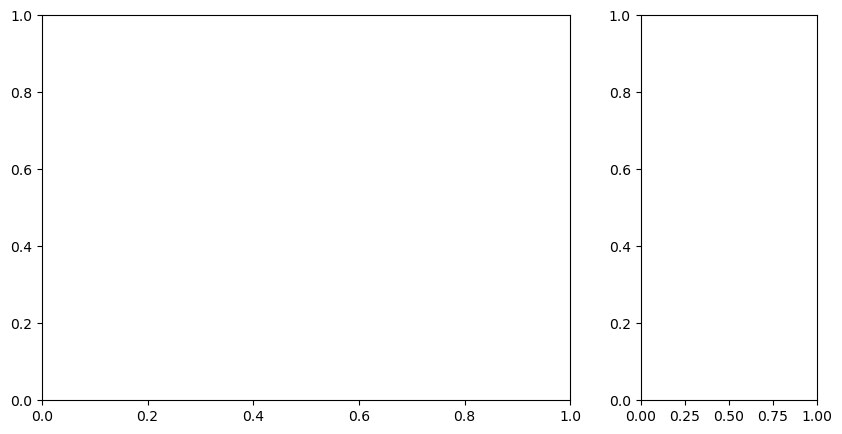

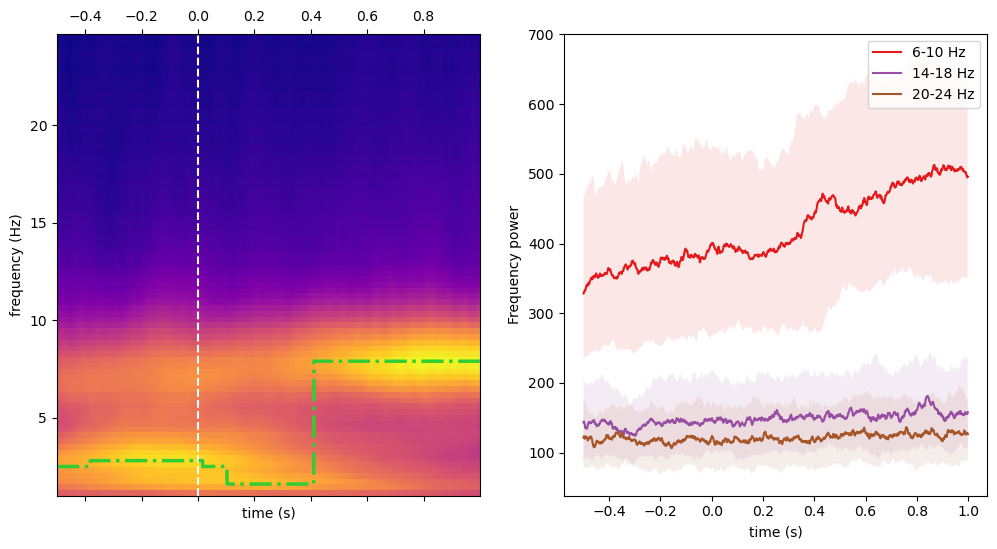

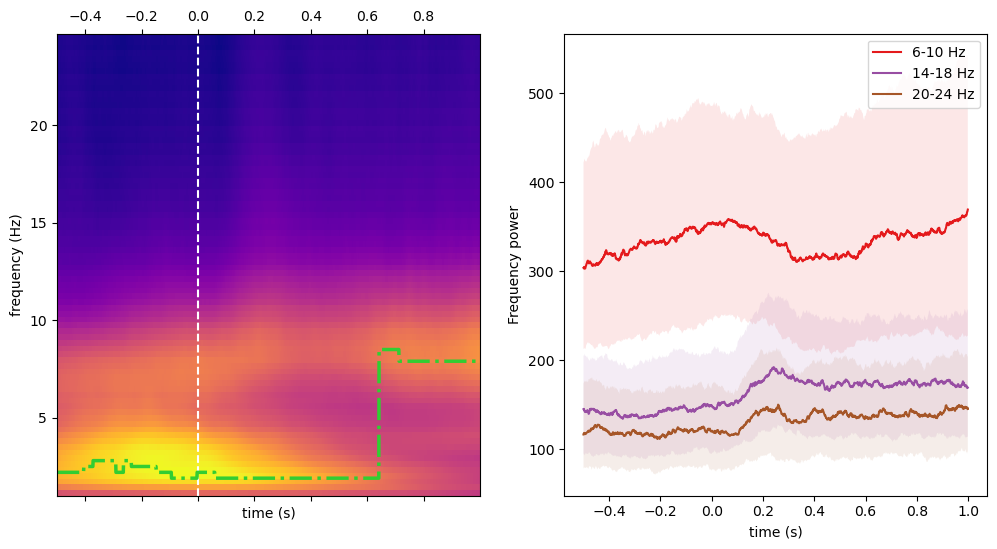

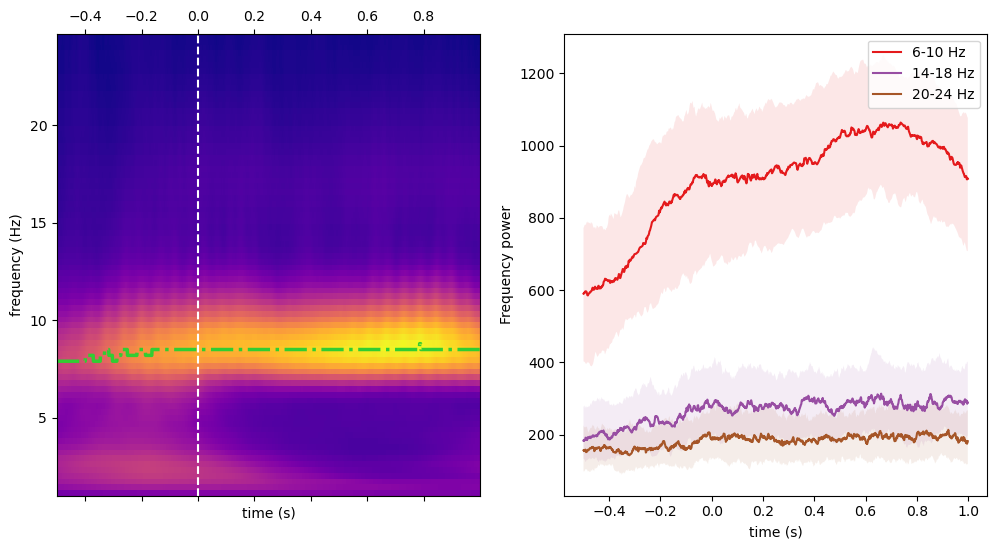

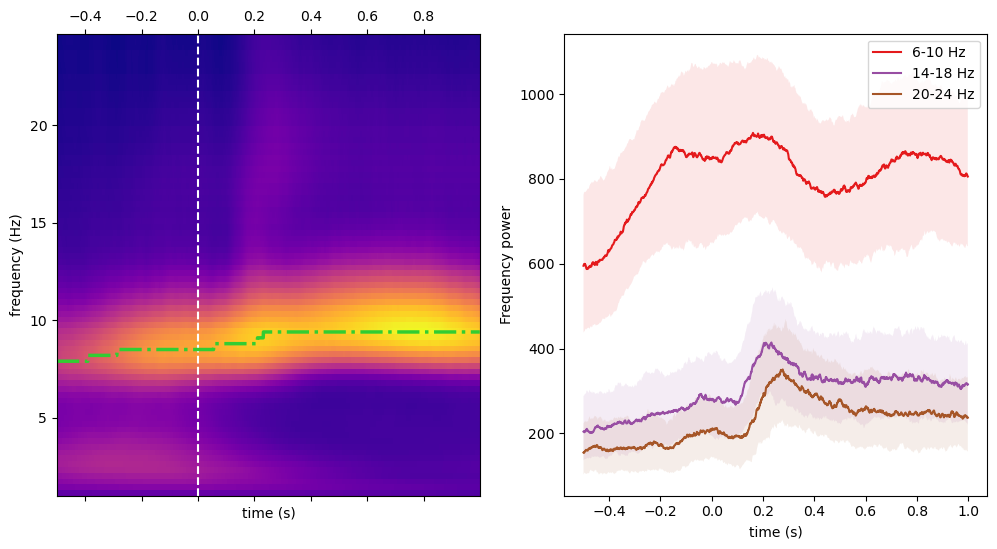

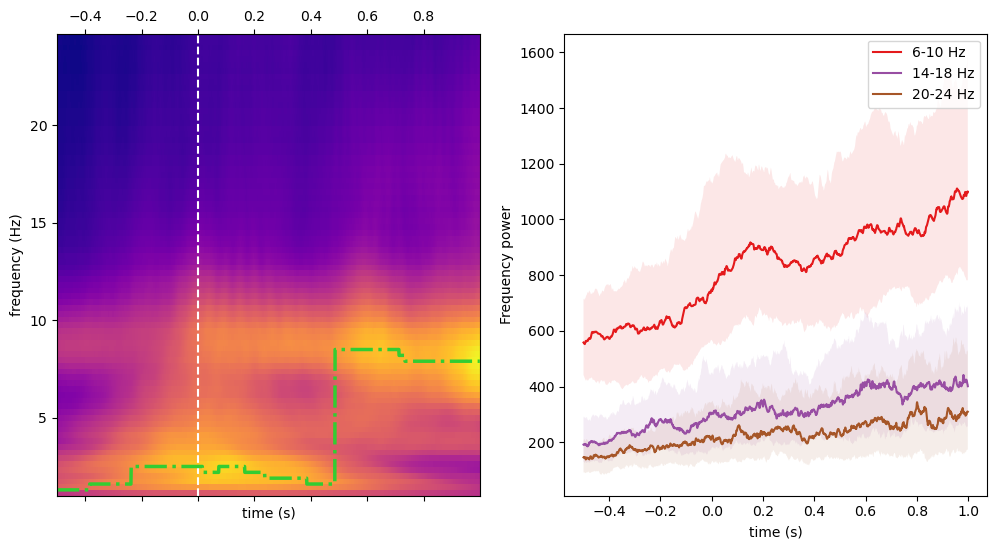

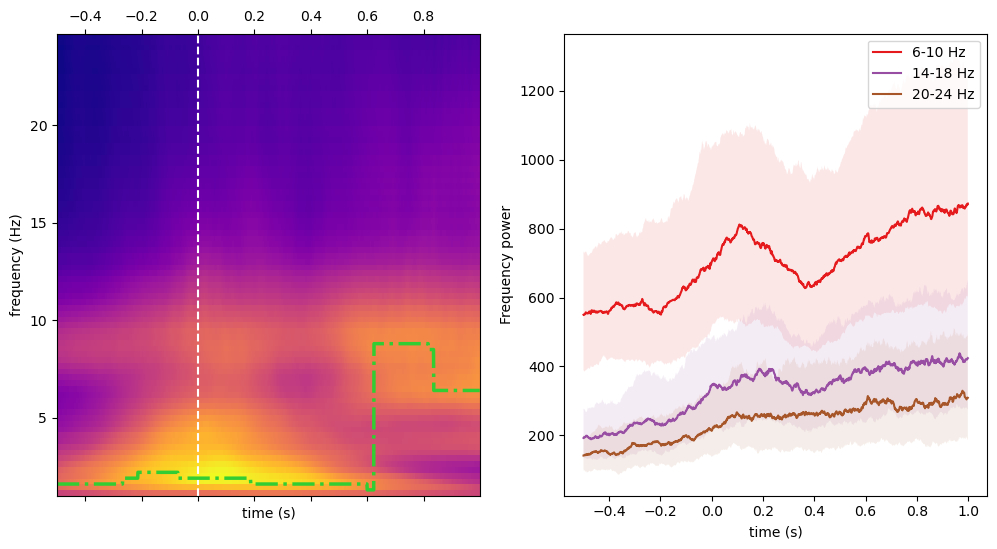

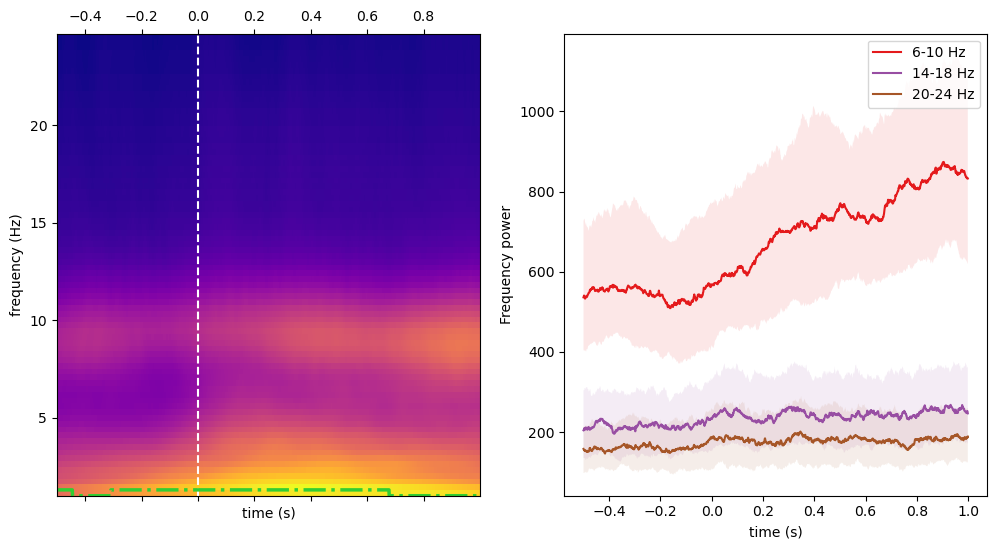

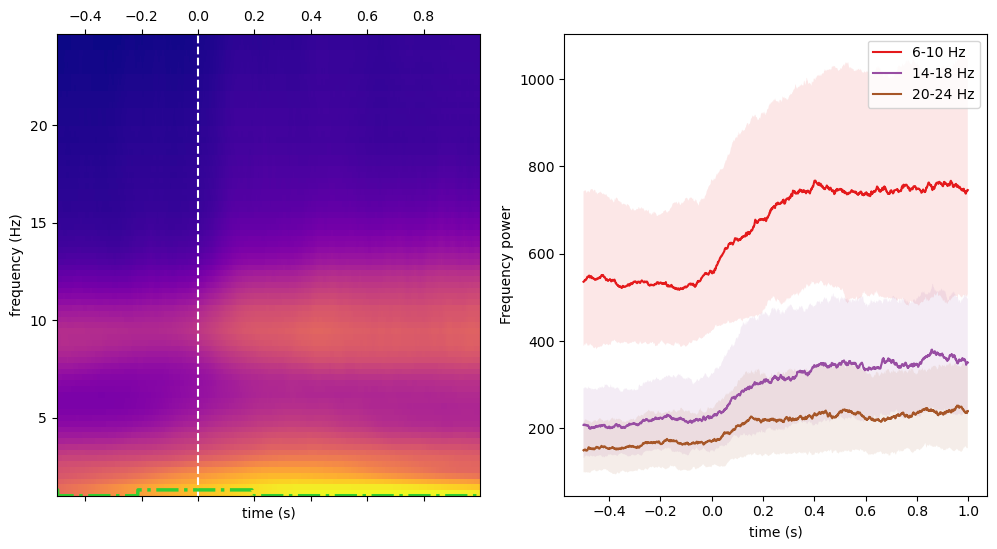

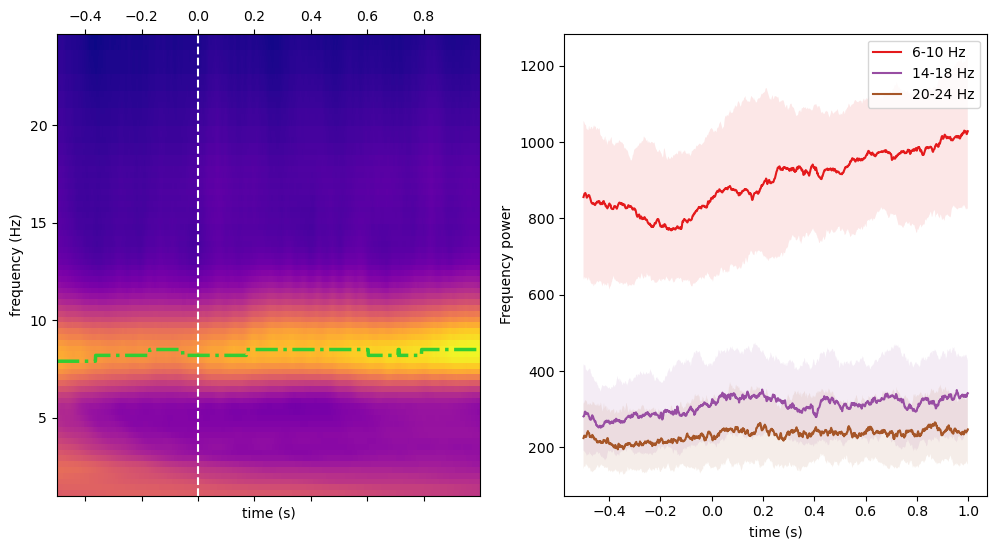

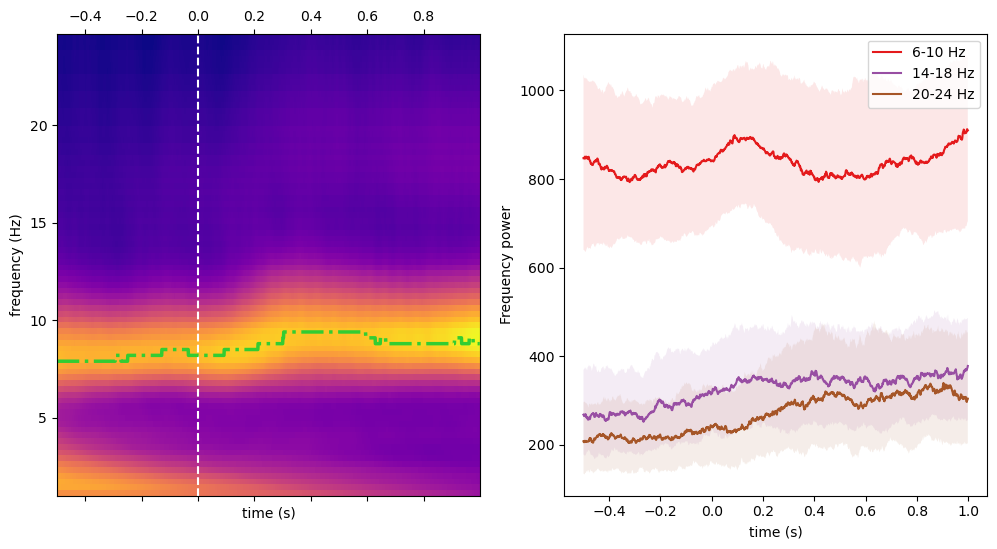

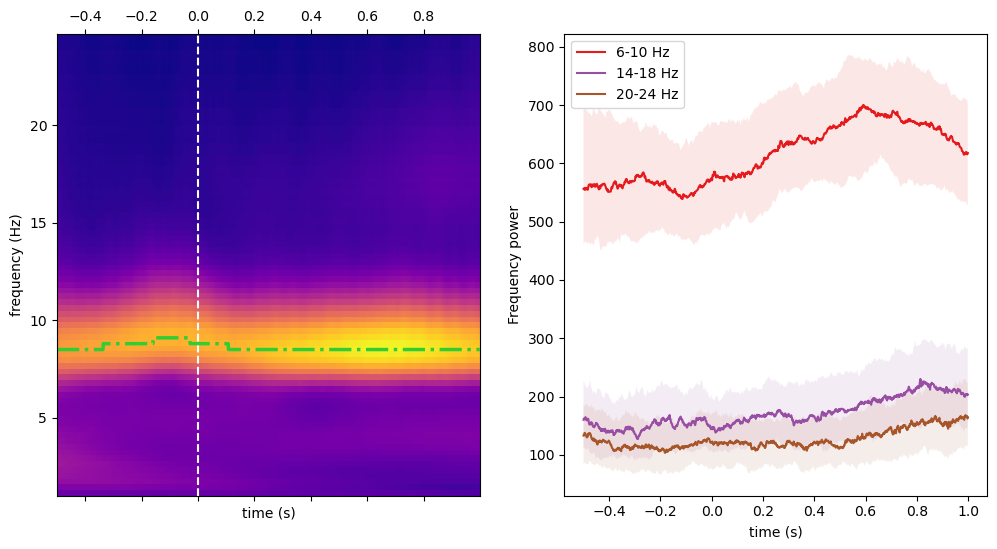

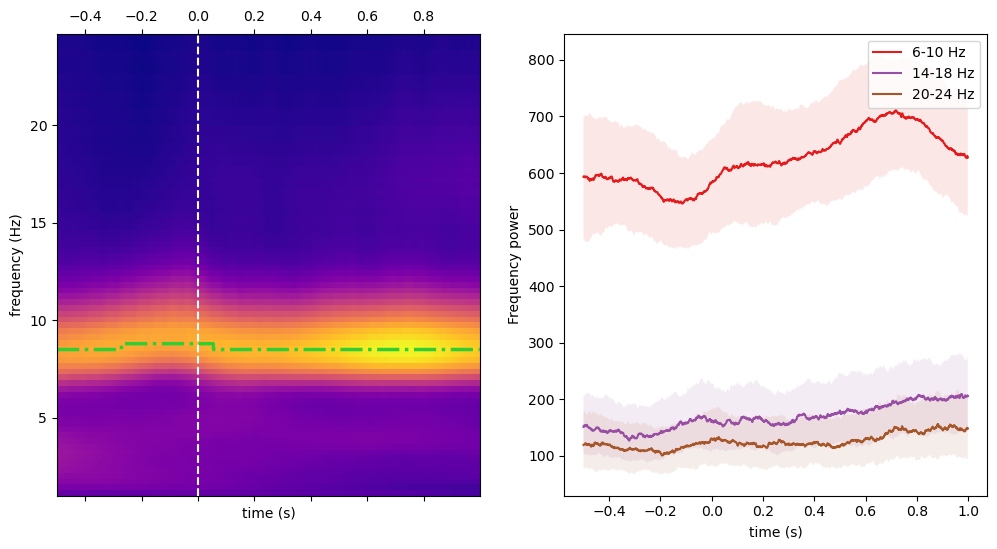

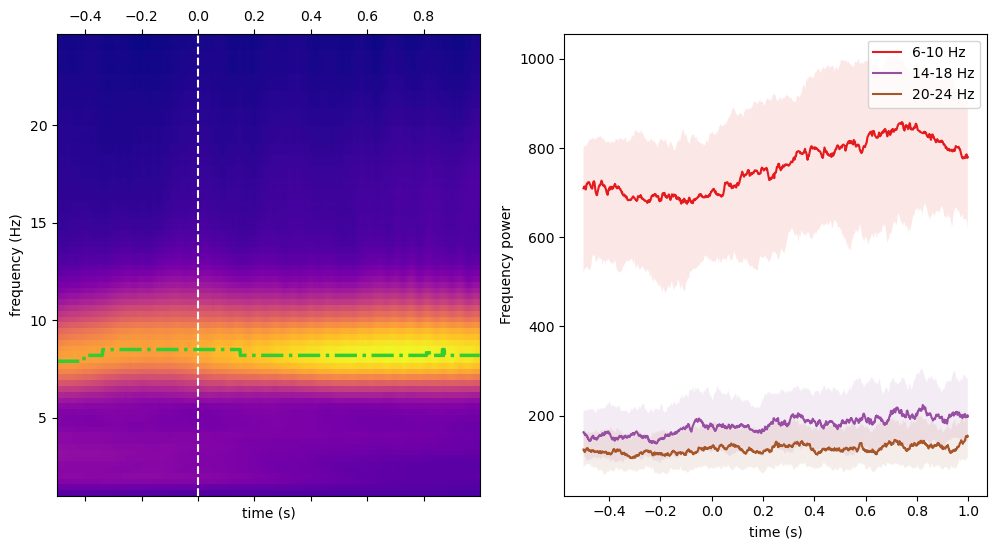

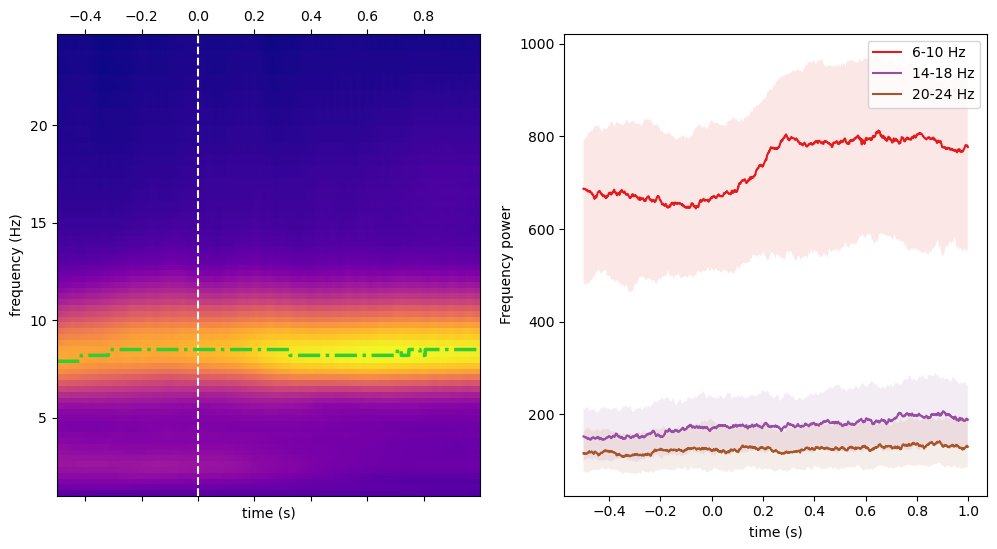

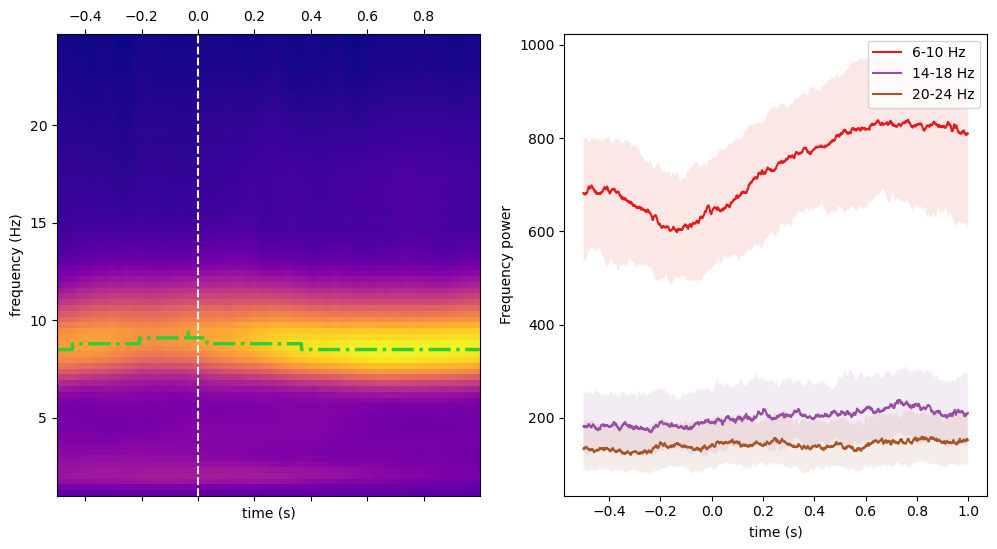

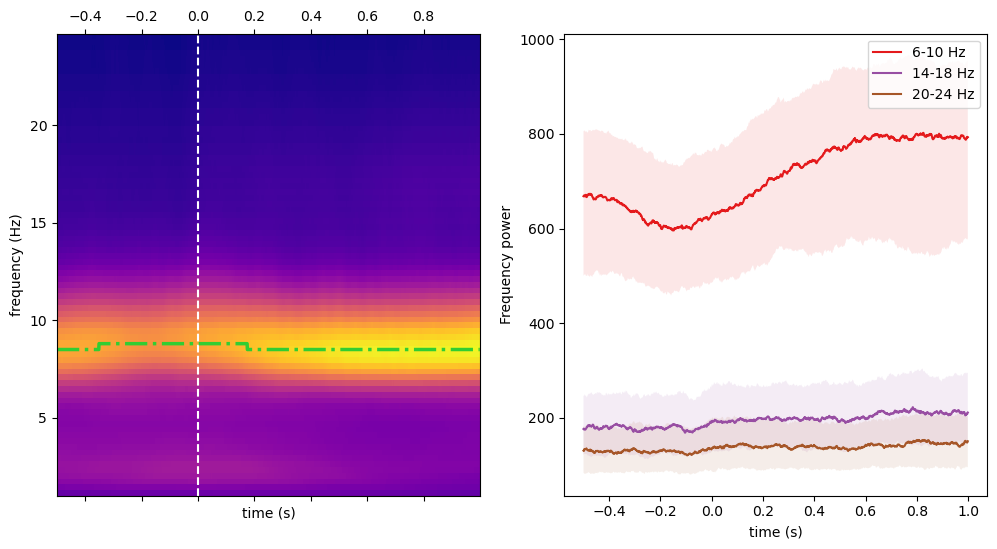

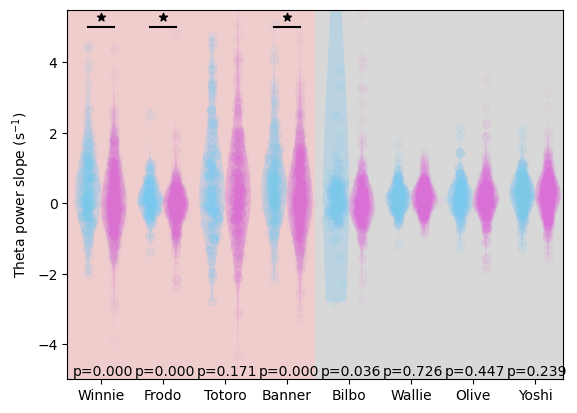

In [26]:
from Style.style_guide import animal_style, interval_style
from Style.style_guide import animal_style
from Analysis.utils import bootstrap, get_slope, violin_scatter
animals = ['Winnie', 'Frodo',"Totoro",'Banner','Bilbo',"Wallie",'Olive','Yoshi']
phase = 90
window=(-500,1000)
norm_window = (-300,0)
track_type = "wtrack"


fig_traces, ax_traces = plt.subplots(ncols=2,width_ratios=[3,1],figsize=(10,5))
n_bootstrap = 1000
frequencies =  np.arange(1,25,.3)
all_slopes = {}
all_power_traces = {}
for i_animal,animal in enumerate(animals):
    slopes = []
    power_traces = []
    for i_tag, tag in enumerate(["control","test",]):
        dataset_key = {"animal":animal,
                    "targeted_phase":phase,
                    "min_pulse_length":22,
                    "laser_power": 77,
                    'track_type':track_type}
        # dataset_key = {'nwb_file_name': 'Winnie20220717_.nwb', 
        #                'interval_list_name': 'pos 3 valid times'}#'interval_list_name': 'pos 11 valid times'}
        
        fig, spectrogram, traces = lfp_power_dynamics_pulse_cwt_spectrogram(dataset_key,
                            lfp_trace_window=window,
                            color='none',
                            fig = None,
                            frequencies=frequencies,
                            return_data = True,
                            marks = "position_"+tag
                            )
        del fig
        if not traces:
            continue
        power = traces[0]
        tp = np.linspace(*window,power.shape[1])
        # normalize by pre-pulse theta power
        ind_norm = np.logical_and(tp>norm_window[0],tp<norm_window[1])
        power_norm = np.nanmean(power[:,ind_norm],axis=1)
        power = power/power_norm[:,None]
        power_trials = power.copy()
        if track_type == "wtrack":
            ind_t = np.logical_and(tp>0,tp<1000)
        else:
            ind_t = np.logical_and(tp>0,tp<500)
        slopes.append(get_slope(power_trials[:,ind_t],tp[ind_t]/1000))
        power_traces.append(power_trials)
    all_slopes[animal] = slopes
    all_power_traces[animal] = power_traces
plt.rcParams['svg.fonttype'] = 'none'


from scipy.stats import ttest_ind
ylim=(-5,5.5)
p_lim = 0.01

fig = plt.figure()
for i,animal in enumerate(list(all_slopes.keys())):
    if not len(all_slopes[animal])==2:
        all_slopes.pop(animal)
for i,animal in enumerate(all_slopes):    
    slopes = all_slopes[animal]
    violin_scatter(slopes[0],1.2*i,bw_method=0.6,color=interval_style['control'])
    violin_scatter(slopes[1],1.2*i+.5,bw_method=0.6,color=interval_style['test'])
    # slopes_diff = np.subtract.outer(slopes[1],slopes[[0]]).ravel()
    # violin_scatter(slopes_diff, 1.2*i+.5,bw_method=0.6,color='grey')
    
    pval = ttest_ind(slopes[0],slopes[1]).pvalue
    print("p-value",pval)
    if pval<p_lim:
        plt.plot([1.2*i,1.2*i+.5],[ylim[1]-.5,ylim[1]-.5],color='k')
        plt.scatter(1.2*i+.25,ylim[1]-.2,marker='*',color='k')
    
    
    plt.text(1.2*i-.3,ylim[0]+.1,f"p={pval:.3f}")
    plt.fill_between([1.2*i-.4,1.2*i+.8],ylim[0],ylim[1],facecolor=animal_style.loc[animal,"background"],alpha=0.3,zorder=-1)
plt.ylim(*ylim)
plt.xlim(-.4,1.2*len(all_slopes)-.4)
plt.xticks(np.arange(len(all_slopes))*1.2+.25,all_slopes.keys())
plt.ylabel('Theta power slope (s$^{-1}$)')
plt.rcParams['svg.fonttype'] = 'none'
# fig.savefig(f'/home/sambray/Pictures/Fig_1/theta_power_control_test_compiled_slopes.svg')
plt.rcParams["svg.fonttype"] = "none"
# fig.savefig("./Plots/Fig1I.svg")
# fig.savefig(f"./Plots/theta_ablation_slopes_{track_type}.svg")
    

p-value 3.6345958007953478e-06
p-value 0.00011419395948452132
p-value 0.17127626051734593
p-value 1.6146601378175767e-05
p-value 0.0362132071179652
p-value 0.7264679557314018
p-value 0.44721652959584857
p-value 0.23876294974511747


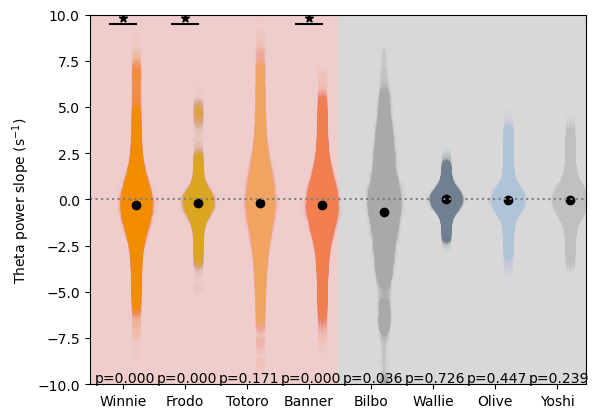

In [28]:
from Style.style_guide import animal_style
ylim = (-10,10)
for i,animal in enumerate(all_slopes):    
    slopes = all_slopes[animal]
    # violin_scatter(slopes[0],1.2*i,bw_method=0.6,color=interval_style['control'])
    # violin_scatter(slopes[1],1.2*i+.5,bw_method=0.6,color=interval_style['test'])
    slopes_diff = np.subtract.outer(np.array(slopes[1]),np.array(slopes[0])).ravel()
    x_pos = 1.2*i+.5
    violin_scatter(slopes_diff, x_pos,bw_method=0.6,color=animal_style.loc[animal,"color"])
    plt.scatter(x_pos,np.mean(slopes_diff),color='k',)
    
    pval = ttest_ind(slopes[0],slopes[1]).pvalue
    print("p-value",pval)
    if pval<p_lim:
        plt.plot([1.2*i,1.2*i+.5],[ylim[1]-.5,ylim[1]-.5],color='k')
        plt.scatter(1.2*i+.25,ylim[1]-.2,marker='*',color='k')
    
    
    plt.text(1.2*i-.3,ylim[0]+.1,f"p={pval:.3f}")
    plt.fill_between([1.2*i-.4,1.2*i+.8],ylim[0],ylim[1],facecolor=animal_style.loc[animal,"background"],alpha=0.3,zorder=-1)

plt.plot([-.4,x_pos+.4],[0,0],ls=':',c='grey')
# plt.ylim(-5,5)
# plt.ylim(-10,10)
plt.ylim(*ylim)
plt.xlim(-.4,1.2*len(all_slopes)-.4)
plt.xticks(np.arange(len(all_slopes))*1.2+.25,all_slopes.keys())
plt.ylabel('Theta power slope (s$^{-1}$)')
plt.rcParams['svg.fonttype'] = 'none'
# fig.savefig(f'/home/sambray/Pictures/Fig_1/theta_power_control_test_compiled_slopes_{track_type}.svg')

In [1]:
fig.savefig(f'/home/sambray/Pictures/Fig_1/theta_power_control_test_compiled_slopes.svg')


NameError: name 'fig' is not defined

100%|██████████| 1000/1000 [00:00<00:00, 1998.87it/s]


p-value True


100%|██████████| 1000/1000 [00:00<00:00, 2308.10it/s]


p-value True


100%|██████████| 1000/1000 [00:00<00:00, 3132.18it/s]


p-value False


100%|██████████| 1000/1000 [00:00<00:00, 1967.62it/s]


p-value True


100%|██████████| 1000/1000 [00:00<00:00, 2972.30it/s]


p-value False


100%|██████████| 1000/1000 [00:00<00:00, 2285.56it/s]


p-value False


100%|██████████| 1000/1000 [00:00<00:00, 2327.28it/s]


p-value False


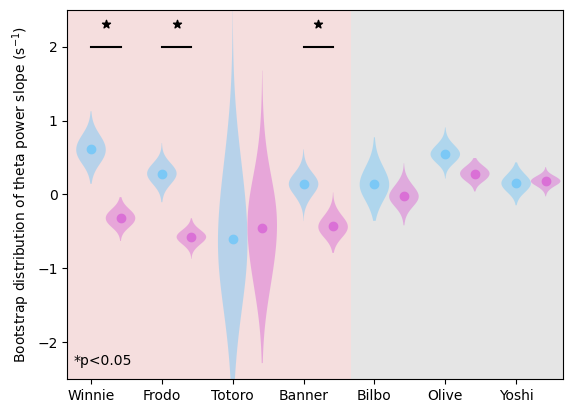

In [41]:
from tqdm import tqdm
from Analysis.utils import bootstrap_general, bootstrap_diff
def get_slope(power_trials, axis=0):
    ind_t = np.logical_and(tp > 0, tp < 500)
    slope = np.polyfit(tp[ind_t] / 1000.0, power_trials[:, ind_t].mean(axis=0), 1)[0]
    return slope

fig = plt.figure()
ylim = (-2.5, 2.5)
conf_interval = 95
for i, animal in enumerate(list(all_power_traces.keys())):
    if not len(all_power_traces[animal]) == 2:
        all_power_traces.pop(animal)
for i, animal in enumerate(all_power_traces):
    power_traces = all_power_traces[animal]

    dist_control = bootstrap_general(
        power_traces[0], statistic=get_slope, return_samples=True, n_boot=1e3
    )[-1]
    dist_test = bootstrap_general(
        power_traces[1], statistic=get_slope, return_samples=True, n_boot=1e3
    )[-1]
    v_control = plt.violinplot(
        dist_control, positions=[1.2 * i], showextrema=False, bw_method=0.6
    )
    v_test = plt.violinplot(
        dist_test, positions=[1.2 * i + 0.5], showextrema=False, bw_method=0.6
    )
    v_control["bodies"][0].set_facecolor(interval_style["control"])
    v_control["bodies"][0].set_alpha(0.5)
    v_test["bodies"][0].set_facecolor(interval_style["test"])
    v_test["bodies"][0].set_alpha(0.5)

    plt.scatter([1.2 * i], [np.median(dist_control)], color=interval_style["control"])
    plt.scatter([1.2 * i + 0.5], [np.median(dist_test)], color=interval_style["test"])

    pval = bootstrap_diff(
        power_traces[0],
        power_traces[1],
        measurement=get_slope,
        n_boot=1e3,
        return_samples=False,
        conf_interval=conf_interval,
    )[-1]
    print("p-value", pval)
    if pval:
        plt.plot([1.2 * i, 1.2 * i + 0.5], [ylim[1] - 0.5, ylim[1] - 0.5], color="k")
        plt.scatter(1.2 * i + 0.25, ylim[1] - 0.2, marker="*", color="k")

    plt.fill_between(
        [1.2 * i - 0.4, 1.2 * i + 0.8],
        ylim[0],
        ylim[1],
        facecolor=animal_style.loc[animal, "background"],
        alpha=0.2,
        zorder=-1,
    )


plt.xticks(np.arange(len(all_power_traces)) * 1.2, all_power_traces.keys())
plt.xlim(-0.4, 1.2 * len(all_power_traces) - 0.4)
plt.ylim(*ylim)
plt.ylabel("Bootstrap distribution of theta power slope (s$^{-1}$)")
plt.text(-.3,-2.3,f"*p<{(100-conf_interval)/100.0}")
fig.savefig(
    f"/home/sambray/Pictures/Fig_1/theta_power_control_test_compiled_slopes_bootstrap.svg"
)

(55, 1500)

In [56]:
tp[ind_t]

array([200.46697799, 201.4676451 , 202.46831221, 203.46897932,
       204.46964643, 205.47031354, 206.47098065, 207.47164777,
       208.47231488, 209.47298199, 210.4736491 , 211.47431621,
       212.47498332, 213.47565043, 214.47631755, 215.47698466,
       216.47765177, 217.47831888, 218.47898599, 219.4796531 ,
       220.48032021, 221.48098732, 222.48165444, 223.48232155,
       224.48298866, 225.48365577, 226.48432288, 227.48498999,
       228.4856571 , 229.48632422, 230.48699133, 231.48765844,
       232.48832555, 233.48899266, 234.48965977, 235.49032688,
       236.490994  , 237.49166111, 238.49232822, 239.49299533,
       240.49366244, 241.49432955, 242.49499666, 243.49566378,
       244.49633089, 245.496998  , 246.49766511, 247.49833222,
       248.49899933, 249.49966644, 250.50033356, 251.50100067,
       252.50166778, 253.50233489, 254.503002  , 255.50366911,
       256.50433622, 257.50500334, 258.50567045, 259.50633756,
       260.50700467, 261.50767178, 262.50833889, 263.50

In [2]:
import datajoint as dj
from spyglass.lfp.lfp_merge import LFPOutput
dj.FreeTable(LFPOutput.connection,'`lfp_merge`.`l_f_p_output__imported_l_f_p_v1`').drop_quick()

[2024-04-17 10:21:41,435][INFO]: Nothing to drop: table `lfp_merge`.`l_f_p_output__imported_l_f_p_v1` is not declared
